Họ và tên: Phạm Đức Thể

MSSV: 19522253

Lớp: DS304.M21

Predict Air Quality - 29/06/2022

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1apNWUapsU4oEInNOGAiZXM22bZkyipYy?usp=sharing)

# **Predict Air Quality**

## Python - Processing & EDA

### Import Libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import clear_output

import tensorflow as tf
import requests
import numpy as np
import pandas as pd
import re
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows

sns.set()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### Read Dataset

In [2]:
PATH = '/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/NĂM 3 2021-2022/HỌC KỲ 2 2021 - 2022/DS304.M21 - THIẾT KẾ VÀ PHÂN TÍCH THỰC NGHIỆM/FINAL PROJECT/'

In [3]:
data = pd.read_csv(PATH+'Dataset/AirQualityUCI.csv', sep=';', nrows=9357, usecols=range(15), na_values=[-200, '-200,0'])
data.tail(10)
data.shape

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9347,04/04/2005,05.00.00,"0,5",888.0,NaN,"1,3",528.0,77.0,1077.0,53.0,987.0,578.0,"10,4","59,9","0,7550"
9348,04/04/2005,06.00.00,"1,1",1031.0,NaN,"4,4",730.0,182.0,760.0,93.0,1129.0,905.0,"9,5","63,1","0,7531"
9349,04/04/2005,07.00.00,"4,0",1384.0,NaN,"17,4",1221.0,594.0,470.0,155.0,1600.0,1457.0,"9,7","61,9","0,7446"
9350,04/04/2005,08.00.00,"5,0",1446.0,NaN,"22,4",1362.0,586.0,415.0,174.0,1777.0,1705.0,"13,5","48,9","0,7553"
9351,04/04/2005,09.00.00,"3,9",1297.0,NaN,"13,6",1102.0,523.0,507.0,187.0,1375.0,1583.0,"18,2","36,3","0,7487"
9352,04/04/2005,10.00.00,"3,1",1314.0,NaN,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,NaN,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,NaN,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,NaN,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"
9356,04/04/2005,14.00.00,"2,2",1071.0,NaN,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028"


(9357, 15)

In [4]:
# Rename columns
columns=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
         'NOx_GT','PT08_S3_NOx','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']
data.columns=columns
data.head(10)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848"
6,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603"
7,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702"
8,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648"
9,11/03/2004,03.00.00,"0,6",1010.0,19.0,"1,7",561.0,NaN,1705.0,NaN,1235.0,501.0,"10,3","60,2","0,7517"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          9357 non-null   object 
 1   TIME          9357 non-null   object 
 2   CO_GT         7674 non-null   object 
 3   PT08_S1_CO    8991 non-null   float64
 4   NMHC_GT       914 non-null    float64
 5   C6H6_GT       8991 non-null   object 
 6   PT08_S2_NMHC  8991 non-null   float64
 7   NOx_GT        7718 non-null   float64
 8   PT08_S3_NOx   8991 non-null   float64
 9   NO2_GT        7715 non-null   float64
 10  PT08_S4_NO2   8991 non-null   float64
 11  PT08_S5_O3    8991 non-null   float64
 12  T             8991 non-null   object 
 13  RH            8991 non-null   object 
 14  AH            8991 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


**Nhận xét:** 
- Có 5 thuộc tính bị sai kiểu dữ liệu gồm:

| Feature | Datatype | True Datatype |
| ----- | ----- | ----- |
| CO_GT | object | float64 |
| C6H6_GT | object | float64 |
| T | object | float64 |
| RH | object | float64 |
| AH | object | float64 |

### Pre-processing

#### Convert datatype

In [6]:
cols = ['CO_GT', 'C6H6_GT', 'T', 'RH', 'AH']
data[cols] = data[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',','.'), errors='coerce'))
# Combine date and time columns
data['TIME'] = data['TIME'].str.replace('.',':')
DATE_TIME = pd.to_datetime(data.DATE + ' ' + data.TIME)
data.insert(2, 'DATE_TIME', DATE_TIME)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [7]:
data.head(10)
data.info()

,DATE,TIME,DATE_TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,10/03/2004,18:00:00,2004-10-03 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19:00:00,2004-10-03 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20:00:00,2004-10-03 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21:00:00,2004-10-03 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22:00:00,2004-10-03 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,10/03/2004,23:00:00,2004-10-03 23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,11/03/2004,00:00:00,2004-11-03 00:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,11/03/2004,01:00:00,2004-11-03 01:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,11/03/2004,02:00:00,2004-11-03 02:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,11/03/2004,03:00:00,2004-11-03 03:00:00,0.6,1010.0,19.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          9357 non-null   object        
 1   TIME          9357 non-null   object        
 2   DATE_TIME     9357 non-null   datetime64[ns]
 3   CO_GT         7674 non-null   float64       
 4   PT08_S1_CO    8991 non-null   float64       
 5   NMHC_GT       914 non-null    float64       
 6   C6H6_GT       8991 non-null   float64       
 7   PT08_S2_NMHC  8991 non-null   float64       
 8   NOx_GT        7718 non-null   float64       
 9   PT08_S3_NOx   8991 non-null   float64       
 10  NO2_GT        7715 non-null   float64       
 11  PT08_S4_NO2   8991 non-null   float64       
 12  PT08_S5_O3    8991 non-null   float64       
 13  T             8991 non-null   float64       
 14  RH            8991 non-null   float64       
 15  AH            8991 non-null   float64 

In [8]:
data = data.iloc[:,2:]
data.head(10)
data.info()

,DATE_TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,2004-10-03 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,2004-10-03 23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,2004-11-03 00:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,2004-11-03 01:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,2004-11-03 02:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,2004-11-03 03:00:00,0.6,1010.0,19.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE_TIME     9357 non-null   datetime64[ns]
 1   CO_GT         7674 non-null   float64       
 2   PT08_S1_CO    8991 non-null   float64       
 3   NMHC_GT       914 non-null    float64       
 4   C6H6_GT       8991 non-null   float64       
 5   PT08_S2_NMHC  8991 non-null   float64       
 6   NOx_GT        7718 non-null   float64       
 7   PT08_S3_NOx   8991 non-null   float64       
 8   NO2_GT        7715 non-null   float64       
 9   PT08_S4_NO2   8991 non-null   float64       
 10  PT08_S5_O3    8991 non-null   float64       
 11  T             8991 non-null   float64       
 12  RH            8991 non-null   float64       
 13  AH            8991 non-null   float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 1023.5 KB


In [9]:
data.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,DATE_TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,9357,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
unique,9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2004-10-03 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2004-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2005-12-03 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,NaN,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,NaN,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,NaN,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800


#### Missing values

In [10]:
# Kiểm tra xem có dữ liệu nào bị thiếu không
def check_missing(data):
  total = data.isnull().sum().sort_values(ascending = False)
  percent = round((data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False),3)
  df_missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  # print(df_missing_data)
  print('Số lượng feature bị khuyết giá trị là: {} feature'.format(len(df_missing_data[df_missing_data['Total']>0])))
  print(f'Shape = {data.shape}')
  return df_missing_data.T

In [11]:
check_missing(data)

Số lượng feature bị khuyết giá trị là: 13 feature
Shape = (9357, 14)


,NMHC_GT,CO_GT,NO2_GT,NOx_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,PT08_S3_NOx,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,DATE_TIME
Total,8443.000,1683.000,1642.000,1639.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000,0.0
Percent,90.232,17.987,17.548,17.516,3.912,3.912,3.912,3.912,3.912,3.912,3.912,3.912,3.912,0.0


In [12]:
# Xóa các thuộc tính có tỉ lệ missing values > 50%.
perc = 50.0
min_count =  int(((100-perc)/100)*data.shape[0] + 1)
data_new = data.dropna(axis=1, thresh=min_count)
check_missing(data_new)

Số lượng feature bị khuyết giá trị là: 12 feature
Shape = (9357, 13)


,CO_GT,NO2_GT,NOx_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,PT08_S3_NOx,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,DATE_TIME
Total,1683.000,1642.000,1639.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000,0.0
Percent,17.987,17.548,17.516,3.912,3.912,3.912,3.912,3.912,3.912,3.912,3.912,3.912,0.0


**Nhận xét:**
- Vì thuộc tính cần dự đoán là `CO_GT` mà thuộc tính này có tỉ lệ missing values khá cao, nên ta sẽ đề xuất các bộ dữ liệu sau:
  + **Strategies 1 - REMOVE:** Xóa tất cả các missing values ở thuộc tính  `CO_GT` để tạo ra bộ dữ liệu ko có missing values ở thuộc tính  `CO_GT`.
  + **Strategies 2 - MEAN:** Áp dụng phương pháp xử lý missing điền mean trên thuộc tính  `CO_GT` và chia train/test để training model và đánh giá.

In [13]:
data_new.head(10)
data_new.shape
data_new.info()

,DATE_TIME,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,2004-10-03 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03 19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,2004-10-03 23:00:00,1.2,1197.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,2004-11-03 00:00:00,1.2,1185.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,2004-11-03 01:00:00,1.0,1136.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,2004-11-03 02:00:00,0.9,1094.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,2004-11-03 03:00:00,0.6,1010.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517


(9357, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE_TIME     9357 non-null   datetime64[ns]
 1   CO_GT         7674 non-null   float64       
 2   PT08_S1_CO    8991 non-null   float64       
 3   C6H6_GT       8991 non-null   float64       
 4   PT08_S2_NMHC  8991 non-null   float64       
 5   NOx_GT        7718 non-null   float64       
 6   PT08_S3_NOx   8991 non-null   float64       
 7   NO2_GT        7715 non-null   float64       
 8   PT08_S4_NO2   8991 non-null   float64       
 9   PT08_S5_O3    8991 non-null   float64       
 10  T             8991 non-null   float64       
 11  RH            8991 non-null   float64       
 12  AH            8991 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 950.4 KB


##### Filling = Mean & Strategies dataset

In [14]:
data_mean = data_new.copy()
data_mean['PT08_S1_CO'] = data_mean['PT08_S1_CO'].replace(np.NaN, round(data_mean['PT08_S1_CO'].mean(),2))
data_mean['C6H6_GT'] = data_mean['C6H6_GT'].replace(np.NaN, round(data_mean['C6H6_GT'].mean(),2))
data_mean['PT08_S2_NMHC'] = data_mean['PT08_S2_NMHC'].replace(np.NaN, round(data_mean['PT08_S2_NMHC'].mean(),2))
data_mean['NOx_GT'] = data_mean['NOx_GT'].replace(np.NaN, round(data_mean['NOx_GT'].mean(),2))
data_mean['PT08_S3_NOx'] = data_mean['PT08_S3_NOx'].replace(np.NaN, round(data_mean['PT08_S3_NOx'].mean(),2))
data_mean['NO2_GT'] = data_mean['NO2_GT'].replace(np.NaN, round(data_mean['NO2_GT'].mean(),2))
data_mean['PT08_S4_NO2'] = data_mean['PT08_S4_NO2'].replace(np.NaN, round(data_mean['PT08_S4_NO2'].mean(),2))
data_mean['PT08_S5_O3'] = data_mean['PT08_S5_O3'].replace(np.NaN, round(data_mean['PT08_S5_O3'].mean(),2))
data_mean['T'] = data_mean['T'].replace(np.NaN, round(data_mean['T'].mean(),2))
data_mean['RH'] = data_mean['RH'].replace(np.NaN, round(data_mean['RH'].mean(),2))
data_mean['AH'] = data_mean['AH'].replace(np.NaN, round(data_mean['AH'].mean(),2))

In [15]:
check_missing(data_mean)

Số lượng feature bị khuyết giá trị là: 1 feature
Shape = (9357, 13)


,CO_GT,DATE_TIME,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
Total,1683.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,17.987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### Strategies 1 - REMOVE

In [16]:
data_REMOVE = data_mean.copy()
data_REMOVE.head(10)
check_missing(data_REMOVE)

,DATE_TIME,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,2004-10-03 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.00,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03 19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.00,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.00,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.00,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.00,1490.0,1110.0,11.2,59.6,0.7888
5,2004-10-03 23:00:00,1.2,1197.0,4.7,750.0,89.0,1337.0,96.00,1393.0,949.0,11.2,59.2,0.7848
6,2004-11-03 00:00:00,1.2,1185.0,3.6,690.0,62.0,1462.0,77.00,1333.0,733.0,11.3,56.8,0.7603
7,2004-11-03 01:00:00,1.0,1136.0,3.3,672.0,62.0,1453.0,76.00,1333.0,730.0,10.7,60.0,0.7702
8,2004-11-03 02:00:00,0.9,1094.0,2.3,609.0,45.0,1579.0,60.00,1276.0,620.0,10.7,59.7,0.7648
9,2004-11-03 03:00:00,0.6,1010.0,1.7,561.0,246.9,1705.0,113.09,1235.0,501.0,10.3,60.2,0.7517


Số lượng feature bị khuyết giá trị là: 1 feature
Shape = (9357, 13)


,CO_GT,DATE_TIME,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
Total,1683.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,17.987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
data_REMOVE.dropna(subset=['CO_GT'], inplace=True)
check_missing(data_REMOVE)

Số lượng feature bị khuyết giá trị là: 0 feature
Shape = (7674, 13)


,DATE_TIME,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
data_REMOVE.to_csv('data_REMOVE.csv', index=False)

###### Strategies 2 - MEAN

In [19]:
mean_CO_GT = round(data_mean['CO_GT'].mean(),2)
mean_CO_GT

2.15

In [20]:
data_MEAN = data_mean.copy()
data_MEAN.head(10)
check_missing(data_MEAN)
data_MEAN['CO_GT'] = data_MEAN['CO_GT'].replace(np.NaN, mean_CO_GT)
data_MEAN.head(10)
check_missing(data_MEAN)

,DATE_TIME,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,2004-10-03 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.00,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03 19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.00,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.00,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.00,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.00,1490.0,1110.0,11.2,59.6,0.7888
5,2004-10-03 23:00:00,1.2,1197.0,4.7,750.0,89.0,1337.0,96.00,1393.0,949.0,11.2,59.2,0.7848
6,2004-11-03 00:00:00,1.2,1185.0,3.6,690.0,62.0,1462.0,77.00,1333.0,733.0,11.3,56.8,0.7603
7,2004-11-03 01:00:00,1.0,1136.0,3.3,672.0,62.0,1453.0,76.00,1333.0,730.0,10.7,60.0,0.7702
8,2004-11-03 02:00:00,0.9,1094.0,2.3,609.0,45.0,1579.0,60.00,1276.0,620.0,10.7,59.7,0.7648
9,2004-11-03 03:00:00,0.6,1010.0,1.7,561.0,246.9,1705.0,113.09,1235.0,501.0,10.3,60.2,0.7517


Số lượng feature bị khuyết giá trị là: 1 feature
Shape = (9357, 13)


,CO_GT,DATE_TIME,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
Total,1683.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,17.987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,DATE_TIME,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,2004-10-03 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.00,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03 19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.00,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.00,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.00,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.00,1490.0,1110.0,11.2,59.6,0.7888
5,2004-10-03 23:00:00,1.2,1197.0,4.7,750.0,89.0,1337.0,96.00,1393.0,949.0,11.2,59.2,0.7848
6,2004-11-03 00:00:00,1.2,1185.0,3.6,690.0,62.0,1462.0,77.00,1333.0,733.0,11.3,56.8,0.7603
7,2004-11-03 01:00:00,1.0,1136.0,3.3,672.0,62.0,1453.0,76.00,1333.0,730.0,10.7,60.0,0.7702
8,2004-11-03 02:00:00,0.9,1094.0,2.3,609.0,45.0,1579.0,60.00,1276.0,620.0,10.7,59.7,0.7648
9,2004-11-03 03:00:00,0.6,1010.0,1.7,561.0,246.9,1705.0,113.09,1235.0,501.0,10.3,60.2,0.7517


Số lượng feature bị khuyết giá trị là: 0 feature
Shape = (9357, 13)


,DATE_TIME,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
data_MEAN.to_csv('data_MEAN.csv', index=False)

### Exploratory Data Analysis - EDA

#### Strategies 1

In [22]:
list_columns = data_REMOVE.columns
list_columns

Index(['DATE_TIME', 'CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOx_GT',
       'PT08_S3_NOx', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH'],
      dtype='object')

In [23]:
data_REMOVE.describe()

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000
mean,2.152750,1110.118439,10.267318,946.852033,254.861050,827.288598,114.718587,1445.247563,1042.626961,17.794058,49.067383,0.991197
std,1.453252,213.938253,7.279405,259.705310,209.480706,251.074837,46.919686,342.735535,396.774427,8.670728,17.072196,0.391282
min,0.100000,647.000000,0.200000,387.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,953.000000,4.800000,752.000000,107.000000,657.000000,82.000000,1215.250000,759.000000,11.500000,36.200000,0.714375
50%,1.800000,1087.000000,8.900000,934.000000,201.000000,807.000000,113.090000,1456.260000,1013.000000,17.550000,49.230000,0.983950
75%,2.900000,1235.000000,14.000000,1116.750000,326.000000,949.000000,141.000000,1659.000000,1287.000000,23.500000,61.800000,1.235200
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600


##### Correlation Matrix

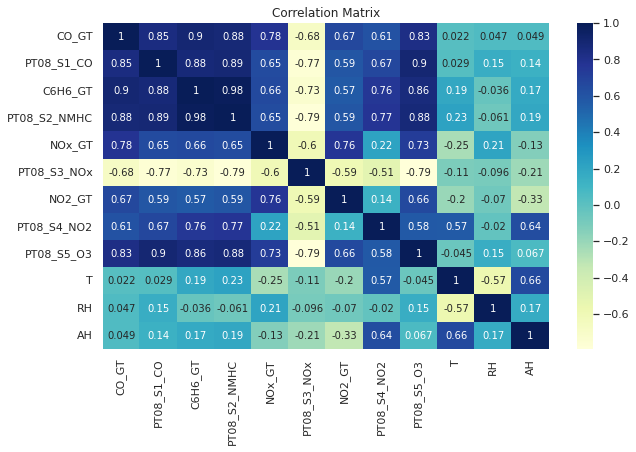

In [24]:
# sns.pairplot(data_REMOVE.iloc[:,2:])
plt.figure(figsize=(10,6))
corrMatrix = data_REMOVE.iloc[:,1:].corr()
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu", cbar=True)
plt.title('Correlation Matrix')
plt.show();

**Nhận xét**: Xét hệ số tương quan gữa các thuộc tính khác và thuộc tính `CO_GT`.

| $r$ | Ý nghĩa | Thuộc tính |
| ----- | ----- | ----- |
| $|r|$ $<$ 0.3 | Tương quan yếu | `AH, RH, T` |
| 0.3 $\leq$ $|r|$ $<$ 0.5 | Tương quan trung bình | `None` |
| 0.5 $\leq$ $|r|$ $\leq$ 1 | Tương quan mạnh | `PT08_S1_CO, C6H6_GT, PT08_S2_NMHC, NOx_GT,` <br /> `PT08_S3_NOx, NO2_GT, PT08_S4_NO2, PT08_S5_O3`  |

**Note:**
Hệ số tương quan Pearson ($r$) có giá trị giao động trong khoảng liên tục từ -1 đến +1:

    r = 0: Hai biến không có tương quan tuyến tính
    r = 1; r = -1: Hai biến có mối tương quan tuyến tính tuyệt đối.
    r < 0: Hệ số tương quan âm. Nghĩa là giá trị biến x tăng thì giá trị biến y giảm và ngược lại, giá trị biến y tăng thì giá trị biến x giảm.
    r > 0: Hệ số tương quan dương. Nghĩa là giá trị biến x tăng thì giá trị biến y tăng và ngược lại, giá trị biến y tăng thì giá trị biến x cũng tăng.

Tham khảo: [Correlation Coefficient](https://rpubs.com/tranquangquy_ictu/769561)

##### Regplot & Residplot

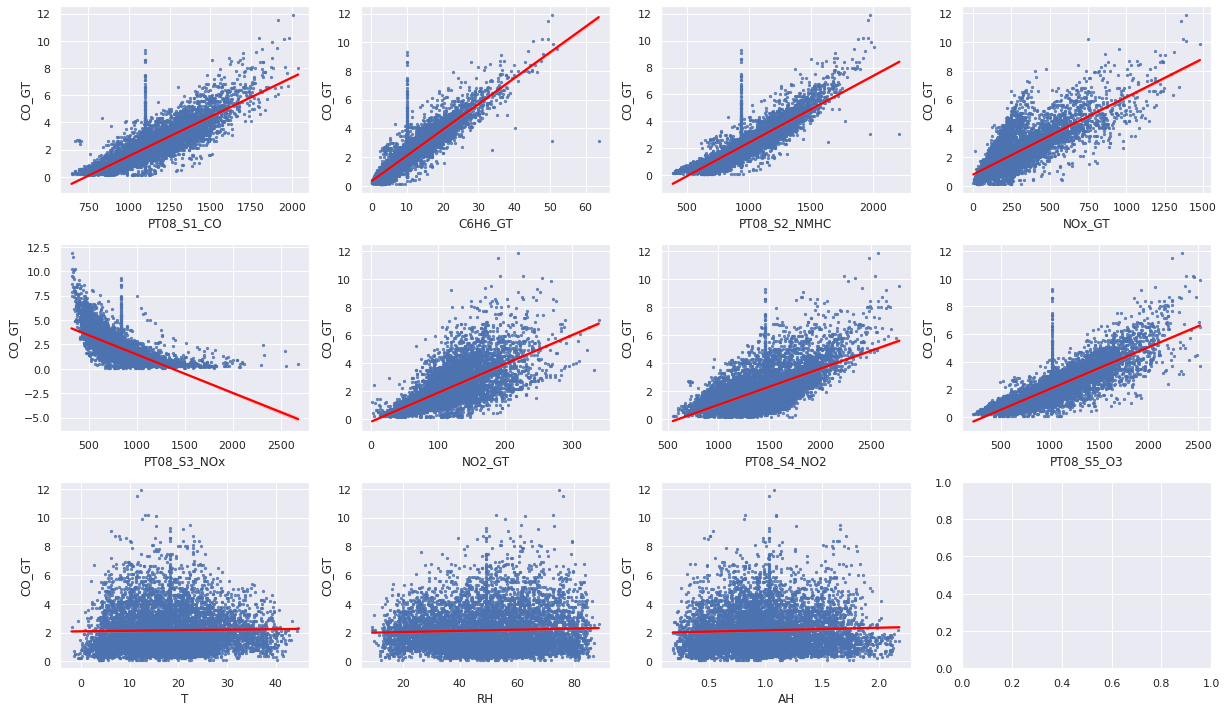

In [25]:
fig, axes = plt.subplots(3, 4, figsize=(17, 10))

sns.regplot(x=data_REMOVE['PT08_S1_CO'], y=data_REMOVE['CO_GT'], ax=axes[0,0], scatter_kws={'s':5}, line_kws={"color": "red"})
sns.regplot(x=data_REMOVE['C6H6_GT'], y=data_REMOVE['CO_GT'], ax=axes[0,1], scatter_kws={'s':5}, line_kws={"color": "red"})
sns.regplot(x=data_REMOVE['PT08_S2_NMHC'], y=data_REMOVE['CO_GT'], ax=axes[0,2],scatter_kws={'s':5},  line_kws={"color": "red"})
sns.regplot(x=data_REMOVE['NOx_GT'], y=data_REMOVE['CO_GT'], ax=axes[0,3], scatter_kws={'s':5}, line_kws={"color": "red"})
sns.regplot(x=data_REMOVE['PT08_S3_NOx'], y=data_REMOVE['CO_GT'], ax=axes[1,0], scatter_kws={'s':5}, line_kws={"color": "red"})
sns.regplot(x=data_REMOVE['NO2_GT'], y=data_REMOVE['CO_GT'], ax=axes[1,1], scatter_kws={'s':5}, line_kws={"color": "red"})
sns.regplot(x=data_REMOVE['PT08_S4_NO2'], y=data_REMOVE['CO_GT'], ax=axes[1,2], scatter_kws={'s':5}, line_kws={"color": "red"})
sns.regplot(x=data_REMOVE['PT08_S5_O3'], y=data_REMOVE['CO_GT'], ax=axes[1,3], scatter_kws={'s':5}, line_kws={"color": "red"})
sns.regplot(x=data_REMOVE['T'], y=data_REMOVE['CO_GT'], ax=axes[2,0], scatter_kws={'s':5}, line_kws={"color": "red"})
sns.regplot(x=data_REMOVE['RH'], y=data_REMOVE['CO_GT'], ax=axes[2,1], scatter_kws={'s':5}, line_kws={"color": "red"})
sns.regplot(x=data_REMOVE['AH'], y=data_REMOVE['CO_GT'], ax=axes[2,2], scatter_kws={'s':5}, line_kws={"color": "red"})

plt.tight_layout()
plt.show();

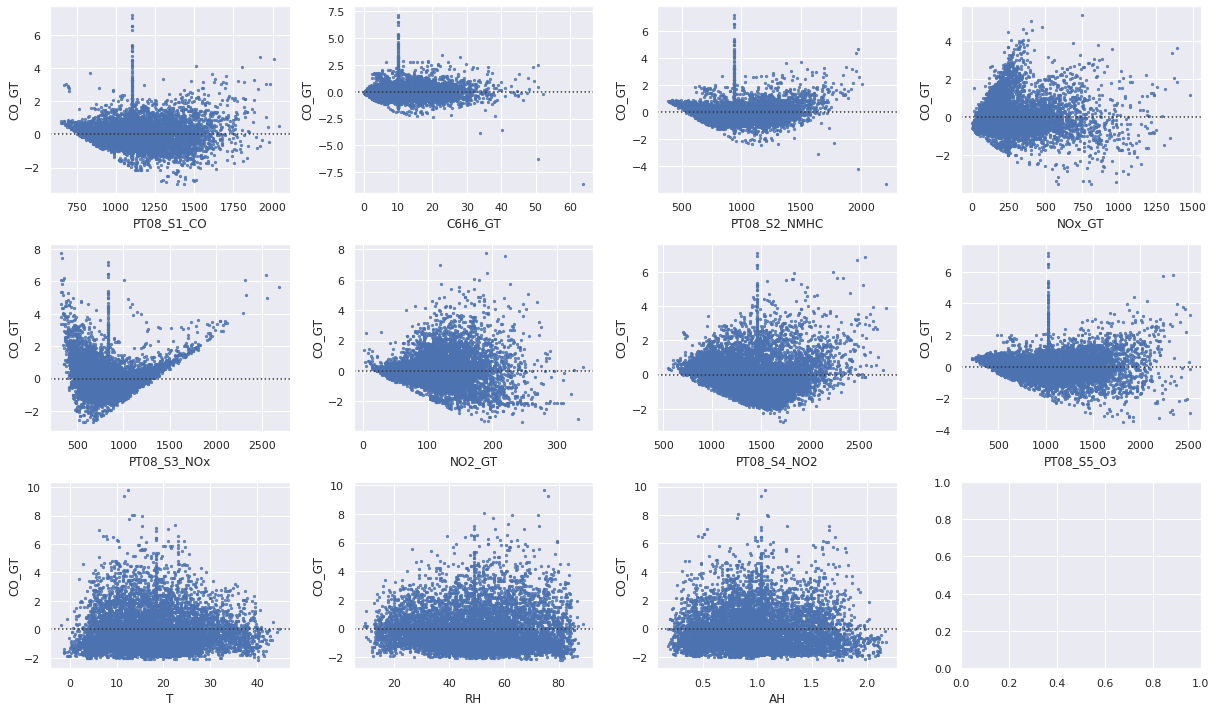

In [26]:
fig, axes = plt.subplots(3, 4, figsize=(17, 10))

sns.residplot(x=data_REMOVE['PT08_S1_CO'], y=data_REMOVE['CO_GT'], ax=axes[0,0], scatter_kws={'s':5})
sns.residplot(x=data_REMOVE['C6H6_GT'], y=data_REMOVE['CO_GT'], ax=axes[0,1], scatter_kws={'s':5})
sns.residplot(x=data_REMOVE['PT08_S2_NMHC'], y=data_REMOVE['CO_GT'], ax=axes[0,2],scatter_kws={'s':5})
sns.residplot(x=data_REMOVE['NOx_GT'], y=data_REMOVE['CO_GT'], ax=axes[0,3], scatter_kws={'s':5})
sns.residplot(x=data_REMOVE['PT08_S3_NOx'], y=data_REMOVE['CO_GT'], ax=axes[1,0], scatter_kws={'s':5})
sns.residplot(x=data_REMOVE['NO2_GT'], y=data_REMOVE['CO_GT'], ax=axes[1,1], scatter_kws={'s':5})
sns.residplot(x=data_REMOVE['PT08_S4_NO2'], y=data_REMOVE['CO_GT'], ax=axes[1,2], scatter_kws={'s':5})
sns.residplot(x=data_REMOVE['PT08_S5_O3'], y=data_REMOVE['CO_GT'], ax=axes[1,3], scatter_kws={'s':5})
sns.residplot(x=data_REMOVE['T'], y=data_REMOVE['CO_GT'], ax=axes[2,0], scatter_kws={'s':5})
sns.residplot(x=data_REMOVE['RH'], y=data_REMOVE['CO_GT'], ax=axes[2,1], scatter_kws={'s':5})
sns.residplot(x=data_REMOVE['AH'], y=data_REMOVE['CO_GT'], ax=axes[2,2], scatter_kws={'s':5})

plt.tight_layout()
plt.show();

**Nhận xét:**
- **Regplot**
  + Từ các biểu đồ Regplot trên ta có thể thấy được các thuộc tính `T, RH, AH` có mức độ tương quan rất yếu hoặc không tương quan với biến mục tiêu (thuộc tính `CO_GT`). Thuộc tính `PT08_S1_NOx` có tương quan không đồng thuận với biến mục tiêu (tương quan âm - nghịch biến).
  + Các thuộc tính còn lại đều có mức độ tương quan mạnh với biến mục tiêu.
- **Resdiplot**
  + Dựa vào Resdiplot thì thuộc tính `C6H6_GT` có thể phát triển theo phương pháp hồi quy tuyến tính. Vì có các datapoint trải khá đều và ngẫu nhiên về 2 trục x = 0.

##### Histogram & Box plot

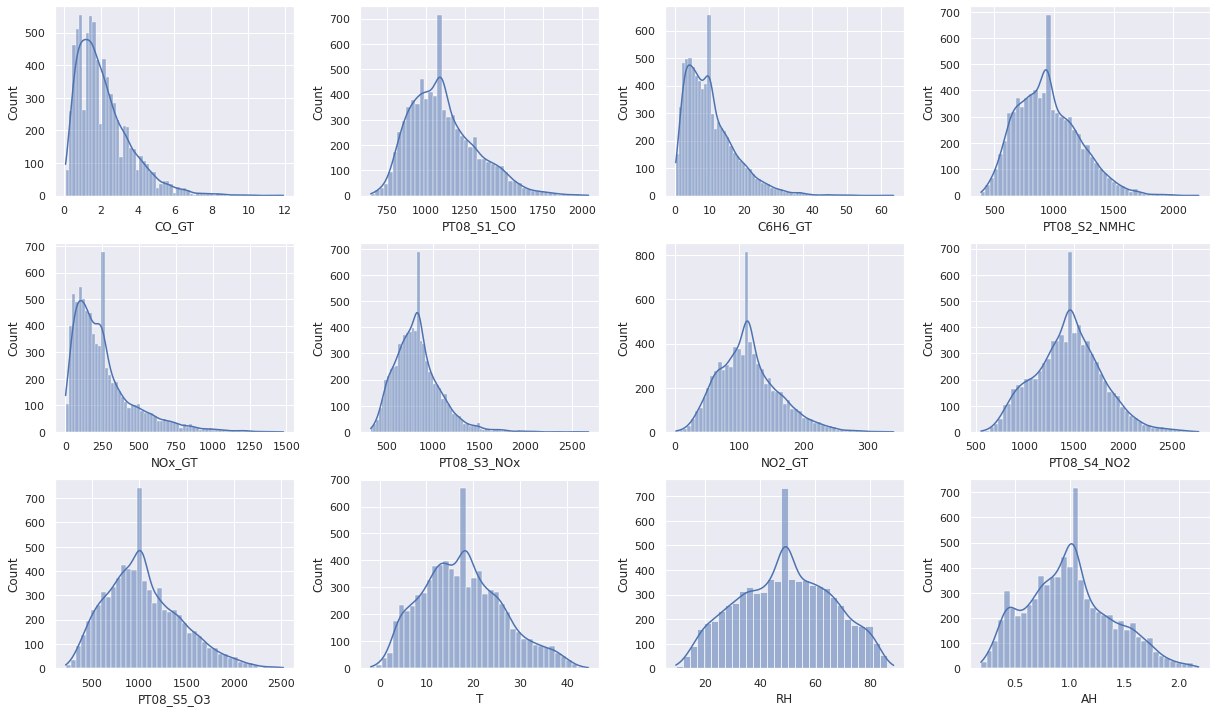

In [27]:
fig, axes = plt.subplots(3, 4, figsize=(17, 10))

sns.histplot(x=data_REMOVE['CO_GT'], data=data_REMOVE, ax=axes[0,0], kde=True)
sns.histplot(x=data_REMOVE['PT08_S1_CO'], data=data_REMOVE, ax=axes[0,1], kde=True)
sns.histplot(x=data_REMOVE['C6H6_GT'], data=data_REMOVE, ax=axes[0,2], kde=True)
sns.histplot(x=data_REMOVE['PT08_S2_NMHC'], data=data_REMOVE, ax=axes[0,3], kde=True)
sns.histplot(x=data_REMOVE['NOx_GT'], data=data_REMOVE, ax=axes[1,0], kde=True)
sns.histplot(x=data_REMOVE['PT08_S3_NOx'], data=data_REMOVE, ax=axes[1,1], kde=True)
sns.histplot(x=data_REMOVE['NO2_GT'], data=data_REMOVE, ax=axes[1,2], kde=True)
sns.histplot(x=data_REMOVE['PT08_S4_NO2'], data=data_REMOVE, ax=axes[1,3], kde=True)
sns.histplot(x=data_REMOVE['PT08_S5_O3'], data=data_REMOVE, ax=axes[2,0], kde=True)
sns.histplot(x=data_REMOVE['T'], data=data_REMOVE, ax=axes[2,1], kde=True)
sns.histplot(x=data_REMOVE['RH'], data=data_REMOVE, ax=axes[2,2], kde=True)
sns.histplot(x=data_REMOVE['AH'], data=data_REMOVE, ax=axes[2,3], kde=True)

plt.tight_layout()
plt.show();

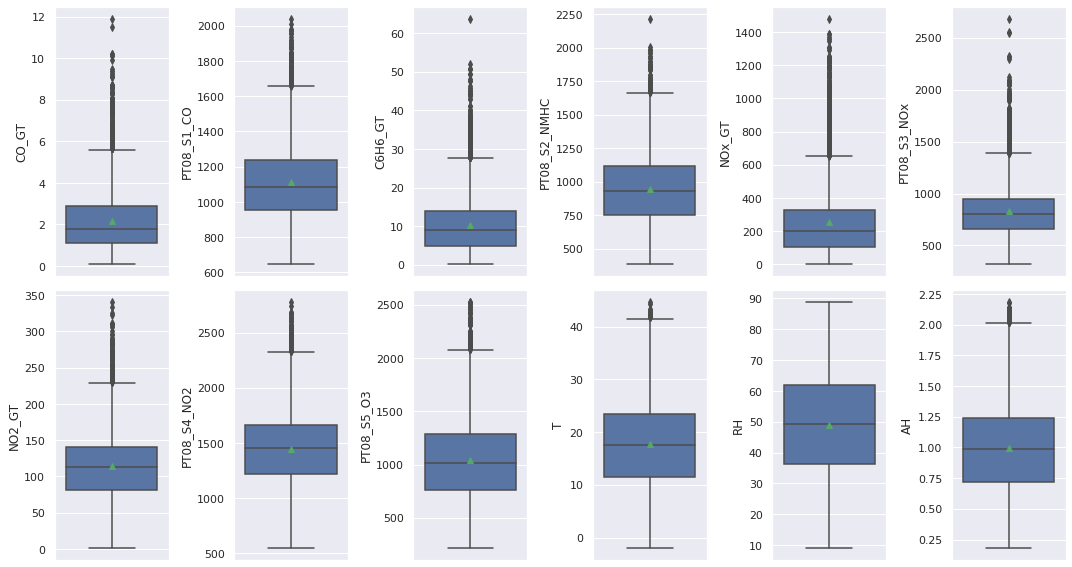

In [28]:
fig, axes = plt.subplots(2, 6, figsize=(15, 8))

sns.boxplot(y=data_REMOVE['CO_GT'], data=data_REMOVE, ax=axes[0,0], showmeans=True)
sns.boxplot(y=data_REMOVE['PT08_S1_CO'], data=data_REMOVE, ax=axes[0,1], showmeans=True)
sns.boxplot(y=data_REMOVE['C6H6_GT'], data=data_REMOVE, ax=axes[0,2], showmeans=True)
sns.boxplot(y=data_REMOVE['PT08_S2_NMHC'], data=data_REMOVE, ax=axes[0,3], showmeans=True)
sns.boxplot(y=data_REMOVE['NOx_GT'], data=data_REMOVE, ax=axes[0,4], showmeans=True)
sns.boxplot(y=data_REMOVE['PT08_S3_NOx'], data=data_REMOVE, ax=axes[0,5], showmeans=True)
sns.boxplot(y=data_REMOVE['NO2_GT'], data=data_REMOVE, ax=axes[1,0], showmeans=True)
sns.boxplot(y=data_REMOVE['PT08_S4_NO2'], data=data_REMOVE, ax=axes[1,1], showmeans=True)
sns.boxplot(y=data_REMOVE['PT08_S5_O3'], data=data_REMOVE, ax=axes[1,2], showmeans=True)
sns.boxplot(y=data_REMOVE['T'], data=data_REMOVE, ax=axes[1,3], showmeans=True)
sns.boxplot(y=data_REMOVE['RH'], data=data_REMOVE, ax=axes[1,4], showmeans=True)
sns.boxplot(y=data_REMOVE['AH'], data=data_REMOVE, ax=axes[1,5], showmeans=True)

plt.tight_layout()
plt.show();

**Nhận xét:**
- **Histplot**
  + Có các giá trị có số lượng cao hơn nhiều so với các giá trị còn lại là do quá trình xử lý missing values điền bằng mean/median. Cách xử lý này vẫn chưa được tốt, hướng giải quyết là sẽ tính mean/median theo ngày/giờ để điền vào các giá trị missing value.
- **Boxplot**
  + Hầu hết các thuộc tính đều có outlier (ngoại lệ, trừ thuộc tính `RH`). Trong đó các thuộc tính `CO_GT, PT08_S1_CO, C6H6_GT, NOx_GT, PT08_S3_NOx, NO2_GT` có số lượng outlier lớn (nhiều).

#### Strategies 2

In [29]:
list_columns = data_MEAN.columns
list_columns

Index(['DATE_TIME', 'CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOx_GT',
       'PT08_S3_NOx', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH'],
      dtype='object')

In [30]:
data_MEAN.describe()

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.152255,1099.833043,10.082984,939.153244,246.897307,835.493464,113.091031,1456.264418,1022.906280,18.317914,49.234037,1.025705
std,1.316069,212.791672,7.302650,261.560236,193.426632,251.743954,43.920954,339.367559,390.612324,8.657639,16.974801,0.395836
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.200000,941.000000,4.600000,743.000000,112.000000,666.000000,86.000000,1242.000000,742.000000,12.000000,36.600000,0.746100
50%,2.150000,1075.000000,8.600000,923.000000,229.000000,818.000000,113.090000,1456.260000,983.000000,18.300000,49.230000,1.015400
75%,2.600000,1221.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


##### Correlation Matrix

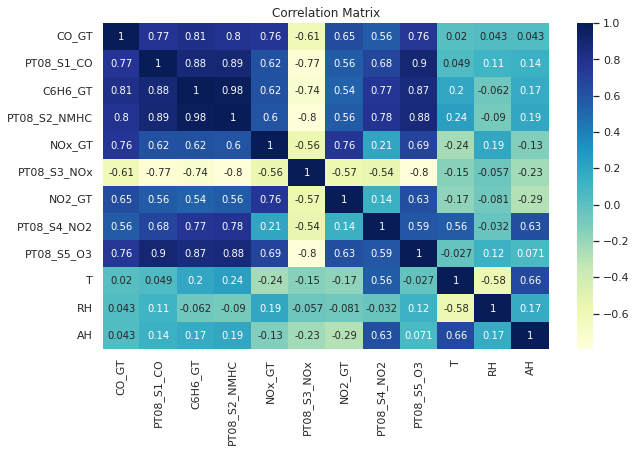

In [31]:
# sns.pairplot(data_MEAN.iloc[:,2:])
plt.figure(figsize=(10,6))
corrMatrix = data_MEAN.iloc[:,1:].corr()
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu", cbar=True)
plt.title('Correlation Matrix')
plt.show();

**Nhận xét**: Xét hệ số tương quan gữa các thuộc tính khác và thuộc tính `CO_GT`.

| $r$ | Ý nghĩa | Thuộc tính |
| ----- | ----- | ----- |
| $|r|$ $<$ 0.3 | Tương quan yếu | `AH, RH, T` |
| 0.3 $\leq$ $|r|$ $<$ 0.5 | Tương quan trung bình | `None` |
| 0.5 $\leq$ $|r|$ $\leq$ 1 | Tương quan mạnh | `PT08_S1_CO, C6H6_GT, PT08_S2_NMHC, NOx_GT,` <br /> `PT08_S3_NOx, NO2_GT, PT08_S4_NO2, PT08_S5_O3`  |

**Note:**
Hệ số tương quan Pearson ($r$) có giá trị giao động trong khoảng liên tục từ -1 đến +1:

    r = 0: Hai biến không có tương quan tuyến tính
    r = 1; r = -1: Hai biến có mối tương quan tuyến tính tuyệt đối.
    r < 0: Hệ số tương quan âm. Nghĩa là giá trị biến x tăng thì giá trị biến y giảm và ngược lại, giá trị biến y tăng thì giá trị biến x giảm.
    r > 0: Hệ số tương quan dương. Nghĩa là giá trị biến x tăng thì giá trị biến y tăng và ngược lại, giá trị biến y tăng thì giá trị biến x cũng tăng.

Tham khảo: [Correlation Coefficient](https://rpubs.com/tranquangquy_ictu/769561)

##### Regplot & Residplot

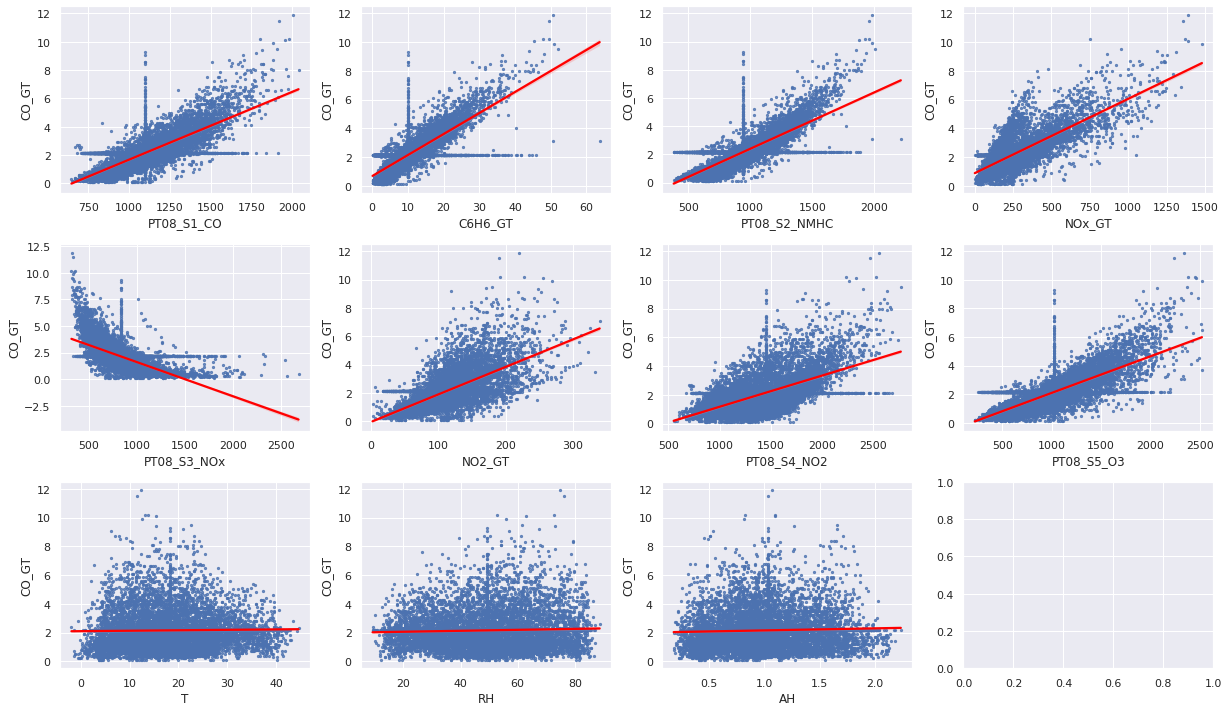

In [32]:
fig, axes = plt.subplots(3, 4, figsize=(17, 10))

sns.regplot(x=data_MEAN['PT08_S1_CO'], y=data_MEAN['CO_GT'], ax=axes[0,0], scatter_kws={'s':5}, line_kws={"color": "red"})
sns.regplot(x=data_MEAN['C6H6_GT'], y=data_MEAN['CO_GT'], ax=axes[0,1], scatter_kws={'s':5}, line_kws={"color": "red"})
sns.regplot(x=data_MEAN['PT08_S2_NMHC'], y=data_MEAN['CO_GT'], ax=axes[0,2], scatter_kws={'s':5}, line_kws={"color": "red"})
sns.regplot(x=data_MEAN['NOx_GT'], y=data_MEAN['CO_GT'], ax=axes[0,3], scatter_kws={'s':5}, line_kws={"color": "red"})
sns.regplot(x=data_MEAN['PT08_S3_NOx'], y=data_MEAN['CO_GT'], ax=axes[1,0], scatter_kws={'s':5}, line_kws={"color": "red"})
sns.regplot(x=data_MEAN['NO2_GT'], y=data_MEAN['CO_GT'], ax=axes[1,1], scatter_kws={'s':5}, line_kws={"color": "red"})
sns.regplot(x=data_MEAN['PT08_S4_NO2'], y=data_MEAN['CO_GT'], ax=axes[1,2], scatter_kws={'s':5}, line_kws={"color": "red"})
sns.regplot(x=data_MEAN['PT08_S5_O3'], y=data_MEAN['CO_GT'], ax=axes[1,3], scatter_kws={'s':5}, line_kws={"color": "red"})
sns.regplot(x=data_MEAN['T'], y=data_MEAN['CO_GT'], ax=axes[2,0], scatter_kws={'s':5}, line_kws={"color": "red"})
sns.regplot(x=data_MEAN['RH'], y=data_MEAN['CO_GT'], ax=axes[2,1], scatter_kws={'s':5}, line_kws={"color": "red"})
sns.regplot(x=data_MEAN['AH'], y=data_MEAN['CO_GT'], ax=axes[2,2], scatter_kws={'s':5}, line_kws={"color": "red"})

plt.tight_layout()
plt.show();

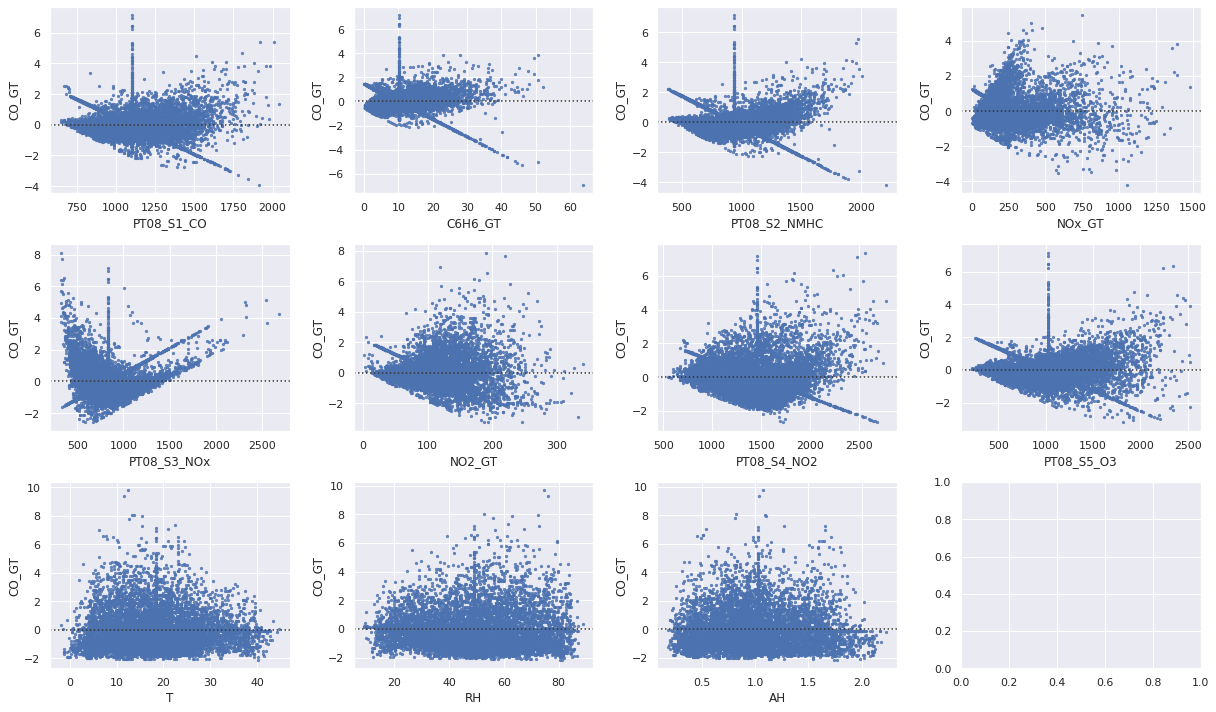

In [33]:
fig, axes = plt.subplots(3, 4, figsize=(17, 10))

sns.residplot(x=data_MEAN['PT08_S1_CO'], y=data_MEAN['CO_GT'], ax=axes[0,0], scatter_kws={'s':5})
sns.residplot(x=data_MEAN['C6H6_GT'], y=data_MEAN['CO_GT'], ax=axes[0,1], scatter_kws={'s':5})
sns.residplot(x=data_MEAN['PT08_S2_NMHC'], y=data_MEAN['CO_GT'], ax=axes[0,2], scatter_kws={'s':5})
sns.residplot(x=data_MEAN['NOx_GT'], y=data_MEAN['CO_GT'], ax=axes[0,3], scatter_kws={'s':5})
sns.residplot(x=data_MEAN['PT08_S3_NOx'], y=data_MEAN['CO_GT'], ax=axes[1,0], scatter_kws={'s':5})
sns.residplot(x=data_MEAN['NO2_GT'], y=data_MEAN['CO_GT'], ax=axes[1,1], scatter_kws={'s':5})
sns.residplot(x=data_MEAN['PT08_S4_NO2'], y=data_MEAN['CO_GT'], ax=axes[1,2], scatter_kws={'s':5})
sns.residplot(x=data_MEAN['PT08_S5_O3'], y=data_MEAN['CO_GT'], ax=axes[1,3], scatter_kws={'s':5})
sns.residplot(x=data_MEAN['T'], y=data_MEAN['CO_GT'], ax=axes[2,0], scatter_kws={'s':5})
sns.residplot(x=data_MEAN['RH'], y=data_MEAN['CO_GT'], ax=axes[2,1], scatter_kws={'s':5})
sns.residplot(x=data_MEAN['AH'], y=data_MEAN['CO_GT'], ax=axes[2,2], scatter_kws={'s':5})

plt.tight_layout()
plt.show();

**Nhận xét:**
- **Regplot**
  + Từ các biểu đồ Regplot trên ta có thể thấy được các thuộc tính `T, RH, AH` có mức độ tương quan rất yếu hoặc không tương quan với biến mục tiêu (thuộc tính `CO_GT`). Thuộc tính `PT08_S1_NOx` có tương quan không đồng thuận với biến mục tiêu (tương quan âm - nghịch biến).
  + Các thuộc tính còn lại đều có mức độ tương quan mạnh với biến mục tiêu.
- **Resdiplot**
  + Dựa vào Resdiplot thì thuộc tính `C6H6_GT` có thể phát triển theo phương pháp hồi quy tuyến tính. Vì có các datapoint trải khá đều và ngẫu nhiên về 2 trục x = 0.

##### Histogram & Box plot

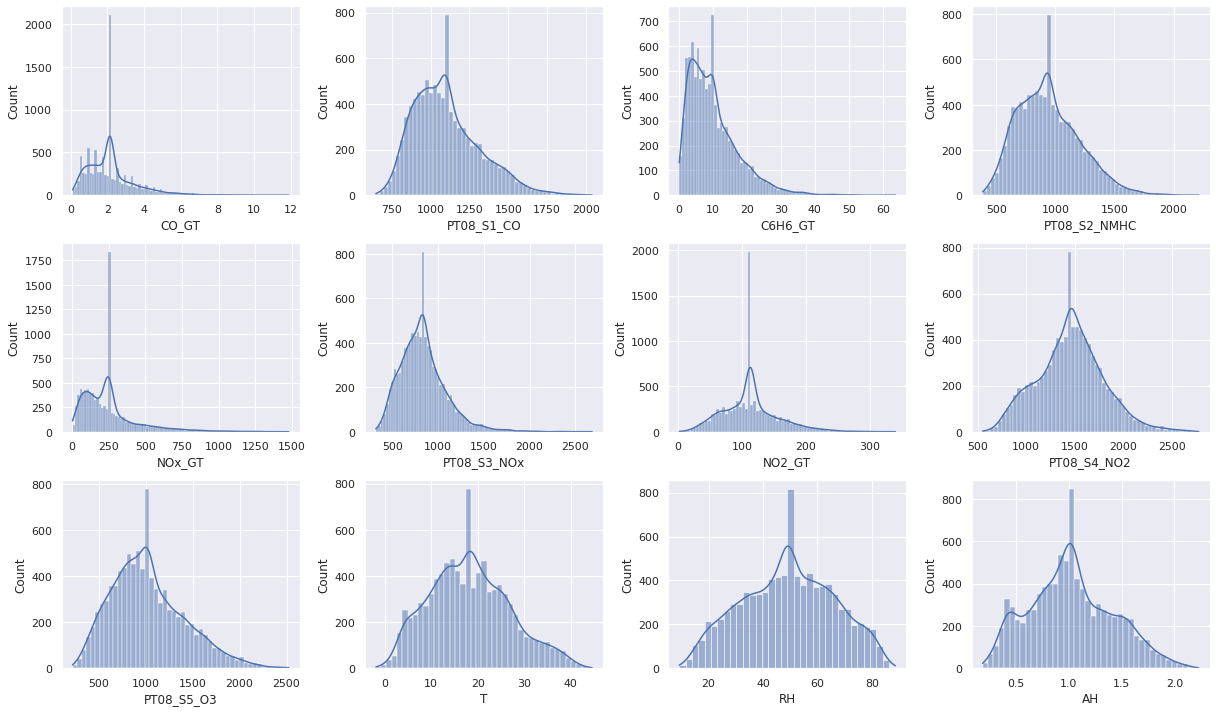

In [34]:
fig, axes = plt.subplots(3, 4, figsize=(17, 10))

sns.histplot(x=data_MEAN['CO_GT'], data=data_MEAN, ax=axes[0,0], kde=True)
sns.histplot(x=data_MEAN['PT08_S1_CO'], data=data_MEAN, ax=axes[0,1], kde=True)
sns.histplot(x=data_MEAN['C6H6_GT'], data=data_MEAN, ax=axes[0,2], kde=True)
sns.histplot(x=data_MEAN['PT08_S2_NMHC'], data=data_MEAN, ax=axes[0,3], kde=True)
sns.histplot(x=data_MEAN['NOx_GT'], data=data_MEAN, ax=axes[1,0], kde=True)
sns.histplot(x=data_MEAN['PT08_S3_NOx'], data=data_MEAN, ax=axes[1,1], kde=True)
sns.histplot(x=data_MEAN['NO2_GT'], data=data_MEAN, ax=axes[1,2], kde=True)
sns.histplot(x=data_MEAN['PT08_S4_NO2'], data=data_MEAN, ax=axes[1,3], kde=True)
sns.histplot(x=data_MEAN['PT08_S5_O3'], data=data_MEAN, ax=axes[2,0], kde=True)
sns.histplot(x=data_MEAN['T'], data=data_MEAN, ax=axes[2,1], kde=True)
sns.histplot(x=data_MEAN['RH'], data=data_MEAN, ax=axes[2,2], kde=True)
sns.histplot(x=data_MEAN['AH'], data=data_MEAN, ax=axes[2,3], kde=True)

plt.tight_layout()
plt.show();

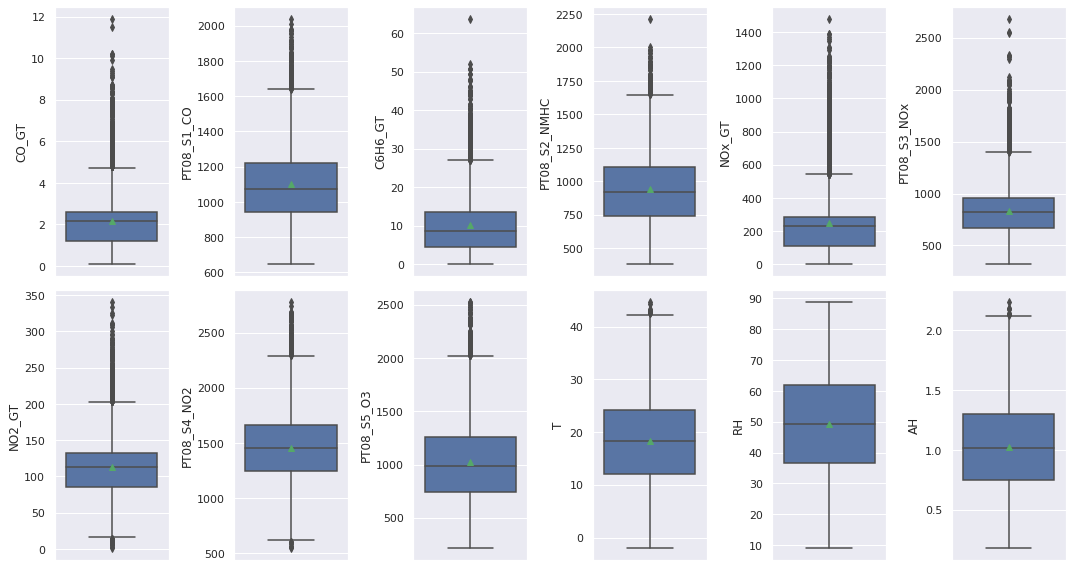

In [35]:
fig, axes = plt.subplots(2, 6, figsize=(15, 8))

sns.boxplot(y=data_MEAN['CO_GT'], data=data_MEAN, ax=axes[0,0], showmeans=True)
sns.boxplot(y=data_MEAN['PT08_S1_CO'], data=data_MEAN, ax=axes[0,1], showmeans=True)
sns.boxplot(y=data_MEAN['C6H6_GT'], data=data_MEAN, ax=axes[0,2], showmeans=True)
sns.boxplot(y=data_MEAN['PT08_S2_NMHC'], data=data_MEAN, ax=axes[0,3], showmeans=True)
sns.boxplot(y=data_MEAN['NOx_GT'], data=data_MEAN, ax=axes[0,4], showmeans=True)
sns.boxplot(y=data_MEAN['PT08_S3_NOx'], data=data_MEAN, ax=axes[0,5], showmeans=True)
sns.boxplot(y=data_MEAN['NO2_GT'], data=data_MEAN, ax=axes[1,0], showmeans=True)
sns.boxplot(y=data_MEAN['PT08_S4_NO2'], data=data_MEAN, ax=axes[1,1], showmeans=True)
sns.boxplot(y=data_MEAN['PT08_S5_O3'], data=data_MEAN, ax=axes[1,2], showmeans=True)
sns.boxplot(y=data_MEAN['T'], data=data_MEAN, ax=axes[1,3], showmeans=True)
sns.boxplot(y=data_MEAN['RH'], data=data_MEAN, ax=axes[1,4], showmeans=True)
sns.boxplot(y=data_MEAN['AH'], data=data_MEAN, ax=axes[1,5], showmeans=True)

plt.tight_layout()
plt.show();

**Nhận xét:**
- **Histplot**
  + Có các giá trị có số lượng cao hơn nhiều so với các giá trị còn lại là do quá trình xử lý missing values điền bằng mean/median. Cách xử lý này vẫn chưa được tốt, hướng giải quyết là sẽ tính mean/median theo ngày/giờ để điền vào các giá trị missing value.
- **Boxplot**
  + Hầu hết các thuộc tính đều có outlier (ngoại lệ, từ thuộc tính `RH`). Trong đó các thuộc tính `CO_GT, PT08_S1_CO, C6H6_GT, NOx_GT, PT08_S3_NOx, NO2_GT` có số lượng outlier lớn (nhiều).

## R - ANOVA

### Import Libraries

In [36]:
# Activate R magic
%load_ext rpy2.ipython

In [37]:
%%R
library(tidyverse)
library(ggplot2)
library(dplyr) 
library(tidyr) 

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Read Dataset REMOVE

In [38]:
%%R
# read data by file csv
data <- read.csv('/content/data_REMOVE.csv', sep=',')
print(head(data))
print(typeof(data))

            DATE_TIME CO_GT PT08_S1_CO C6H6_GT PT08_S2_NMHC NOx_GT PT08_S3_NOx
1 2004-10-03 18:00:00   2.6       1360    11.9         1046    166        1056
2 2004-10-03 19:00:00   2.0       1292     9.4          955    103        1174
3 2004-10-03 20:00:00   2.2       1402     9.0          939    131        1140
4 2004-10-03 21:00:00   2.2       1376     9.2          948    172        1092
5 2004-10-03 22:00:00   1.6       1272     6.5          836    131        1205
6 2004-10-03 23:00:00   1.2       1197     4.7          750     89        1337
  NO2_GT PT08_S4_NO2 PT08_S5_O3    T   RH     AH
1    113        1692       1268 13.6 48.9 0.7578
2     92        1559        972 13.3 47.7 0.7255
3    114        1555       1074 11.9 54.0 0.7502
4    122        1584       1203 11.0 60.0 0.7867
5    116        1490       1110 11.2 59.6 0.7888
6     96        1393        949 11.2 59.2 0.7848
[1] "list"


In [39]:
%%R
summary(data)

  DATE_TIME             CO_GT          PT08_S1_CO      C6H6_GT     
 Length:7674        Min.   : 0.100   Min.   : 647   Min.   : 0.20  
 Class :character   1st Qu.: 1.100   1st Qu.: 953   1st Qu.: 4.80  
 Mode  :character   Median : 1.800   Median :1087   Median : 8.90  
                    Mean   : 2.153   Mean   :1110   Mean   :10.27  
                    3rd Qu.: 2.900   3rd Qu.:1235   3rd Qu.:14.00  
                    Max.   :11.900   Max.   :2040   Max.   :63.70  
  PT08_S2_NMHC        NOx_GT        PT08_S3_NOx         NO2_GT     
 Min.   : 387.0   Min.   :   2.0   Min.   : 322.0   Min.   :  2.0  
 1st Qu.: 752.0   1st Qu.: 107.0   1st Qu.: 657.0   1st Qu.: 82.0  
 Median : 934.0   Median : 201.0   Median : 807.0   Median :113.1  
 Mean   : 946.9   Mean   : 254.9   Mean   : 827.3   Mean   :114.7  
 3rd Qu.:1116.8   3rd Qu.: 326.0   3rd Qu.: 949.0   3rd Qu.:141.0  
 Max.   :2214.0   Max.   :1479.0   Max.   :2683.0   Max.   :340.0  
  PT08_S4_NO2     PT08_S5_O3         T          

#### ANOVA

##### ANOVA đơn thuộc tính

In [40]:
%%R
# ANOVA Lần 1 - bỏ đơn thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + 
             PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH, data=data)
summary(ANOVA)
# Bỏ được thuộc tính AH vì p-value = 0.0827 > 0.05

               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO      1  11692   11692 48826.044  < 2e-16 ***
C6H6_GT         1   1672    1672  6980.888  < 2e-16 ***
PT08_S2_NMHC    1     15      15    64.576 1.07e-15 ***
NOx_GT          1    781     781  3261.151  < 2e-16 ***
PT08_S3_NOx     1     44      44   184.058  < 2e-16 ***
NO2_GT          1     40      40   166.288  < 2e-16 ***
PT08_S4_NO2     1     28      28   118.545  < 2e-16 ***
PT08_S5_O3      1     29      29   123.125  < 2e-16 ***
T               1     30      30   124.825  < 2e-16 ***
RH              1     37      37   154.972  < 2e-16 ***
AH              1      1       1     3.013   0.0827 .  
Residuals    7662   1835       0                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [41]:
%%R
# ANOVA Lần 2 - bỏ đơn thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + 
             PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH, data=data)
summary(ANOVA)
# Không bỏ được thuộc tính đơn biến nào vì tất cả p-value < 0.05

               Df Sum Sq Mean Sq  F value   Pr(>F)    
PT08_S1_CO      1  11692   11692 48813.22  < 2e-16 ***
C6H6_GT         1   1672    1672  6979.06  < 2e-16 ***
PT08_S2_NMHC    1     15      15    64.56 1.08e-15 ***
NOx_GT          1    781     781  3260.30  < 2e-16 ***
PT08_S3_NOx     1     44      44   184.01  < 2e-16 ***
NO2_GT          1     40      40   166.24  < 2e-16 ***
PT08_S4_NO2     1     28      28   118.51  < 2e-16 ***
PT08_S5_O3      1     29      29   123.09  < 2e-16 ***
T               1     30      30   124.79  < 2e-16 ***
RH              1     37      37   154.93  < 2e-16 ***
Residuals    7663   1836       0                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [42]:
%%R
# Build model lần 1
linear <- lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + 
             PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH, data=data)
summary(linear)
# Bỏ được thuộc tính PT08_S2_NMHC vì p-value = 0.632713 > 0.05, sau đó chạy lại ANOVA


Call:
lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + 
    PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3698 -0.1946  0.0124  0.1918  4.3029 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.318e+00  1.397e-01  -9.437  < 2e-16 ***
PT08_S1_CO    1.371e-03  7.355e-05  18.642  < 2e-16 ***
C6H6_GT       8.795e-02  4.928e-03  17.846  < 2e-16 ***
PT08_S2_NMHC -7.818e-05  1.636e-04  -0.478 0.632713    
NOx_GT        2.408e-03  5.951e-05  40.467  < 2e-16 ***
PT08_S3_NOx   1.573e-04  4.734e-05   3.322 0.000897 ***
NO2_GT        2.519e-03  2.335e-04  10.789  < 2e-16 ***
PT08_S4_NO2   1.056e-03  5.662e-05  18.647  < 2e-16 ***
PT08_S5_O3   -5.247e-04  4.088e-05 -12.835  < 2e-16 ***
T            -2.692e-02  1.610e-03 -16.721  < 2e-16 ***
RH           -8.410e-03  6.757e-04 -12.447  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ 

In [43]:
%%R
# ANOVA Lần 3 - bỏ đơn thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + NOx_GT + 
             PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH, data=data)
summary(ANOVA)
# Không bỏ được thuộc tính đơn biến nào vì tất cả p-value < 0.05

              Df Sum Sq Mean Sq F value Pr(>F)    
PT08_S1_CO     1  11692   11692 48818.1 <2e-16 ***
C6H6_GT        1   1672    1672  6979.8 <2e-16 ***
NOx_GT         1    795     795  3320.1 <2e-16 ***
PT08_S3_NOx    1     39      39   161.0 <2e-16 ***
NO2_GT         1     45      45   188.9 <2e-16 ***
PT08_S4_NO2    1     29      29   122.4 <2e-16 ***
PT08_S5_O3     1     30      30   124.5 <2e-16 ***
T              1     28      28   117.9 <2e-16 ***
RH             1     39      39   161.8 <2e-16 ***
Residuals   7664   1836       0                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [44]:
%%R
# Build model lần 2
linear <- lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + NOx_GT + 
             PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH, data=data)
summary(linear)
# Không bỏ được thuộc tính đơn biến nào vì tất cả p-value < 0.05


Call:
lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + NOx_GT + PT08_S3_NOx + 
    NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3526 -0.1951  0.0126  0.1923  4.3041 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.368e+00  9.354e-02 -14.625  < 2e-16 ***
PT08_S1_CO   1.370e-03  7.350e-05  18.637  < 2e-16 ***
C6H6_GT      8.601e-02  2.810e-03  30.613  < 2e-16 ***
NOx_GT       2.409e-03  5.949e-05  40.492  < 2e-16 ***
PT08_S3_NOx  1.681e-04  4.157e-05   4.044 5.31e-05 ***
NO2_GT       2.502e-03  2.307e-04  10.843  < 2e-16 ***
PT08_S4_NO2  1.048e-03  5.430e-05  19.304  < 2e-16 ***
PT08_S5_O3  -5.286e-04  4.004e-05 -13.200  < 2e-16 ***
T           -2.687e-02  1.607e-03 -16.723  < 2e-16 ***
RH          -8.331e-03  6.550e-04 -12.720  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4894 on 7664 degrees of freedom
Multiple R-squared:  0.

Bỏ được 2 đơn thuộc tính là: PT08_S2_NMHC và AH

**Mô hình hồi quy có dạng:**

$$CO\_GT = -1.368e^{+00} + 1.370e^{-03}\times PT08\_S1\_CO + 8.601e^{-02}\times C6H6\_GT + 2.409e^{-03}\times NOx\_GT + 1.681e^{-04}\times PT08\_S3\_NOx + 2.502e^{-03}\times NO2\_GT + 1.048e^{-03}\times PT08\_S4\_NO2 - 5.286e^{-04}\times PT08\_S5\_O3 - 2.687e^{-02}\times T - 8.331e^{-03}\times RH$$



##### ANOVA tương tác 2 thuộc tính

Xét sự tương tác 2 thuộc tính giữa tất cả các thuộc tính trong bộ dữ liệu

In [45]:
%%R
# ANOVA Lần 1 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*T) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) + I(PT08_S5_O3*RH) + I(PT08_S5_O3*AH) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S1_CO * RH) vì p-value = 0.883590 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 60183.325  < 2e-16 ***
C6H6_GT                          1   1672    1672  8604.692  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    79.597  < 2e-16 ***
NOx_GT                           1    781     781  4019.718  < 2e-16 ***
PT08_S3_NOx                      1     44      44   226.871  < 2e-16 ***
NO2_GT                           1     40      40   204.967  < 2e-16 ***
PT08_S4_NO2                      1     28      28   146.119  < 2e-16 ***
PT08_S5_O3                       1     29      29   151.765  < 2e-16 ***
T                                1     30      30   153.860  < 2e-16 ***
RH                               1     37      37   191.019  < 2e-16 ***
AH                               1      1       1     3.714 0.054011 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    32.460 1.26e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [46]:
%%R
# ANOVA Lần 2 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*T) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) + I(PT08_S5_O3*RH) + I(PT08_S5_O3*AH) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S5_O3 * T) vì p-value = 0.760041 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 60175.298  < 2e-16 ***
C6H6_GT                          1   1672    1672  8603.544  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    79.587  < 2e-16 ***
NOx_GT                           1    781     781  4019.181  < 2e-16 ***
PT08_S3_NOx                      1     44      44   226.841  < 2e-16 ***
NO2_GT                           1     40      40   204.940  < 2e-16 ***
PT08_S4_NO2                      1     28      28   146.100  < 2e-16 ***
PT08_S5_O3                       1     29      29   151.745  < 2e-16 ***
T                                1     30      30   153.840  < 2e-16 ***
RH                               1     37      37   190.994  < 2e-16 ***
AH                               1      1       1     3.713 0.054027 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    32.455 1.27e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [47]:
%%R
# ANOVA Lần 3 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*T) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*RH) + I(PT08_S5_O3*AH) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(NO2_GT * AH) vì p-value = 0.764785 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 60160.163  < 2e-16 ***
C6H6_GT                          1   1672    1672  8601.380  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    79.567  < 2e-16 ***
NOx_GT                           1    781     781  4018.171  < 2e-16 ***
PT08_S3_NOx                      1     44      44   226.784  < 2e-16 ***
NO2_GT                           1     40      40   204.888  < 2e-16 ***
PT08_S4_NO2                      1     28      28   146.063  < 2e-16 ***
PT08_S5_O3                       1     29      29   151.706  < 2e-16 ***
T                                1     30      30   153.801  < 2e-16 ***
RH                               1     37      37   190.946  < 2e-16 ***
AH                               1      1       1     3.712 0.054057 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    32.447 1.27e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [48]:
%%R
# ANOVA Lần 4 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*T) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*RH) + I(PT08_S5_O3*AH) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S3_NOx * RH) vì p-value = 0.741532 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 60166.244  < 2e-16 ***
C6H6_GT                          1   1672    1672  8602.250  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    79.575  < 2e-16 ***
NOx_GT                           1    781     781  4018.577  < 2e-16 ***
PT08_S3_NOx                      1     44      44   226.807  < 2e-16 ***
NO2_GT                           1     40      40   204.909  < 2e-16 ***
PT08_S4_NO2                      1     28      28   146.078  < 2e-16 ***
PT08_S5_O3                       1     29      29   151.722  < 2e-16 ***
T                                1     30      30   153.817  < 2e-16 ***
RH                               1     37      37   190.965  < 2e-16 ***
AH                               1      1       1     3.712 0.054045 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    32.450 1.27e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [49]:
%%R
# ANOVA Lần 5 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*T) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*RH) + I(PT08_S5_O3*AH) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S5_O3 * RH) vì p-value = 0.835982 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 60117.952  < 2e-16 ***
C6H6_GT                          1   1672    1672  8595.345  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    79.511  < 2e-16 ***
NOx_GT                           1    781     781  4015.351  < 2e-16 ***
PT08_S3_NOx                      1     44      44   226.625  < 2e-16 ***
NO2_GT                           1     40      40   204.745  < 2e-16 ***
PT08_S4_NO2                      1     28      28   145.960  < 2e-16 ***
PT08_S5_O3                       1     29      29   151.600  < 2e-16 ***
T                                1     30      30   153.693  < 2e-16 ***
RH                               1     37      37   190.812  < 2e-16 ***
AH                               1      1       1     3.709 0.054141 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    32.424 1.29e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [50]:
%%R
# ANOVA Lần 6 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*T) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(C6H6_GT * NOx_GT) vì p-value = 0.731279 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 60125.826  < 2e-16 ***
C6H6_GT                          1   1672    1672  8596.471  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    79.521  < 2e-16 ***
NOx_GT                           1    781     781  4015.877  < 2e-16 ***
PT08_S3_NOx                      1     44      44   226.654  < 2e-16 ***
NO2_GT                           1     40      40   204.771  < 2e-16 ***
PT08_S4_NO2                      1     28      28   145.979  < 2e-16 ***
PT08_S5_O3                       1     29      29   151.620  < 2e-16 ***
T                                1     30      30   153.713  < 2e-16 ***
RH                               1     37      37   190.837  < 2e-16 ***
AH                               1      1       1     3.710 0.054126 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    32.429 1.28e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [51]:
%%R
# ANOVA Lần 7 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*T) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(NOx_GT * T) vì p-value = 0.910189 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 59786.136  < 2e-16 ***
C6H6_GT                          1   1672    1672  8547.904  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    79.072  < 2e-16 ***
NOx_GT                           1    781     781  3993.189  < 2e-16 ***
PT08_S3_NOx                      1     44      44   225.374  < 2e-16 ***
NO2_GT                           1     40      40   203.614  < 2e-16 ***
PT08_S4_NO2                      1     28      28   145.155  < 2e-16 ***
PT08_S5_O3                       1     29      29   150.763  < 2e-16 ***
T                                1     30      30   152.845  < 2e-16 ***
RH                               1     37      37   189.759  < 2e-16 ***
AH                               1      1       1     3.689 0.054810 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    32.245 1.41e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [52]:
%%R
# ANOVA Lần 8 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S4_NO2 * RH) vì p-value = 0.967503 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 59768.270  < 2e-16 ***
C6H6_GT                          1   1672    1672  8545.349  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    79.048  < 2e-16 ***
NOx_GT                           1    781     781  3991.995  < 2e-16 ***
PT08_S3_NOx                      1     44      44   225.307  < 2e-16 ***
NO2_GT                           1     40      40   203.554  < 2e-16 ***
PT08_S4_NO2                      1     28      28   145.111  < 2e-16 ***
PT08_S5_O3                       1     29      29   150.718  < 2e-16 ***
T                                1     30      30   152.799  < 2e-16 ***
RH                               1     37      37   189.702  < 2e-16 ***
AH                               1      1       1     3.688 0.054846 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    32.236 1.42e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [53]:
%%R
# ANOVA Lần 9 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S2_NMHC * NOx_GT) vì p-value = 0.710245 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 59675.340  < 2e-16 ***
C6H6_GT                          1   1672    1672  8532.063  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    78.925  < 2e-16 ***
NOx_GT                           1    781     781  3985.789  < 2e-16 ***
PT08_S3_NOx                      1     44      44   224.956  < 2e-16 ***
NO2_GT                           1     40      40   203.237  < 2e-16 ***
PT08_S4_NO2                      1     28      28   144.886  < 2e-16 ***
PT08_S5_O3                       1     29      29   150.484  < 2e-16 ***
T                                1     30      30   152.562  < 2e-16 ***
RH                               1     37      37   189.407  < 2e-16 ***
AH                               1      1       1     3.682 0.055035 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    32.186 1.45e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [54]:
%%R
# ANOVA Lần 10 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(T * RH) vì p-value = 0.967528 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 59666.547  < 2e-16 ***
C6H6_GT                          1   1672    1672  8530.805  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    78.914  < 2e-16 ***
NOx_GT                           1    781     781  3985.201  < 2e-16 ***
PT08_S3_NOx                      1     44      44   224.923  < 2e-16 ***
NO2_GT                           1     40      40   203.207  < 2e-16 ***
PT08_S4_NO2                      1     28      28   144.864  < 2e-16 ***
PT08_S5_O3                       1     29      29   150.462  < 2e-16 ***
T                                1     30      30   152.539  < 2e-16 ***
RH                               1     37      37   189.379  < 2e-16 ***
AH                               1      1       1     3.682 0.055053 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    32.181 1.46e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [55]:
%%R
# ANOVA Lần 11 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH) +
             I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(RH * AH vì p-value = 0.809772 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 59584.547  < 2e-16 ***
C6H6_GT                          1   1672    1672  8519.082  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    78.805  < 2e-16 ***
NOx_GT                           1    781     781  3979.724  < 2e-16 ***
PT08_S3_NOx                      1     44      44   224.614  < 2e-16 ***
NO2_GT                           1     40      40   202.928  < 2e-16 ***
PT08_S4_NO2                      1     28      28   144.665  < 2e-16 ***
PT08_S5_O3                       1     29      29   150.255  < 2e-16 ***
T                                1     30      30   152.330  < 2e-16 ***
RH                               1     37      37   189.119  < 2e-16 ***
AH                               1      1       1     3.677 0.055220 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    32.137 1.49e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [56]:
%%R
# ANOVA Lần 12 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH) +
             I(T*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S1_CO * AH) vì p-value = 0.569584 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 59591.917  < 2e-16 ***
C6H6_GT                          1   1672    1672  8520.135  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    78.815  < 2e-16 ***
NOx_GT                           1    781     781  3980.217  < 2e-16 ***
PT08_S3_NOx                      1     44      44   224.642  < 2e-16 ***
NO2_GT                           1     40      40   202.953  < 2e-16 ***
PT08_S4_NO2                      1     28      28   144.683  < 2e-16 ***
PT08_S5_O3                       1     29      29   150.273  < 2e-16 ***
T                                1     30      30   152.348  < 2e-16 ***
RH                               1     37      37   189.142  < 2e-16 ***
AH                               1      1       1     3.677 0.055205 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    32.141 1.49e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [57]:
%%R
# ANOVA Lần 13 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH) +
             I(T*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S3_NOx * AH) vì p-value = 0.932285 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 59237.109  < 2e-16 ***
C6H6_GT                          1   1672    1672  8469.407  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    78.346  < 2e-16 ***
NOx_GT                           1    781     781  3956.519  < 2e-16 ***
PT08_S3_NOx                      1     44      44   223.304  < 2e-16 ***
NO2_GT                           1     40      40   201.745  < 2e-16 ***
PT08_S4_NO2                      1     28      28   143.822  < 2e-16 ***
PT08_S5_O3                       1     29      29   149.379  < 2e-16 ***
T                                1     30      30   151.441  < 2e-16 ***
RH                               1     37      37   188.016  < 2e-16 ***
AH                               1      1       1     3.655 0.055934 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    31.949 1.64e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [58]:
%%R
# ANOVA Lần 14 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH) +
             I(T*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(NOx_GT * AH) vì p-value = 0.827582 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 59227.960  < 2e-16 ***
C6H6_GT                          1   1672    1672  8468.099  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    78.334  < 2e-16 ***
NOx_GT                           1    781     781  3955.908  < 2e-16 ***
PT08_S3_NOx                      1     44      44   223.270  < 2e-16 ***
NO2_GT                           1     40      40   201.713  < 2e-16 ***
PT08_S4_NO2                      1     28      28   143.800  < 2e-16 ***
PT08_S5_O3                       1     29      29   149.356  < 2e-16 ***
T                                1     30      30   151.418  < 2e-16 ***
RH                               1     37      37   187.987  < 2e-16 ***
AH                               1      1       1     3.655 0.055953 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    31.944 1.64e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [59]:
%%R
# ANOVA Lần 15 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH) +
             I(T*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(NO2_GT * PT08_S5_O3) vì p-value = 0.527200 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 59227.181  < 2e-16 ***
C6H6_GT                          1   1672    1672  8467.987  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    78.333  < 2e-16 ***
NOx_GT                           1    781     781  3955.856  < 2e-16 ***
PT08_S3_NOx                      1     44      44   223.267  < 2e-16 ***
NO2_GT                           1     40      40   201.711  < 2e-16 ***
PT08_S4_NO2                      1     28      28   143.798  < 2e-16 ***
PT08_S5_O3                       1     29      29   149.354  < 2e-16 ***
T                                1     30      30   151.416  < 2e-16 ***
RH                               1     37      37   187.985  < 2e-16 ***
AH                               1      1       1     3.655 0.055955 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    31.944 1.64e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [60]:
%%R
# ANOVA Lần 16 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH) +
             I(T*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(C6H6_GT * RH) vì p-value = 0.311555 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 59076.553  < 2e-16 ***
C6H6_GT                          1   1672    1672  8446.451  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    78.133  < 2e-16 ***
NOx_GT                           1    781     781  3945.795  < 2e-16 ***
PT08_S3_NOx                      1     44      44   222.699  < 2e-16 ***
NO2_GT                           1     40      40   201.198  < 2e-16 ***
PT08_S4_NO2                      1     28      28   143.432  < 2e-16 ***
PT08_S5_O3                       1     29      29   148.974  < 2e-16 ***
T                                1     30      30   151.031  < 2e-16 ***
RH                               1     37      37   187.507  < 2e-16 ***
AH                               1      1       1     3.645 0.056268 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    31.863 1.71e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [61]:
%%R
# ANOVA Lần 17 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH) +
             I(T*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S2_NMHC * AH) vì p-value = 0.915796 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 58992.232  < 2e-16 ***
C6H6_GT                          1   1672    1672  8434.395  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    78.022  < 2e-16 ***
NOx_GT                           1    781     781  3940.163  < 2e-16 ***
PT08_S3_NOx                      1     44      44   222.381  < 2e-16 ***
NO2_GT                           1     40      40   200.911  < 2e-16 ***
PT08_S4_NO2                      1     28      28   143.227  < 2e-16 ***
PT08_S5_O3                       1     29      29   148.761  < 2e-16 ***
T                                1     30      30   150.815  < 2e-16 ***
RH                               1     37      37   187.239  < 2e-16 ***
AH                               1      1       1     3.640 0.056444 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    31.817 1.75e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [62]:
%%R
# ANOVA Lần 18 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH) +
             I(T*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S2_NMHC * RH) vì p-value = 0.453293 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 58998.291  < 2e-16 ***
C6H6_GT                          1   1672    1672  8435.262  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    78.030  < 2e-16 ***
NOx_GT                           1    781     781  3940.568  < 2e-16 ***
PT08_S3_NOx                      1     44      44   222.404  < 2e-16 ***
NO2_GT                           1     40      40   200.931  < 2e-16 ***
PT08_S4_NO2                      1     28      28   143.242  < 2e-16 ***
PT08_S5_O3                       1     29      29   148.776  < 2e-16 ***
T                                1     30      30   150.831  < 2e-16 ***
RH                               1     37      37   187.258  < 2e-16 ***
AH                               1      1       1     3.640 0.056431 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    31.820 1.75e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [63]:
%%R
# ANOVA Lần 19 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH) +
             I(T*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S3_NOx * NO2_GT) vì p-value = 0.371931 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 58839.317  < 2e-16 ***
C6H6_GT                          1   1672    1672  8412.533  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    77.820  < 2e-16 ***
NOx_GT                           1    781     781  3929.950  < 2e-16 ***
PT08_S3_NOx                      1     44      44   221.805  < 2e-16 ***
NO2_GT                           1     40      40   200.390  < 2e-16 ***
PT08_S4_NO2                      1     28      28   142.856  < 2e-16 ***
PT08_S5_O3                       1     29      29   148.376  < 2e-16 ***
T                                1     30      30   150.424  < 2e-16 ***
RH                               1     37      37   186.754  < 2e-16 ***
AH                               1      1       1     3.631 0.056765 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    31.735 1.83e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [64]:
%%R
# ANOVA Lần 20 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH) +
             I(T*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(C6H6_GT * T) vì p-value = 0.160424 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 58814.789  < 2e-16 ***
C6H6_GT                          1   1672    1672  8409.026  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    77.787  < 2e-16 ***
NOx_GT                           1    781     781  3928.311  < 2e-16 ***
PT08_S3_NOx                      1     44      44   221.712  < 2e-16 ***
NO2_GT                           1     40      40   200.306  < 2e-16 ***
PT08_S4_NO2                      1     28      28   142.796  < 2e-16 ***
PT08_S5_O3                       1     29      29   148.314  < 2e-16 ***
T                                1     30      30   150.362  < 2e-16 ***
RH                               1     37      37   186.676  < 2e-16 ***
AH                               1      1       1     3.629 0.056816 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    31.721 1.84e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [65]:
%%R
# ANOVA Lần 21 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH) +
             I(T*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S2_NMHC * T) vì p-value = 0.701544 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 58621.986  < 2e-16 ***
C6H6_GT                          1   1672    1672  8381.460  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    77.532  < 2e-16 ***
NOx_GT                           1    781     781  3915.434  < 2e-16 ***
PT08_S3_NOx                      1     44      44   220.985  < 2e-16 ***
NO2_GT                           1     40      40   199.650  < 2e-16 ***
PT08_S4_NO2                      1     28      28   142.328  < 2e-16 ***
PT08_S5_O3                       1     29      29   147.828  < 2e-16 ***
T                                1     30      30   149.869  < 2e-16 ***
RH                               1     37      37   186.064  < 2e-16 ***
AH                               1      1       1     3.617 0.057224 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    31.617 1.94e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [66]:
%%R
# ANOVA Lần 22 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH) +
             I(T*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S4_NO2 * T) vì p-value = 0.451992 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 58629.672  < 2e-16 ***
C6H6_GT                          1   1672    1672  8382.559  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    77.542  < 2e-16 ***
NOx_GT                           1    781     781  3915.947  < 2e-16 ***
PT08_S3_NOx                      1     44      44   221.014  < 2e-16 ***
NO2_GT                           1     40      40   199.676  < 2e-16 ***
PT08_S4_NO2                      1     28      28   142.347  < 2e-16 ***
PT08_S5_O3                       1     29      29   147.847  < 2e-16 ***
T                                1     30      30   149.888  < 2e-16 ***
RH                               1     37      37   186.088  < 2e-16 ***
AH                               1      1       1     3.618 0.057207 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    31.622 1.94e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [67]:
%%R
# ANOVA Lần 23 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH) +
             I(T*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(T * AH) vì p-value = 0.247198 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 58609.094  < 2e-16 ***
C6H6_GT                          1   1672    1672  8379.616  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    77.515  < 2e-16 ***
NOx_GT                           1    781     781  3914.573  < 2e-16 ***
PT08_S3_NOx                      1     44      44   220.937  < 2e-16 ***
NO2_GT                           1     40      40   199.606  < 2e-16 ***
PT08_S4_NO2                      1     28      28   142.297  < 2e-16 ***
PT08_S5_O3                       1     29      29   147.795  < 2e-16 ***
T                                1     30      30   149.836  < 2e-16 ***
RH                               1     37      37   186.023  < 2e-16 ***
AH                               1      1       1     3.616 0.057251 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    31.611 1.95e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [68]:
%%R
# ANOVA Lần 24 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S2_NMHC * PT08_S3_NOx) vì p-value = 0.173573 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 58606.488  < 2e-16 ***
C6H6_GT                          1   1672    1672  8379.244  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    77.512  < 2e-16 ***
NOx_GT                           1    781     781  3914.399  < 2e-16 ***
PT08_S3_NOx                      1     44      44   220.927  < 2e-16 ***
NO2_GT                           1     40      40   199.597  < 2e-16 ***
PT08_S4_NO2                      1     28      28   142.291  < 2e-16 ***
PT08_S5_O3                       1     29      29   147.788  < 2e-16 ***
T                                1     30      30   149.829  < 2e-16 ***
RH                               1     37      37   186.015  < 2e-16 ***
AH                               1      1       1     3.616 0.057256 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    31.609 1.95e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [69]:
%%R
# ANOVA Lần 25 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S3_NOx * T) vì p-value = 0.402370 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 58571.093  < 2e-16 ***
C6H6_GT                          1   1672    1672  8374.183  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    77.465  < 2e-16 ***
NOx_GT                           1    781     781  3912.035  < 2e-16 ***
PT08_S3_NOx                      1     44      44   220.794  < 2e-16 ***
NO2_GT                           1     40      40   199.476  < 2e-16 ***
PT08_S4_NO2                      1     28      28   142.205  < 2e-16 ***
PT08_S5_O3                       1     29      29   147.699  < 2e-16 ***
T                                1     30      30   149.739  < 2e-16 ***
RH                               1     37      37   185.902  < 2e-16 ***
AH                               1      1       1     3.614 0.057332 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    31.590 1.97e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [70]:
%%R
# ANOVA Lần 26 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(C6H6_GT * PT08_S3_NOx) vì p-value = 0.111895 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 58563.775  < 2e-16 ***
C6H6_GT                          1   1672    1672  8373.137  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    77.455  < 2e-16 ***
NOx_GT                           1    781     781  3911.546  < 2e-16 ***
PT08_S3_NOx                      1     44      44   220.766  < 2e-16 ***
NO2_GT                           1     40      40   199.451  < 2e-16 ***
PT08_S4_NO2                      1     28      28   142.187  < 2e-16 ***
PT08_S5_O3                       1     29      29   147.681  < 2e-16 ***
T                                1     30      30   149.720  < 2e-16 ***
RH                               1     37      37   185.879  < 2e-16 ***
AH                               1      1       1     3.614 0.057347 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    31.586 1.98e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [71]:
%%R
# ANOVA Lần 27 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(C6H6_GT * AH) vì p-value = 0.304127 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 58529.943  < 2e-16 ***
C6H6_GT                          1   1672    1672  8368.300  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    77.410  < 2e-16 ***
NOx_GT                           1    781     781  3909.286  < 2e-16 ***
PT08_S3_NOx                      1     44      44   220.638  < 2e-16 ***
NO2_GT                           1     40      40   199.336  < 2e-16 ***
PT08_S4_NO2                      1     28      28   142.105  < 2e-16 ***
PT08_S5_O3                       1     29      29   147.595  < 2e-16 ***
T                                1     30      30   149.633  < 2e-16 ***
RH                               1     37      37   185.772  < 2e-16 ***
AH                               1      1       1     3.611 0.057419 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    31.568 1.99e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [72]:
%%R
# ANOVA Lần 28 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S5_O3 * AH) vì p-value = 0.739093 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 58386.935  < 2e-16 ***
C6H6_GT                          1   1672    1672  8347.853  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    77.221  < 2e-16 ***
NOx_GT                           1    781     781  3899.734  < 2e-16 ***
PT08_S3_NOx                      1     44      44   220.099  < 2e-16 ***
NO2_GT                           1     40      40   198.849  < 2e-16 ***
PT08_S4_NO2                      1     28      28   141.758  < 2e-16 ***
PT08_S5_O3                       1     29      29   147.235  < 2e-16 ***
T                                1     30      30   149.268  < 2e-16 ***
RH                               1     37      37   185.318  < 2e-16 ***
AH                               1      1       1     3.603 0.057725 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    31.491 2.07e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [73]:
%%R
# ANOVA Lần 29 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2 * AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S4_NO2 * AH) vì p-value = 0.111300 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 58393.735  < 2e-16 ***
C6H6_GT                          1   1672    1672  8348.825  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    77.230  < 2e-16 ***
NOx_GT                           1    781     781  3900.189  < 2e-16 ***
PT08_S3_NOx                      1     44      44   220.125  < 2e-16 ***
NO2_GT                           1     40      40   198.872  < 2e-16 ***
PT08_S4_NO2                      1     28      28   141.774  < 2e-16 ***
PT08_S5_O3                       1     29      29   147.252  < 2e-16 ***
T                                1     30      30   149.285  < 2e-16 ***
RH                               1     37      37   185.339  < 2e-16 ***
AH                               1      1       1     3.603 0.057710 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    31.494 2.07e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [74]:
%%R
# ANOVA Lần 30 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Bỏ được thuộc tính AH vì p-value = 0.057735 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 58381.989  < 2e-16 ***
C6H6_GT                          1   1672    1672  8347.146  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    77.215  < 2e-16 ***
NOx_GT                           1    781     781  3899.404  < 2e-16 ***
PT08_S3_NOx                      1     44      44   220.081  < 2e-16 ***
NO2_GT                           1     40      40   198.832  < 2e-16 ***
PT08_S4_NO2                      1     28      28   141.746  < 2e-16 ***
PT08_S5_O3                       1     29      29   147.222  < 2e-16 ***
T                                1     30      30   149.255  < 2e-16 ***
RH                               1     37      37   185.302  < 2e-16 ***
AH                               1      1       1     3.602 0.057735 .  
I(PT08_S1_CO * C6H6_GT)          1      6       6    31.488 2.08e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2  

In [75]:
%%R
# ANOVA Lần 31 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Không bỏ được thuộc tính đơn biến và tương tác nào vì tất cả p-value < 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 58388.607  < 2e-16 ***
C6H6_GT                          1   1672    1672  8348.092  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    77.223  < 2e-16 ***
NOx_GT                           1    781     781  3899.846  < 2e-16 ***
PT08_S3_NOx                      1     44      44   220.106  < 2e-16 ***
NO2_GT                           1     40      40   198.855  < 2e-16 ***
PT08_S4_NO2                      1     28      28   141.762  < 2e-16 ***
PT08_S5_O3                       1     29      29   147.239  < 2e-16 ***
T                                1     30      30   149.272  < 2e-16 ***
RH                               1     37      37   185.323  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)          1      6       6    31.242 2.36e-08 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      2       2    11.841 0.000583 ***
I(PT08_S1_CO * NOx_GT)           1     37      37  

In [76]:
%%R
# Build model lần 1
linear <- lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(linear)
# Bỏ được thuộc tính NOx_GT vì p-value = 0.921409 > 0.05, sau đó chạy lại ANOVA


Call:
lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + 
    PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + 
    I(PT08_S1_CO * C6H6_GT) + I(PT08_S1_CO * PT08_S2_NMHC) + 
    I(PT08_S1_CO * NOx_GT) + I(PT08_S1_CO * PT08_S3_NOx) + I(PT08_S1_CO * 
    NO2_GT) + I(PT08_S1_CO * PT08_S4_NO2) + I(PT08_S1_CO * PT08_S5_O3) + 
    I(PT08_S1_CO * T) + I(C6H6_GT * PT08_S2_NMHC) + I(C6H6_GT * 
    NO2_GT) + I(C6H6_GT * PT08_S4_NO2) + I(C6H6_GT * PT08_S5_O3) + 
    I(PT08_S2_NMHC * NO2_GT) + I(PT08_S2_NMHC * PT08_S4_NO2) + 
    I(PT08_S2_NMHC * PT08_S5_O3) + I(NOx_GT * PT08_S3_NOx) + 
    I(NOx_GT * NO2_GT) + I(NOx_GT * PT08_S4_NO2) + I(NOx_GT * 
    PT08_S5_O3) + I(NOx_GT * RH) + I(PT08_S3_NOx * PT08_S4_NO2) + 
    I(PT08_S3_NOx * PT08_S5_O3) + I(NO2_GT * PT08_S4_NO2) + I(NO2_GT * 
    T) + I(NO2_GT * RH) + I(PT08_S4_NO2 * PT08_S5_O3), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8900 -0.1897  0.0130  0.1880  3.2877 

Coefficients:
           

In [77]:
%%R
# ANOVA Lần 32 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S1_CO * PT08_S5_O3) vì p-value = 0.223959 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 58396.178  < 2e-16 ***
C6H6_GT                          1   1672    1672  8349.175  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    77.233  < 2e-16 ***
PT08_S3_NOx                      1      0       0     2.343 0.125924    
NO2_GT                           1    518     518  2586.357  < 2e-16 ***
PT08_S4_NO2                      1      1       1     2.944 0.086215 .  
PT08_S5_O3                       1      2       2    11.388 0.000743 ***
T                                1     60      60   299.412  < 2e-16 ***
RH                               1     16      16    81.510  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)          1     29      29   146.971  < 2e-16 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      0       0     2.360 0.124532    
I(PT08_S1_CO * NOx_GT)           1    285     285  1425.648  < 2e-16 ***
I(PT08_S1_CO * PT08_S3_NOx)      1     21      21  

In [78]:
%%R
# ANOVA Lần 33 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S3_NOx * PT08_S4_NO2) vì p-value = 0.818552 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 57802.625  < 2e-16 ***
C6H6_GT                          1   1672    1672  8264.312  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    76.448  < 2e-16 ***
PT08_S3_NOx                      1      0       0     2.319 0.127864    
NO2_GT                           1    518     518  2560.068  < 2e-16 ***
PT08_S4_NO2                      1      1       1     2.914 0.087827 .  
PT08_S5_O3                       1      2       2    11.272 0.000791 ***
T                                1     60      60   296.368  < 2e-16 ***
RH                               1     16      16    80.681  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)          1     29      29   145.477  < 2e-16 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      0       0     2.336 0.126462    
I(PT08_S1_CO * NOx_GT)           1    285     285  1411.157  < 2e-16 ***
I(PT08_S1_CO * PT08_S3_NOx)      1     21      21  

In [79]:
%%R
# ANOVA Lần 34 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S2_NMHC * PT08_S5_O3) vì p-value = 0.517451 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 57755.053  < 2e-16 ***
C6H6_GT                          1   1672    1672  8257.510  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    76.386  < 2e-16 ***
PT08_S3_NOx                      1      0       0     2.317 0.128021    
NO2_GT                           1    518     518  2557.961  < 2e-16 ***
PT08_S4_NO2                      1      1       1     2.912 0.087958 .  
PT08_S5_O3                       1      2       2    11.263 0.000795 ***
T                                1     60      60   296.124  < 2e-16 ***
RH                               1     16      16    80.615  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)          1     29      29   145.357  < 2e-16 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      0       0     2.334 0.126619    
I(PT08_S1_CO * NOx_GT)           1    285     285  1409.995  < 2e-16 ***
I(PT08_S1_CO * PT08_S3_NOx)      1     21      21  

In [80]:
%%R
# ANOVA Lần 35 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Bỏ được thuộc tính PT08_S3_NOx vì p-value = 0.128062 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 57742.632  < 2e-16 ***
C6H6_GT                          1   1672    1672  8255.734  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    76.369  < 2e-16 ***
PT08_S3_NOx                      1      0       0     2.316 0.128062    
NO2_GT                           1    518     518  2557.411  < 2e-16 ***
PT08_S4_NO2                      1      1       1     2.911 0.087992 .  
PT08_S5_O3                       1      2       2    11.260 0.000796 ***
T                                1     60      60   296.061  < 2e-16 ***
RH                               1     16      16    80.598  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)          1     29      29   145.326  < 2e-16 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      0       0     2.333 0.126659    
I(PT08_S1_CO * NOx_GT)           1    285     285  1409.692  < 2e-16 ***
I(PT08_S1_CO * PT08_S3_NOx)      1     21      21  

In [81]:
%%R
# ANOVA Lần 36 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Bỏ được thuộc tính PT08_S4_NO2 vì p-value = 0.742274 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 57662.278  < 2e-16 ***
C6H6_GT                          1   1672    1672  8244.246  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    76.263  < 2e-16 ***
NO2_GT                           1    504     504  2483.623  < 2e-16 ***
PT08_S4_NO2                      1      0       0     0.108 0.742274    
PT08_S5_O3                       1      5       5    25.553 4.41e-07 ***
T                                1     66      66   326.827  < 2e-16 ***
RH                               1      8       8    37.525 9.47e-10 ***
I(PT08_S1_CO * C6H6_GT)          1     28      28   136.758  < 2e-16 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      3       3    14.101 0.000175 ***
I(PT08_S1_CO * NOx_GT)           1    295     295  1453.172  < 2e-16 ***
I(PT08_S1_CO * PT08_S3_NOx)      1     10      10    50.578 1.25e-12 ***
I(PT08_S1_CO * NO2_GT)           1     13      13  

In [82]:
%%R
# ANOVA Lần 36 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Không bỏ được thuộc tính đơn biến và tương tác nào vì tất cả p-value < 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 57238.987  < 2e-16 ***
C6H6_GT                          1   1672    1672  8183.726  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    75.703  < 2e-16 ***
NO2_GT                           1    504     504  2465.391  < 2e-16 ***
PT08_S5_O3                       1      5       5    23.330 1.39e-06 ***
T                                1     50      50   246.969  < 2e-16 ***
RH                               1     20      20    96.695  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)          1     28      28   137.242  < 2e-16 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      3       3    15.525 8.22e-05 ***
I(PT08_S1_CO * NOx_GT)           1    212     212  1039.186  < 2e-16 ***
I(PT08_S1_CO * PT08_S3_NOx)      1     42      42   204.267  < 2e-16 ***
I(PT08_S1_CO * NO2_GT)           1     11      11    51.892 6.42e-13 ***
I(PT08_S1_CO * PT08_S4_NO2)      1    103     103  

In [83]:
%%R
# Build model lần 2
linear <- lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(linear)
# Bỏ được thuộc tính I(PT08_S1_CO * PT08_S3_NOx) vì p-value = 0.88626 > 0.05, sau đó chạy lại ANOVA


Call:
lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + 
    PT08_S5_O3 + T + RH + I(PT08_S1_CO * C6H6_GT) + I(PT08_S1_CO * 
    PT08_S2_NMHC) + I(PT08_S1_CO * NOx_GT) + I(PT08_S1_CO * PT08_S3_NOx) + 
    I(PT08_S1_CO * NO2_GT) + I(PT08_S1_CO * PT08_S4_NO2) + I(PT08_S1_CO * 
    T) + I(C6H6_GT * PT08_S2_NMHC) + I(C6H6_GT * NO2_GT) + I(C6H6_GT * 
    PT08_S4_NO2) + I(C6H6_GT * PT08_S5_O3) + I(PT08_S2_NMHC * 
    NO2_GT) + I(PT08_S2_NMHC * PT08_S4_NO2) + I(NOx_GT * PT08_S3_NOx) + 
    I(NOx_GT * NO2_GT) + I(NOx_GT * PT08_S4_NO2) + I(NOx_GT * 
    PT08_S5_O3) + I(NOx_GT * RH) + I(PT08_S3_NOx * PT08_S5_O3) + 
    I(NO2_GT * PT08_S4_NO2) + I(NO2_GT * T) + I(NO2_GT * RH) + 
    I(PT08_S4_NO2 * PT08_S5_O3), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8955 -0.1828  0.0172  0.1864  3.3232 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -2.578e+00  4.273e-01  -6.034 1.68e-09 ***
PT0

In [84]:
%%R
# ANOVA Lần 37 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Không bỏ được thuộc tính đơn biến và tương tác nào vì tất cả p-value < 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 57246.323  < 2e-16 ***
C6H6_GT                          1   1672    1672  8184.775  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    75.713  < 2e-16 ***
NO2_GT                           1    504     504  2465.707  < 2e-16 ***
PT08_S5_O3                       1      5       5    23.333 1.39e-06 ***
T                                1     50      50   247.001  < 2e-16 ***
RH                               1     20      20    96.708  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)          1     28      28   137.259  < 2e-16 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      3       3    15.527 8.21e-05 ***
I(PT08_S1_CO * NOx_GT)           1    212     212  1039.319  < 2e-16 ***
I(PT08_S1_CO * NO2_GT)           1      7       7    35.845 2.23e-09 ***
I(PT08_S1_CO * PT08_S4_NO2)      1    141     141   691.151  < 2e-16 ***
I(PT08_S1_CO * T)                1      3       3  

In [85]:
%%R
# Build model lần 3
linear <- lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(linear)
# Bỏ được thuộc tính I(PT08_S1_CO * PT08_S4_NO2) vì p-value = 0.38753 > 0.05, sau đó chạy lại ANOVA


Call:
lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + 
    PT08_S5_O3 + T + RH + I(PT08_S1_CO * C6H6_GT) + I(PT08_S1_CO * 
    PT08_S2_NMHC) + I(PT08_S1_CO * NOx_GT) + I(PT08_S1_CO * NO2_GT) + 
    I(PT08_S1_CO * PT08_S4_NO2) + I(PT08_S1_CO * T) + I(C6H6_GT * 
    PT08_S2_NMHC) + I(C6H6_GT * NO2_GT) + I(C6H6_GT * PT08_S4_NO2) + 
    I(C6H6_GT * PT08_S5_O3) + I(PT08_S2_NMHC * NO2_GT) + I(PT08_S2_NMHC * 
    PT08_S4_NO2) + I(NOx_GT * PT08_S3_NOx) + I(NOx_GT * NO2_GT) + 
    I(NOx_GT * PT08_S4_NO2) + I(NOx_GT * PT08_S5_O3) + I(NOx_GT * 
    RH) + I(PT08_S3_NOx * PT08_S5_O3) + I(NO2_GT * PT08_S4_NO2) + 
    I(NO2_GT * T) + I(NO2_GT * RH) + I(PT08_S4_NO2 * PT08_S5_O3), 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8940 -0.1830  0.0175  0.1860  3.3229 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -2.550e+00  3.796e-01  -6.717 1.99e-11 ***
PT08_S1_CO                     3.

In [86]:
%%R
# ANOVA Lần 38 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(NO2_GT * T) vì p-value = 0.115402 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 57248.219  < 2e-16 ***
C6H6_GT                          1   1672    1672  8185.046  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    75.715  < 2e-16 ***
NO2_GT                           1    504     504  2465.789  < 2e-16 ***
PT08_S5_O3                       1      5       5    23.333 1.39e-06 ***
T                                1     50      50   247.009  < 2e-16 ***
RH                               1     20      20    96.711  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)          1     28      28   137.264  < 2e-16 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      3       3    15.527 8.20e-05 ***
I(PT08_S1_CO * NOx_GT)           1    212     212  1039.353  < 2e-16 ***
I(PT08_S1_CO * NO2_GT)           1      7       7    35.846 2.23e-09 ***
I(PT08_S1_CO * T)                1      3       3    15.016 0.000107 ***
I(C6H6_GT * PT08_S2_NMHC)        1     90      90  

In [87]:
%%R
# ANOVA Lần 39 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Không bỏ được thuộc tính đơn biến và tương tác nào vì tất cả p-value < 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 57120.743  < 2e-16 ***
C6H6_GT                          1   1672    1672  8166.820  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    75.547  < 2e-16 ***
NO2_GT                           1    504     504  2460.298  < 2e-16 ***
PT08_S5_O3                       1      5       5    23.282 1.43e-06 ***
T                                1     50      50   246.459  < 2e-16 ***
RH                               1     20      20    96.496  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)          1     28      28   136.958  < 2e-16 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      3       3    15.493 8.36e-05 ***
I(PT08_S1_CO * NOx_GT)           1    212     212  1037.039  < 2e-16 ***
I(PT08_S1_CO * NO2_GT)           1      7       7    35.766 2.33e-09 ***
I(PT08_S1_CO * T)                1      3       3    14.983 0.000109 ***
I(C6H6_GT * PT08_S2_NMHC)        1     90      90  

In [88]:
%%R
# Build model lần 4
linear <- lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(linear)
# Bỏ được thuộc tính I(PT08_S1_CO * NOx_GT) vì p-value = 0.251494 > 0.05, sau đó chạy lại ANOVA


Call:
lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + 
    PT08_S5_O3 + T + RH + I(PT08_S1_CO * C6H6_GT) + I(PT08_S1_CO * 
    PT08_S2_NMHC) + I(PT08_S1_CO * NOx_GT) + I(PT08_S1_CO * NO2_GT) + 
    I(PT08_S1_CO * T) + I(C6H6_GT * PT08_S2_NMHC) + I(C6H6_GT * 
    NO2_GT) + I(C6H6_GT * PT08_S4_NO2) + I(C6H6_GT * PT08_S5_O3) + 
    I(PT08_S2_NMHC * NO2_GT) + I(PT08_S2_NMHC * PT08_S4_NO2) + 
    I(NOx_GT * PT08_S3_NOx) + I(NOx_GT * NO2_GT) + I(NOx_GT * 
    PT08_S4_NO2) + I(NOx_GT * PT08_S5_O3) + I(NOx_GT * RH) + 
    I(PT08_S3_NOx * PT08_S5_O3) + I(NO2_GT * PT08_S4_NO2) + I(NO2_GT * 
    RH) + I(PT08_S4_NO2 * PT08_S5_O3), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9319 -0.1859  0.0160  0.1878  3.3224 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -2.430e+00  3.385e-01  -7.180 7.62e-13 ***
PT08_S1_CO                     3.614e-03  5.565e-04   6.493 8.92e-11 ***
C6H6_GT    

In [89]:
%%R
# ANOVA Lần 40 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(C6H6_GT * PT08_S5_O3) vì p-value = 0.202729 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 57118.389  < 2e-16 ***
C6H6_GT                          1   1672    1672  8166.483  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    75.544  < 2e-16 ***
NO2_GT                           1    504     504  2460.197  < 2e-16 ***
PT08_S5_O3                       1      5       5    23.281 1.43e-06 ***
T                                1     50      50   246.449  < 2e-16 ***
RH                               1     20      20    96.492  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)          1     28      28   136.952  < 2e-16 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      3       3    15.492 8.36e-05 ***
I(PT08_S1_CO * NO2_GT)           1      1       1     5.457 0.019512 *  
I(PT08_S1_CO * T)                1      8       8    40.648 1.93e-10 ***
I(C6H6_GT * PT08_S2_NMHC)        1    134     134   653.001  < 2e-16 ***
I(C6H6_GT * NO2_GT)              1     13      13  

In [90]:
%%R
# ANOVA Lần 41 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(NOx_GT * PT08_S4_NO2) vì p-value = 0.164838 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 56749.309  < 2e-16 ***
C6H6_GT                          1   1672    1672  8113.714  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    75.055  < 2e-16 ***
NO2_GT                           1    504     504  2444.300  < 2e-16 ***
PT08_S5_O3                       1      5       5    23.130 1.54e-06 ***
T                                1     50      50   244.856  < 2e-16 ***
RH                               1     20      20    95.868  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)          1     28      28   136.067  < 2e-16 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      3       3    15.392 8.81e-05 ***
I(PT08_S1_CO * NO2_GT)           1      1       1     5.422 0.019910 *  
I(PT08_S1_CO * T)                1      8       8    40.386 2.20e-10 ***
I(C6H6_GT * PT08_S2_NMHC)        1    134     134   648.781  < 2e-16 ***
I(C6H6_GT * NO2_GT)              1     13      13  

In [91]:
%%R
# ANOVA Lần 42 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(NOx_GT * RH) vì p-value = 0.846047 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 56620.395  < 2e-16 ***
C6H6_GT                          1   1672    1672  8095.283  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    74.885  < 2e-16 ***
NO2_GT                           1    504     504  2438.747  < 2e-16 ***
PT08_S5_O3                       1      5       5    23.078 1.59e-06 ***
T                                1     50      50   244.300  < 2e-16 ***
RH                               1     20      20    95.650  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)          1     28      28   135.758  < 2e-16 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      3       3    15.357 8.98e-05 ***
I(PT08_S1_CO * NO2_GT)           1      1       1     5.410 0.020050 *  
I(PT08_S1_CO * T)                1      8       8    40.294 2.31e-10 ***
I(C6H6_GT * PT08_S2_NMHC)        1    134     134   647.308  < 2e-16 ***
I(C6H6_GT * NO2_GT)              1     13      13  

In [92]:
%%R
# ANOVA Lần 43 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S5_O3) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Không bỏ được thuộc tính đơn biến và tương tác nào vì tất cả p-value < 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 56574.055  < 2e-16 ***
C6H6_GT                          1   1672    1672  8088.657  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    74.824  < 2e-16 ***
NO2_GT                           1    504     504  2436.751  < 2e-16 ***
PT08_S5_O3                       1      5       5    23.059 1.60e-06 ***
T                                1     50      50   244.100  < 2e-16 ***
RH                               1     20      20    95.572  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)          1     28      28   135.647  < 2e-16 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      3       3    15.344 9.04e-05 ***
I(PT08_S1_CO * NO2_GT)           1      1       1     5.405 0.020101 *  
I(PT08_S1_CO * T)                1      8       8    40.261 2.35e-10 ***
I(C6H6_GT * PT08_S2_NMHC)        1    134     134   646.778  < 2e-16 ***
I(C6H6_GT * NO2_GT)              1     13      13  

In [93]:
%%R
# Build model lần 5
linear <- lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S5_O3) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(linear)
# Bỏ được thuộc tính RH vì p-value = 0.14471 > 0.05, sau đó chạy lại ANOVA


Call:
lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + 
    PT08_S5_O3 + T + RH + I(PT08_S1_CO * C6H6_GT) + I(PT08_S1_CO * 
    PT08_S2_NMHC) + I(PT08_S1_CO * NO2_GT) + I(PT08_S1_CO * T) + 
    I(C6H6_GT * PT08_S2_NMHC) + I(C6H6_GT * NO2_GT) + I(C6H6_GT * 
    PT08_S4_NO2) + I(PT08_S2_NMHC * NO2_GT) + I(PT08_S2_NMHC * 
    PT08_S4_NO2) + I(NOx_GT * PT08_S3_NOx) + I(NOx_GT * NO2_GT) + 
    I(NOx_GT * PT08_S5_O3) + I(PT08_S3_NOx * PT08_S5_O3) + I(NO2_GT * 
    PT08_S4_NO2) + I(NO2_GT * RH) + I(PT08_S4_NO2 * PT08_S5_O3), 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8974 -0.1847  0.0135  0.1908  3.3397 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -2.969e+00  3.310e-01  -8.970  < 2e-16 ***
PT08_S1_CO                     4.606e-03  5.434e-04   8.476  < 2e-16 ***
C6H6_GT                       -6.549e-02  2.421e-02  -2.705  0.00684 ** 
PT08_S2_NMHC                   4.871e

In [94]:
%%R
# ANOVA Lần 44 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 + T +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) +
             I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S5_O3) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S2_NMHC * PT08_S4_NO2) vì p-value = 0.11746 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1  11692   11692 56565.718  < 2e-16 ***
C6H6_GT                          1   1672    1672  8087.465  < 2e-16 ***
PT08_S2_NMHC                     1     15      15    74.813  < 2e-16 ***
NO2_GT                           1    504     504  2436.392  < 2e-16 ***
PT08_S5_O3                       1      5       5    23.055 1.60e-06 ***
T                                1     50      50   244.064  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)          1     25      25   121.185  < 2e-16 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      1       1     5.856  0.01555 *  
I(PT08_S1_CO * NO2_GT)           1      2       2     9.171  0.00247 ** 
I(PT08_S1_CO * T)                1     13      13    62.518 3.01e-15 ***
I(C6H6_GT * PT08_S2_NMHC)        1    136     136   659.184  < 2e-16 ***
I(C6H6_GT * NO2_GT)              1     11      11    53.663 2.62e-13 ***
I(C6H6_GT * PT08_S4_NO2)         1     18      18  

In [95]:
%%R
# ANOVA Lần 45 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 + T +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) +
             I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S5_O3) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Không bỏ được thuộc tính đơn biến và tương tác nào vì tất cả p-value < 0.05

                               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                      1  11692   11692 56038.665  < 2e-16 ***
C6H6_GT                         1   1672    1672  8012.110  < 2e-16 ***
PT08_S2_NMHC                    1     15      15    74.116  < 2e-16 ***
NO2_GT                          1    504     504  2413.691  < 2e-16 ***
PT08_S5_O3                      1      5       5    22.840 1.79e-06 ***
T                               1     50      50   241.790  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)         1     25      25   120.056  < 2e-16 ***
I(PT08_S1_CO * PT08_S2_NMHC)    1      1       1     5.801  0.01604 *  
I(PT08_S1_CO * NO2_GT)          1      2       2     9.085  0.00259 ** 
I(PT08_S1_CO * T)               1     13      13    61.935 4.04e-15 ***
I(C6H6_GT * PT08_S2_NMHC)       1    136     136   653.042  < 2e-16 ***
I(C6H6_GT * NO2_GT)             1     11      11    53.163 3.38e-13 ***
I(C6H6_GT * PT08_S4_NO2)        1     18      18    84.789  < 2e

In [96]:
%%R
# Build model lần 6
linear <- lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 + T +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) +
             I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S5_O3) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(linear)
# Bỏ được thuộc tính T vì p-value = 0.7191 > 0.05, sau đó chạy lại ANOVA


Call:
lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + 
    PT08_S5_O3 + T + I(PT08_S1_CO * C6H6_GT) + I(PT08_S1_CO * 
    PT08_S2_NMHC) + I(PT08_S1_CO * NO2_GT) + I(PT08_S1_CO * T) + 
    I(C6H6_GT * PT08_S2_NMHC) + I(C6H6_GT * NO2_GT) + I(C6H6_GT * 
    PT08_S4_NO2) + I(PT08_S2_NMHC * NO2_GT) + I(NOx_GT * PT08_S3_NOx) + 
    I(NOx_GT * NO2_GT) + I(NOx_GT * PT08_S5_O3) + I(PT08_S3_NOx * 
    PT08_S5_O3) + I(NO2_GT * PT08_S4_NO2) + I(NO2_GT * RH) + 
    I(PT08_S4_NO2 * PT08_S5_O3), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9255 -0.1863  0.0138  0.1915  3.3120 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -3.076e+00  3.323e-01  -9.257  < 2e-16 ***
PT08_S1_CO                    5.138e-03  5.108e-04  10.057  < 2e-16 ***
C6H6_GT                      -5.612e-02  2.394e-02  -2.344   0.0191 *  
PT08_S2_NMHC                  3.881e-03  5.900e-04   6.578 5.07e-11 ***
NO2_GT     

In [97]:
%%R
# ANOVA Lần 46 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) +
             I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S5_O3) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S1_CO * NO2_GT) vì p-value = 0.735155 > 0.05

                               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                      1  11692   11692 56045.041  < 2e-16 ***
C6H6_GT                         1   1672    1672  8013.022  < 2e-16 ***
PT08_S2_NMHC                    1     15      15    74.124  < 2e-16 ***
NO2_GT                          1    504     504  2413.966  < 2e-16 ***
PT08_S5_O3                      1      5       5    22.843 1.79e-06 ***
I(PT08_S1_CO * C6H6_GT)         1     22      22   107.629  < 2e-16 ***
I(PT08_S1_CO * PT08_S2_NMHC)    1      1       1     6.234 0.012551 *  
I(PT08_S1_CO * NO2_GT)          1      0       0     0.114 0.735155    
I(PT08_S1_CO * T)               1     63      63   303.049  < 2e-16 ***
I(C6H6_GT * PT08_S2_NMHC)       1    135     135   649.076  < 2e-16 ***
I(C6H6_GT * NO2_GT)             1      9       9    45.458 1.67e-11 ***
I(C6H6_GT * PT08_S4_NO2)        1     12      12    56.182 7.35e-14 ***
I(PT08_S2_NMHC * NO2_GT)        1      1       1     5.171 0.022

In [98]:
%%R
# ANOVA Lần 47 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) +
             I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S5_O3) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S2_NMHC * NO2_GT) vì p-value = 0.689945 > 0.05

                               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                      1  11692   11692 55940.087  < 2e-16 ***
C6H6_GT                         1   1672    1672  7998.016  < 2e-16 ***
PT08_S2_NMHC                    1     15      15    73.985  < 2e-16 ***
NO2_GT                          1    504     504  2409.445  < 2e-16 ***
PT08_S5_O3                      1      5       5    22.800 1.83e-06 ***
I(PT08_S1_CO * C6H6_GT)         1     22      22   107.428  < 2e-16 ***
I(PT08_S1_CO * PT08_S2_NMHC)    1      1       1     6.223 0.012634 *  
I(PT08_S1_CO * T)               1     63      63   299.690  < 2e-16 ***
I(C6H6_GT * PT08_S2_NMHC)       1    135     135   645.878  < 2e-16 ***
I(C6H6_GT * NO2_GT)             1      5       5    25.149 5.43e-07 ***
I(C6H6_GT * PT08_S4_NO2)        1     12      12    55.550 1.01e-13 ***
I(PT08_S2_NMHC * NO2_GT)        1      0       0     0.159 0.689945    
I(NOx_GT * PT08_S3_NOx)         1    366     366  1752.896  < 2e

In [99]:
%%R
# ANOVA Lần 48 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S5_O3) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Không bỏ được thuộc tính đơn biến và tương tác nào vì tất cả p-value < 0.05

                               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                      1  11692   11692 55692.816  < 2e-16 ***
C6H6_GT                         1   1672    1672  7962.663  < 2e-16 ***
PT08_S2_NMHC                    1     15      15    73.658  < 2e-16 ***
NO2_GT                          1    504     504  2398.795  < 2e-16 ***
PT08_S5_O3                      1      5       5    22.700 1.93e-06 ***
I(PT08_S1_CO * C6H6_GT)         1     22      22   106.953  < 2e-16 ***
I(PT08_S1_CO * PT08_S2_NMHC)    1      1       1     6.195 0.012832 *  
I(PT08_S1_CO * T)               1     63      63   298.366  < 2e-16 ***
I(C6H6_GT * PT08_S2_NMHC)       1    135     135   643.023  < 2e-16 ***
I(C6H6_GT * NO2_GT)             1      5       5    25.037 5.75e-07 ***
I(C6H6_GT * PT08_S4_NO2)        1     12      12    55.304 1.14e-13 ***
I(NOx_GT * PT08_S3_NOx)         1    350     350  1666.257  < 2e-16 ***
I(NOx_GT * NO2_GT)              1     40      40   191.900  < 2e

In [100]:
%%R
# Build model lần 7
linear <- lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S5_O3) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(linear)
# Bỏ được thuộc tính C6H6_GT vì p-value = 0.731 > 0.05, sau đó chạy lại ANOVA


Call:
lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NO2_GT + 
    PT08_S5_O3 + I(PT08_S1_CO * C6H6_GT) + I(PT08_S1_CO * PT08_S2_NMHC) + 
    I(PT08_S1_CO * T) + I(C6H6_GT * PT08_S2_NMHC) + I(C6H6_GT * 
    NO2_GT) + I(C6H6_GT * PT08_S4_NO2) + I(NOx_GT * PT08_S3_NOx) + 
    I(NOx_GT * NO2_GT) + I(NOx_GT * PT08_S5_O3) + I(PT08_S3_NOx * 
    PT08_S5_O3) + I(NO2_GT * PT08_S4_NO2) + I(NO2_GT * RH) + 
    I(PT08_S4_NO2 * PT08_S5_O3), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0948 -0.1837  0.0165  0.1942  3.2932 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -2.550e+00  3.168e-01  -8.051 9.42e-16 ***
PT08_S1_CO                    3.534e-03  4.336e-04   8.149 4.26e-16 ***
C6H6_GT                      -7.684e-03  2.234e-02  -0.344    0.731    
PT08_S2_NMHC                  3.819e-03  4.905e-04   7.787 7.77e-15 ***
NO2_GT                       -1.029e-02  7.695e-04 -13.373  < 2e-16 ***


In [101]:
%%R
# ANOVA Lần 49 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S5_O3) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S1_CO * PT08_S2_NMHC) vì p-value = 0.7669 > 0.05

                               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                      1  11692   11692 55699.231  < 2e-16 ***
PT08_S2_NMHC                    1   1302    1302  6202.037  < 2e-16 ***
NO2_GT                          1    415     415  1978.597  < 2e-16 ***
PT08_S5_O3                      1      7       7    34.551 4.33e-09 ***
I(PT08_S1_CO * C6H6_GT)         1    491     491  2340.064  < 2e-16 ***
I(PT08_S1_CO * PT08_S2_NMHC)    1      0       0     0.088   0.7669    
I(PT08_S1_CO * T)               1     64      64   303.348  < 2e-16 ***
I(C6H6_GT * PT08_S2_NMHC)       1     76      76   361.692  < 2e-16 ***
I(C6H6_GT * NO2_GT)             1      9       9    44.778 2.36e-11 ***
I(C6H6_GT * PT08_S4_NO2)        1     23      23   110.665  < 2e-16 ***
I(NOx_GT * PT08_S3_NOx)         1    392     392  1868.005  < 2e-16 ***
I(NOx_GT * NO2_GT)              1     38      38   181.729  < 2e-16 ***
I(NOx_GT * PT08_S5_O3)          1     17      17    82.820  < 2e

In [102]:
%%R
# ANOVA Lần 50 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S5_O3) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(ANOVA)
# Không bỏ được thuộc tính đơn biến và tương tác nào vì tất cả p-value < 0.05

                              Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                     1  11692   11692 55453.816  < 2e-16 ***
PT08_S2_NMHC                   1   1302    1302  6174.711  < 2e-16 ***
NO2_GT                         1    415     415  1969.879  < 2e-16 ***
PT08_S5_O3                     1      7       7    34.398 4.68e-09 ***
I(PT08_S1_CO * C6H6_GT)        1    491     491  2329.753  < 2e-16 ***
I(PT08_S1_CO * T)              1     64      64   301.457  < 2e-16 ***
I(C6H6_GT * PT08_S2_NMHC)      1     32      32   151.384  < 2e-16 ***
I(C6H6_GT * NO2_GT)            1      5       5    22.513 2.13e-06 ***
I(C6H6_GT * PT08_S4_NO2)       1     31      31   147.990  < 2e-16 ***
I(NOx_GT * PT08_S3_NOx)        1    414     414  1964.726  < 2e-16 ***
I(NOx_GT * NO2_GT)             1     46      46   216.979  < 2e-16 ***
I(NOx_GT * PT08_S5_O3)         1     19      19    90.891  < 2e-16 ***
I(PT08_S3_NOx * PT08_S5_O3)    1      2       2     8.179  0.00425 ** 
I(NO2_

In [103]:
%%R
# Build model lần 8
linear <- lm(formula = CO_GT ~ PT08_S1_CO + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*T) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S5_O3) +
             I(PT08_S3_NOx*PT08_S5_O3) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3), data=data)
summary(linear)
# Bỏ được thuộc tính C6H6_GT vì p-value = 0.731 > 0.05, sau đó chạy lại ANOVA


Call:
lm(formula = CO_GT ~ PT08_S1_CO + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 + 
    I(PT08_S1_CO * C6H6_GT) + I(PT08_S1_CO * T) + I(C6H6_GT * 
    PT08_S2_NMHC) + I(C6H6_GT * NO2_GT) + I(C6H6_GT * PT08_S4_NO2) + 
    I(NOx_GT * PT08_S3_NOx) + I(NOx_GT * NO2_GT) + I(NOx_GT * 
    PT08_S5_O3) + I(PT08_S3_NOx * PT08_S5_O3) + I(NO2_GT * PT08_S4_NO2) + 
    I(NO2_GT * RH) + I(PT08_S4_NO2 * PT08_S5_O3), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9322 -0.1860  0.0164  0.1927  3.3733 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -8.659e-01  9.337e-02  -9.274  < 2e-16 ***
PT08_S1_CO                   1.086e-03  1.200e-04   9.052  < 2e-16 ***
PT08_S2_NMHC                 1.422e-03  9.773e-05  14.548  < 2e-16 ***
NO2_GT                      -1.044e-02  7.501e-04 -13.915  < 2e-16 ***
PT08_S5_O3                   1.219e-03  1.316e-04   9.258  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)      6.646e-05  7.413e-06   

Khi xét tương tác 2 thuộc tính giữa các thuộc tính trong bộ dữ liệu ta loại bỏ được đi 1 số đơn thuộc tính như: `C6H6_GT, PT08_S3_NOx, T, RH, PT08_S4_NO2, AH, NOx_GT.`

$$CO\_GT = -8.659e^{-01} + 1.086e^{-03} \times PT08\_S1\_CO + 1.422e^{-03} \times PT08\_S2\_NMHC - 1.044e^{-02} \times NO2\_GT + 1.219e^{-03} \times PT08\_S5\_O3 + 6.646e^{-05} \times I(PT08\_S1\_CO*C6H6\_GT) - 2.660e^{-05} \times I(PT08\_S1\_CO*T) - 6.240e^{-05} \times I(C6H6\_GT*PT08\_S2\_NMHC) - 2.301e^{-04} \times I(C6H6\_GT*NO2\_GT) + 5.755e^{-05} \times I(C6H6\_GT*PT08\_S4\_NO2) + 2.138e^{-06} \times I(NOx\_GT*PT08\_S3\_NOx) + 1.305e^{-05} \times I(NOx\_GT*NO2\_GT) - 8.011e^{-07} \times I(NOx\_GT*PT08\_S5\_O3) - 4.460e^{-07} \times I(PT08\_S3\_NOx*PT08\_S5\_O3) + 9.659e^{-06} \times I(NO2\_GT*PT08\_S4\_NO2) - 7.139e^{-05} \times I(NO2\_GT*RH) - 8.390e^{-07} \times I(PT08\_S4\_NO2*PT08\_S5\_O3)$$

### Read Dataset MEAN

In [104]:
%%R
# read data by file csv
data <- read.csv('/content/data_MEAN.csv', sep=',')
print(head(data))
print(typeof(data))

            DATE_TIME CO_GT PT08_S1_CO C6H6_GT PT08_S2_NMHC NOx_GT PT08_S3_NOx
1 2004-10-03 18:00:00   2.6       1360    11.9         1046    166        1056
2 2004-10-03 19:00:00   2.0       1292     9.4          955    103        1174
3 2004-10-03 20:00:00   2.2       1402     9.0          939    131        1140
4 2004-10-03 21:00:00   2.2       1376     9.2          948    172        1092
5 2004-10-03 22:00:00   1.6       1272     6.5          836    131        1205
6 2004-10-03 23:00:00   1.2       1197     4.7          750     89        1337
  NO2_GT PT08_S4_NO2 PT08_S5_O3    T   RH     AH
1    113        1692       1268 13.6 48.9 0.7578
2     92        1559        972 13.3 47.7 0.7255
3    114        1555       1074 11.9 54.0 0.7502
4    122        1584       1203 11.0 60.0 0.7867
5    116        1490       1110 11.2 59.6 0.7888
6     96        1393        949 11.2 59.2 0.7848
[1] "list"


In [105]:
%%R
summary(data)

  DATE_TIME             CO_GT          PT08_S1_CO      C6H6_GT     
 Length:9357        Min.   : 0.100   Min.   : 647   Min.   : 0.10  
 Class :character   1st Qu.: 1.200   1st Qu.: 941   1st Qu.: 4.60  
 Mode  :character   Median : 2.150   Median :1075   Median : 8.60  
                    Mean   : 2.152   Mean   :1100   Mean   :10.08  
                    3rd Qu.: 2.600   3rd Qu.:1221   3rd Qu.:13.60  
                    Max.   :11.900   Max.   :2040   Max.   :63.70  
  PT08_S2_NMHC        NOx_GT        PT08_S3_NOx         NO2_GT     
 Min.   : 383.0   Min.   :   2.0   Min.   : 322.0   Min.   :  2.0  
 1st Qu.: 743.0   1st Qu.: 112.0   1st Qu.: 666.0   1st Qu.: 86.0  
 Median : 923.0   Median : 229.0   Median : 818.0   Median :113.1  
 Mean   : 939.2   Mean   : 246.9   Mean   : 835.5   Mean   :113.1  
 3rd Qu.:1105.0   3rd Qu.: 284.0   3rd Qu.: 960.0   3rd Qu.:133.0  
 Max.   :2214.0   Max.   :1479.0   Max.   :2683.0   Max.   :340.0  
  PT08_S4_NO2     PT08_S5_O3         T          

#### ANOVA

##### ANOVA đơn thuộc tính

In [106]:
%%R
# ANOVA Lần 1 - bỏ đơn thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + 
             PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH, data=data)
summary(ANOVA)
# Không bỏ được thuộc tính nào vì tất cả p-value < 0.05

               Df Sum Sq Mean Sq  F value   Pr(>F)    
PT08_S1_CO      1   9695    9695 27528.69  < 2e-16 ***
C6H6_GT         1   1228    1228  3487.31  < 2e-16 ***
PT08_S2_NMHC    1     35      35   100.46  < 2e-16 ***
NOx_GT          1   1579    1579  4483.09  < 2e-16 ***
PT08_S3_NOx     1     81      81   229.74  < 2e-16 ***
NO2_GT          1     38      38   109.31  < 2e-16 ***
PT08_S4_NO2     1    167     167   475.39  < 2e-16 ***
PT08_S5_O3      1     18      18    51.42 8.00e-13 ***
T               1     17      17    47.04 7.41e-12 ***
RH              1     48      48   136.65  < 2e-16 ***
AH              1      7       7    20.05 7.62e-06 ***
Residuals    9345   3291       0                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [107]:
%%R
# Build model lần 1
linear <- lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + 
             PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH, data=data)
summary(linear)
# Không bỏ được thuộc tính đơn biến nào vì tất cả p-value < 0.05


Call:
lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + 
    PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + 
    AH, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0688 -0.2509 -0.0163  0.2585  3.3539 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -8.667e-01  1.586e-01  -5.466 4.73e-08 ***
PT08_S1_CO    9.248e-04  8.209e-05  11.266  < 2e-16 ***
C6H6_GT       7.125e-02  5.376e-03  13.253  < 2e-16 ***
PT08_S2_NMHC -1.142e-03  1.874e-04  -6.095 1.14e-09 ***
NOx_GT        3.257e-03  6.641e-05  49.038  < 2e-16 ***
PT08_S3_NOx   1.624e-04  5.747e-05   2.827  0.00471 ** 
NO2_GT        3.007e-03  2.691e-04  11.177  < 2e-16 ***
PT08_S4_NO2   1.511e-03  6.473e-05  23.346  < 2e-16 ***
PT08_S5_O3   -3.533e-04  4.580e-05  -7.713 1.35e-14 ***
T            -1.439e-02  2.696e-03  -5.338 9.62e-08 ***
RH           -5.439e-03  1.032e-03  -5.269 1.40e-07 ***
AH           -2.256e-01  5.039e-02  -4.478 7.62e-06 ***
--

Không bỏ được thuộc tính nào.

**Mô hình hồi quy có dạng:**

$$CO\_GT = -8.667e^{-01} + 9.248e^{-04}\times PT08\_S1\_CO + 7.125e^{-02}\times C6H6\_GT - 1.142e^{-03} PT08\_S2\_NMHC + 3.257e^{-03}\times NOx\_GT + 1.624e^{-04}\times PT08\_S3\_NOx + 3.007e^{-03}\times NO2\_GT + 1.511e^{-03}\times PT08\_S4\_NO2 - 3.533e^{-04}\times PT08\_S5\_O3 - 1.439e^{-02}\times T - 5.439e^{-03}\times RH - 2.256e^{-01}\times AH$$



##### ANOVA tương tác 2 thuộc tính

Xét sự tương tác 2 thuộc tính giữa tất cả các thuộc tính trong bộ dữ liệu

In [108]:
%%R
# ANOVA Lần 1 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*T) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) + I(PT08_S5_O3*RH) + I(PT08_S5_O3*AH) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(NOx_GT * T) vì p-value = 0.828803 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31846.132  < 2e-16 ***
C6H6_GT                          1   1228    1228  4034.238  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   116.220  < 2e-16 ***
NOx_GT                           1   1579    1579  5186.193  < 2e-16 ***
PT08_S3_NOx                      1     81      81   265.767  < 2e-16 ***
NO2_GT                           1     38      38   126.456  < 2e-16 ***
PT08_S4_NO2                      1    167     167   549.949  < 2e-16 ***
PT08_S5_O3                       1     18      18    59.490 1.36e-14 ***
T                                1     17      17    54.415 1.76e-13 ***
RH                               1     48      48   158.085  < 2e-16 ***
AH                               1      7       7    23.197 1.49e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    44.236 3.08e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [109]:
%%R
# ANOVA Lần 2 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*RH) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) + I(PT08_S5_O3*RH) + I(PT08_S5_O3*AH) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S2_NMHC * RH) vì p-value = 0.801269 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31837.963  < 2e-16 ***
C6H6_GT                          1   1228    1228  4033.203  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   116.190  < 2e-16 ***
NOx_GT                           1   1579    1579  5184.862  < 2e-16 ***
PT08_S3_NOx                      1     81      81   265.699  < 2e-16 ***
NO2_GT                           1     38      38   126.424  < 2e-16 ***
PT08_S4_NO2                      1    167     167   549.807  < 2e-16 ***
PT08_S5_O3                       1     18      18    59.475 1.37e-14 ***
T                                1     17      17    54.401 1.78e-13 ***
RH                               1     48      48   158.045  < 2e-16 ***
AH                               1      7       7    23.191 1.49e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    44.224 3.09e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [110]:
%%R
# ANOVA Lần 3 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*NOx_GT) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) + I(PT08_S5_O3*RH) + I(PT08_S5_O3*AH) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S1_CO * NOx_GT) vì p-value = 0.753853 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31807.831  < 2e-16 ***
C6H6_GT                          1   1228    1228  4029.386  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   116.080  < 2e-16 ***
NOx_GT                           1   1579    1579  5179.955  < 2e-16 ***
PT08_S3_NOx                      1     81      81   265.447  < 2e-16 ***
NO2_GT                           1     38      38   126.304  < 2e-16 ***
PT08_S4_NO2                      1    167     167   549.287  < 2e-16 ***
PT08_S5_O3                       1     18      18    59.418 1.41e-14 ***
T                                1     17      17    54.349 1.82e-13 ***
RH                               1     48      48   157.895  < 2e-16 ***
AH                               1      7       7    23.169 1.51e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    44.182 3.16e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [111]:
%%R
# ANOVA Lần 4 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) + I(PT08_S5_O3*RH) + I(PT08_S5_O3*AH) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S5_O3 * RH) vì p-value = 0.941538 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31783.727  < 2e-16 ***
C6H6_GT                          1   1228    1228  4026.333  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   115.992  < 2e-16 ***
NOx_GT                           1   1579    1579  5176.030  < 2e-16 ***
PT08_S3_NOx                      1     81      81   265.246  < 2e-16 ***
NO2_GT                           1     38      38   126.208  < 2e-16 ***
PT08_S4_NO2                      1    167     167   548.871  < 2e-16 ***
PT08_S5_O3                       1     18      18    59.373 1.44e-14 ***
T                                1     17      17    54.308 1.86e-13 ***
RH                               1     48      48   157.775  < 2e-16 ***
AH                               1      7       7    23.152 1.52e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    44.149 3.21e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [112]:
%%R
# ANOVA Lần 5 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) + I(PT08_S5_O3*AH) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S5_O3 * AH) vì p-value = 0.914223 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31787.035  < 2e-16 ***
C6H6_GT                          1   1228    1228  4026.752  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   116.004  < 2e-16 ***
NOx_GT                           1   1579    1579  5176.568  < 2e-16 ***
PT08_S3_NOx                      1     81      81   265.274  < 2e-16 ***
NO2_GT                           1     38      38   126.221  < 2e-16 ***
PT08_S4_NO2                      1    167     167   548.928  < 2e-16 ***
PT08_S5_O3                       1     18      18    59.379 1.43e-14 ***
T                                1     17      17    54.314 1.86e-13 ***
RH                               1     48      48   157.792  < 2e-16 ***
AH                               1      7       7    23.154 1.52e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    44.154 3.21e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [113]:
%%R
# ANOVA Lần 6 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*PT08_S5_O3) + I(NO2_GT*T) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(NO2_GT * PT08_S5_O3) vì p-value = 0.897415 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31790.154  < 2e-16 ***
C6H6_GT                          1   1228    1228  4027.147  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   116.016  < 2e-16 ***
NOx_GT                           1   1579    1579  5177.076  < 2e-16 ***
PT08_S3_NOx                      1     81      81   265.300  < 2e-16 ***
NO2_GT                           1     38      38   126.234  < 2e-16 ***
PT08_S4_NO2                      1    167     167   548.982  < 2e-16 ***
PT08_S5_O3                       1     18      18    59.385 1.43e-14 ***
T                                1     17      17    54.319 1.85e-13 ***
RH                               1     48      48   157.807  < 2e-16 ***
AH                               1      7       7    23.156 1.52e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    44.158 3.20e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [114]:
%%R
# ANOVA Lần 7 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*RH) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(NOx_GT * RH) vì p-value = 0.812659 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31747.621  < 2e-16 ***
C6H6_GT                          1   1228    1228  4021.759  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   115.860  < 2e-16 ***
NOx_GT                           1   1579    1579  5170.150  < 2e-16 ***
PT08_S3_NOx                      1     81      81   264.945  < 2e-16 ***
NO2_GT                           1     38      38   126.065  < 2e-16 ***
PT08_S4_NO2                      1    167     167   548.247  < 2e-16 ***
PT08_S5_O3                       1     18      18    59.306 1.49e-14 ***
T                                1     17      17    54.246 1.92e-13 ***
RH                               1     48      48   157.596  < 2e-16 ***
AH                               1      7       7    23.125 1.54e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    44.099 3.30e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [115]:
%%R
# ANOVA Lần 8 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S4_NO2) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S2_NMHC * PT08_S4_NO2) vì p-value = 0.734648 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31741.288  < 2e-16 ***
C6H6_GT                          1   1228    1228  4020.957  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   115.837  < 2e-16 ***
NOx_GT                           1   1579    1579  5169.119  < 2e-16 ***
PT08_S3_NOx                      1     81      81   264.892  < 2e-16 ***
NO2_GT                           1     38      38   126.040  < 2e-16 ***
PT08_S4_NO2                      1    167     167   548.138  < 2e-16 ***
PT08_S5_O3                       1     18      18    59.294 1.50e-14 ***
T                                1     17      17    54.235 1.93e-13 ***
RH                               1     48      48   157.565  < 2e-16 ***
AH                               1      7       7    23.121 1.55e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    44.090 3.31e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [116]:
%%R
# ANOVA Lần 9 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*PT08_S5_O3) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S1_CO * PT08_S5_O3) vì p-value = 0.726193 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31712.397  < 2e-16 ***
C6H6_GT                          1   1228    1228  4017.297  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   115.732  < 2e-16 ***
NOx_GT                           1   1579    1579  5164.414  < 2e-16 ***
PT08_S3_NOx                      1     81      81   264.651  < 2e-16 ***
NO2_GT                           1     38      38   125.925  < 2e-16 ***
PT08_S4_NO2                      1    167     167   547.639  < 2e-16 ***
PT08_S5_O3                       1     18      18    59.240 1.54e-14 ***
T                                1     17      17    54.186 1.98e-13 ***
RH                               1     48      48   157.421  < 2e-16 ***
AH                               1      7       7    23.100 1.56e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    44.050 3.38e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [117]:
%%R
# ANOVA Lần 10 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*PT08_S5_O3) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S2_NMHC * PT08_S5_O3) vì p-value = 0.962852 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31553.379  < 2e-16 ***
C6H6_GT                          1   1228    1228  3997.152  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   115.152  < 2e-16 ***
NOx_GT                           1   1579    1579  5138.517  < 2e-16 ***
PT08_S3_NOx                      1     81      81   263.324  < 2e-16 ***
NO2_GT                           1     38      38   125.293  < 2e-16 ***
PT08_S4_NO2                      1    167     167   544.893  < 2e-16 ***
PT08_S5_O3                       1     18      18    58.943 1.79e-14 ***
T                                1     17      17    53.914 2.27e-13 ***
RH                               1     48      48   156.632  < 2e-16 ***
AH                               1      7       7    22.984 1.66e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    43.829 3.78e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [118]:
%%R
# ANOVA Lần 11 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*PT08_S5_O3) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S3_NOx * PT08_S5_O3) vì p-value = 0.99185 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31551.803  < 2e-16 ***
C6H6_GT                          1   1228    1228  3996.953  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   115.146  < 2e-16 ***
NOx_GT                           1   1579    1579  5138.261  < 2e-16 ***
PT08_S3_NOx                      1     81      81   263.311  < 2e-16 ***
NO2_GT                           1     38      38   125.287  < 2e-16 ***
PT08_S4_NO2                      1    167     167   544.866  < 2e-16 ***
PT08_S5_O3                       1     18      18    58.940 1.79e-14 ***
T                                1     17      17    53.912 2.27e-13 ***
RH                               1     48      48   156.624  < 2e-16 ***
AH                               1      7       7    22.983 1.66e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    43.827 3.79e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [119]:
%%R
# ANOVA Lần 12 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*PT08_S4_NO2) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S3_NOx * PT08_S4_NO2) vì p-value = 0.78097 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31544.373  < 2e-16 ***
C6H6_GT                          1   1228    1228  3996.012  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   115.119  < 2e-16 ***
NOx_GT                           1   1579    1579  5137.051  < 2e-16 ***
PT08_S3_NOx                      1     81      81   263.249  < 2e-16 ***
NO2_GT                           1     38      38   125.258  < 2e-16 ***
PT08_S4_NO2                      1    167     167   544.737  < 2e-16 ***
PT08_S5_O3                       1     18      18    58.926 1.80e-14 ***
T                                1     17      17    53.899 2.29e-13 ***
RH                               1     48      48   156.587  < 2e-16 ***
AH                               1      7       7    22.977 1.66e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    43.816 3.81e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [120]:
%%R
# ANOVA Lần 13 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*T) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(NO2_GT * T) vì p-value = 0.83068 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31547.017  < 2e-16 ***
C6H6_GT                          1   1228    1228  3996.347  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   115.128  < 2e-16 ***
NOx_GT                           1   1579    1579  5137.481  < 2e-16 ***
PT08_S3_NOx                      1     81      81   263.271  < 2e-16 ***
NO2_GT                           1     38      38   125.268  < 2e-16 ***
PT08_S4_NO2                      1    167     167   544.783  < 2e-16 ***
PT08_S5_O3                       1     18      18    58.931 1.80e-14 ***
T                                1     17      17    53.903 2.28e-13 ***
RH                               1     48      48   156.600  < 2e-16 ***
AH                               1      7       7    22.979 1.66e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    43.820 3.80e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [121]:
%%R
# ANOVA Lần 14 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*T) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S2_NMHC * T) vì p-value = 0.565686 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31545.038  < 2e-16 ***
C6H6_GT                          1   1228    1228  3996.096  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   115.121  < 2e-16 ***
NOx_GT                           1   1579    1579  5137.159  < 2e-16 ***
PT08_S3_NOx                      1     81      81   263.254  < 2e-16 ***
NO2_GT                           1     38      38   125.260  < 2e-16 ***
PT08_S4_NO2                      1    167     167   544.749  < 2e-16 ***
PT08_S5_O3                       1     18      18    58.927 1.80e-14 ***
T                                1     17      17    53.900 2.29e-13 ***
RH                               1     48      48   156.591  < 2e-16 ***
AH                               1      7       7    22.978 1.66e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    43.817 3.80e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [122]:
%%R
# ANOVA Lần 15 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) + I(PT08_S3_NOx*AH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S3_NOx * AH) vì p-value = 0.699841 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31537.369  < 2e-16 ***
C6H6_GT                          1   1228    1228  3995.124  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   115.093  < 2e-16 ***
NOx_GT                           1   1579    1579  5135.910  < 2e-16 ***
PT08_S3_NOx                      1     81      81   263.190  < 2e-16 ***
NO2_GT                           1     38      38   125.230  < 2e-16 ***
PT08_S4_NO2                      1    167     167   544.617  < 2e-16 ***
PT08_S5_O3                       1     18      18    58.913 1.81e-14 ***
T                                1     17      17    53.887 2.30e-13 ***
RH                               1     48      48   156.553  < 2e-16 ***
AH                               1      7       7    22.972 1.67e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    43.807 3.82e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [123]:
%%R
# ANOVA Lần 16 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S4_NO2) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(C6H6_GT * PT08_S4_NO2) vì p-value = 0.335813 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31540.389  < 2e-16 ***
C6H6_GT                          1   1228    1228  3995.507  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   115.104  < 2e-16 ***
NOx_GT                           1   1579    1579  5136.402  < 2e-16 ***
PT08_S3_NOx                      1     81      81   263.216  < 2e-16 ***
NO2_GT                           1     38      38   125.242  < 2e-16 ***
PT08_S4_NO2                      1    167     167   544.669  < 2e-16 ***
PT08_S5_O3                       1     18      18    58.919 1.81e-14 ***
T                                1     17      17    53.892 2.30e-13 ***
RH                               1     48      48   156.568  < 2e-16 ***
AH                               1      7       7    22.975 1.67e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    43.811 3.82e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [124]:
%%R
# ANOVA Lần 17 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*PT08_S3_NOx) + I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(NOx_GT * PT08_S3_NOx) vì p-value = 0.281515 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31479.223  < 2e-16 ***
C6H6_GT                          1   1228    1228  3987.759  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   114.881  < 2e-16 ***
NOx_GT                           1   1579    1579  5126.441  < 2e-16 ***
PT08_S3_NOx                      1     81      81   262.705  < 2e-16 ***
NO2_GT                           1     38      38   124.999  < 2e-16 ***
PT08_S4_NO2                      1    167     167   543.612  < 2e-16 ***
PT08_S5_O3                       1     18      18    58.804 1.92e-14 ***
T                                1     17      17    53.788 2.42e-13 ***
RH                               1     48      48   156.264  < 2e-16 ***
AH                               1      7       7    22.930 1.71e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    43.726 3.98e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [125]:
%%R
# ANOVA Lần 18 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) +
             I(T*RH) + I(T*AH) +
             I(RH*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(RH * AH) vì p-value = 0.268918 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31455.310  < 2e-16 ***
C6H6_GT                          1   1228    1228  3984.729  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   114.794  < 2e-16 ***
NOx_GT                           1   1579    1579  5122.547  < 2e-16 ***
PT08_S3_NOx                      1     81      81   262.506  < 2e-16 ***
NO2_GT                           1     38      38   124.904  < 2e-16 ***
PT08_S4_NO2                      1    167     167   543.199  < 2e-16 ***
PT08_S5_O3                       1     18      18    58.760 1.96e-14 ***
T                                1     17      17    53.747 2.47e-13 ***
RH                               1     48      48   156.145  < 2e-16 ***
AH                               1      7       7    22.913 1.72e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    43.693 4.05e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [126]:
%%R
# ANOVA Lần 19 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) +
             I(T*RH) + I(T*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(T * RH) vì p-value = 0.198706 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31454.558  < 2e-16 ***
C6H6_GT                          1   1228    1228  3984.634  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   114.791  < 2e-16 ***
NOx_GT                           1   1579    1579  5122.424  < 2e-16 ***
PT08_S3_NOx                      1     81      81   262.499  < 2e-16 ***
NO2_GT                           1     38      38   124.901  < 2e-16 ***
PT08_S4_NO2                      1    167     167   543.186  < 2e-16 ***
PT08_S5_O3                       1     18      18    58.758 1.96e-14 ***
T                                1     17      17    53.745 2.47e-13 ***
RH                               1     48      48   156.141  < 2e-16 ***
AH                               1      7       7    22.912 1.72e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    43.692 4.05e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [127]:
%%R
# ANOVA Lần 20 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T) +
             I(T*AH), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(T * AH) vì p-value = 0.262279 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31353.215  < 2e-16 ***
C6H6_GT                          1   1228    1228  3971.796  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   114.421  < 2e-16 ***
NOx_GT                           1   1579    1579  5105.920  < 2e-16 ***
PT08_S3_NOx                      1     81      81   261.653  < 2e-16 ***
NO2_GT                           1     38      38   124.499  < 2e-16 ***
PT08_S4_NO2                      1    167     167   541.436  < 2e-16 ***
PT08_S5_O3                       1     18      18    58.569 2.16e-14 ***
T                                1     17      17    53.572 2.70e-13 ***
RH                               1     48      48   155.638  < 2e-16 ***
AH                               1      7       7    22.838 1.79e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    43.551 4.36e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [128]:
%%R
# ANOVA Lần 21 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) + I(PT08_S2_NMHC*AH) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S2_NMHC * AH) vì p-value = 0.148408 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31352.350  < 2e-16 ***
C6H6_GT                          1   1228    1228  3971.686  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   114.418  < 2e-16 ***
NOx_GT                           1   1579    1579  5105.779  < 2e-16 ***
PT08_S3_NOx                      1     81      81   261.646  < 2e-16 ***
NO2_GT                           1     38      38   124.495  < 2e-16 ***
PT08_S4_NO2                      1    167     167   541.421  < 2e-16 ***
PT08_S5_O3                       1     18      18    58.567 2.16e-14 ***
T                                1     17      17    53.571 2.70e-13 ***
RH                               1     48      48   155.634  < 2e-16 ***
AH                               1      7       7    22.838 1.79e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    43.550 4.36e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [129]:
%%R
# ANOVA Lần 22 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*PT08_S5_O3) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(NOx_GT * PT08_S5_O3) vì p-value = 0.233042 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31350.207  < 2e-16 ***
C6H6_GT                          1   1228    1228  3971.415  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   114.410  < 2e-16 ***
NOx_GT                           1   1579    1579  5105.430  < 2e-16 ***
PT08_S3_NOx                      1     81      81   261.628  < 2e-16 ***
NO2_GT                           1     38      38   124.487  < 2e-16 ***
PT08_S4_NO2                      1    167     167   541.384  < 2e-16 ***
PT08_S5_O3                       1     18      18    58.563 2.16e-14 ***
T                                1     17      17    53.567 2.71e-13 ***
RH                               1     48      48   155.623  < 2e-16 ***
AH                               1      7       7    22.836 1.79e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    43.547 4.37e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [130]:
%%R
# ANOVA Lần 23 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*T) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S1_CO * T) vì p-value = 0.103812 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31231.167  < 2e-16 ***
C6H6_GT                          1   1228    1228  3956.335  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   113.976  < 2e-16 ***
NOx_GT                           1   1579    1579  5086.045  < 2e-16 ***
PT08_S3_NOx                      1     81      81   260.635  < 2e-16 ***
NO2_GT                           1     38      38   124.014  < 2e-16 ***
PT08_S4_NO2                      1    167     167   539.329  < 2e-16 ***
PT08_S5_O3                       1     18      18    58.341 2.42e-14 ***
T                                1     17      17    53.364 3.00e-13 ***
RH                               1     48      48   155.033  < 2e-16 ***
AH                               1      7       7    22.749 1.87e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    43.381 4.75e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [131]:
%%R
# ANOVA Lần 24 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) + I(C6H6_GT*AH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(C6H6_GT * AH) vì p-value = 0.295157 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31224.143  < 2e-16 ***
C6H6_GT                          1   1228    1228  3955.445  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   113.950  < 2e-16 ***
NOx_GT                           1   1579    1579  5084.901  < 2e-16 ***
PT08_S3_NOx                      1     81      81   260.576  < 2e-16 ***
NO2_GT                           1     38      38   123.986  < 2e-16 ***
PT08_S4_NO2                      1    167     167   539.207  < 2e-16 ***
PT08_S5_O3                       1     18      18    58.328 2.44e-14 ***
T                                1     17      17    53.352 3.02e-13 ***
RH                               1     48      48   154.998  < 2e-16 ***
AH                               1      7       7    22.744 1.88e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    43.372 4.77e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [132]:
%%R
# ANOVA Lần 25 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*PT08_S3_NOx) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(C6H6_GT * PT08_S3_NOx) vì p-value = 0.134342 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31220.189  < 2e-16 ***
C6H6_GT                          1   1228    1228  3954.944  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   113.936  < 2e-16 ***
NOx_GT                           1   1579    1579  5084.257  < 2e-16 ***
PT08_S3_NOx                      1     81      81   260.543  < 2e-16 ***
NO2_GT                           1     38      38   123.970  < 2e-16 ***
PT08_S4_NO2                      1    167     167   539.139  < 2e-16 ***
PT08_S5_O3                       1     18      18    58.321 2.45e-14 ***
T                                1     17      17    53.345 3.03e-13 ***
RH                               1     48      48   154.978  < 2e-16 ***
AH                               1      7       7    22.741 1.88e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    43.366 4.78e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [133]:
%%R
# ANOVA Lần 26 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*RH) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S4_NO2 * RH) vì p-value = 0.051981 > 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31221.429  < 2e-16 ***
C6H6_GT                          1   1228    1228  3955.101  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   113.940  < 2e-16 ***
NOx_GT                           1   1579    1579  5084.459  < 2e-16 ***
PT08_S3_NOx                      1     81      81   260.554  < 2e-16 ***
NO2_GT                           1     38      38   123.975  < 2e-16 ***
PT08_S4_NO2                      1    167     167   539.161  < 2e-16 ***
PT08_S5_O3                       1     18      18    58.323 2.44e-14 ***
T                                1     17      17    53.347 3.02e-13 ***
RH                               1     48      48   154.984  < 2e-16 ***
AH                               1      7       7    22.742 1.88e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    43.368 4.78e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [134]:
%%R
# ANOVA Lần 27 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Không bỏ được thuộc tính đơn biến và tương tác nào vì tất cả p-value < 0.05

                                Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                       1   9695    9695 31222.331  < 2e-16 ***
C6H6_GT                          1   1228    1228  3955.216  < 2e-16 ***
PT08_S2_NMHC                     1     35      35   113.943  < 2e-16 ***
NOx_GT                           1   1579    1579  5084.606  < 2e-16 ***
PT08_S3_NOx                      1     81      81   260.561  < 2e-16 ***
NO2_GT                           1     38      38   123.979  < 2e-16 ***
PT08_S4_NO2                      1    167     167   539.176  < 2e-16 ***
PT08_S5_O3                       1     18      18    58.325 2.44e-14 ***
T                                1     17      17    53.349 3.02e-13 ***
RH                               1     48      48   154.989  < 2e-16 ***
AH                               1      7       7    22.743 1.88e-06 ***
I(PT08_S1_CO * C6H6_GT)          1     13      13    43.369 4.78e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)     1      6       6  

In [135]:
%%R
# Build model lần 1
linear <- lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*PT08_S3_NOx) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(linear)
# Bỏ được thuộc tính I(PT08_S2_NMHC * PT08_S3_NOx) vì p-value = 0.950662 > 0.05, sau đó chạy lại ANOVA


Call:
lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + 
    PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + 
    AH + I(PT08_S1_CO * C6H6_GT) + I(PT08_S1_CO * PT08_S2_NMHC) + 
    I(PT08_S1_CO * PT08_S3_NOx) + I(PT08_S1_CO * NO2_GT) + I(PT08_S1_CO * 
    PT08_S4_NO2) + I(PT08_S1_CO * RH) + I(PT08_S1_CO * AH) + 
    I(C6H6_GT * PT08_S2_NMHC) + I(C6H6_GT * NOx_GT) + I(C6H6_GT * 
    NO2_GT) + I(C6H6_GT * PT08_S5_O3) + I(C6H6_GT * T) + I(C6H6_GT * 
    RH) + I(PT08_S2_NMHC * NOx_GT) + I(PT08_S2_NMHC * PT08_S3_NOx) + 
    I(PT08_S2_NMHC * NO2_GT) + I(NOx_GT * NO2_GT) + I(NOx_GT * 
    PT08_S4_NO2) + I(NOx_GT * AH) + I(PT08_S3_NOx * NO2_GT) + 
    I(PT08_S3_NOx * T) + I(PT08_S3_NOx * RH) + I(NO2_GT * PT08_S4_NO2) + 
    I(NO2_GT * RH) + I(NO2_GT * AH) + I(PT08_S4_NO2 * PT08_S5_O3) + 
    I(PT08_S4_NO2 * T) + I(PT08_S4_NO2 * AH) + I(PT08_S5_O3 * 
    T), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3612 -0.2536 -0.0215  0.2362  3.6876 



In [136]:
%%R
# ANOVA Lần 28 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*NO2_GT) + I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S3_NOx * NO2_GT) vì p-value = 0.160083 > 0.05

                               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                      1   9695    9695 31225.670  < 2e-16 ***
C6H6_GT                         1   1228    1228  3955.639  < 2e-16 ***
PT08_S2_NMHC                    1     35      35   113.956  < 2e-16 ***
NOx_GT                          1   1579    1579  5085.149  < 2e-16 ***
PT08_S3_NOx                     1     81      81   260.589  < 2e-16 ***
NO2_GT                          1     38      38   123.992  < 2e-16 ***
PT08_S4_NO2                     1    167     167   539.234  < 2e-16 ***
PT08_S5_O3                      1     18      18    58.331 2.43e-14 ***
T                               1     17      17    53.354 3.01e-13 ***
RH                              1     48      48   155.005  < 2e-16 ***
AH                              1      7       7    22.745 1.88e-06 ***
I(PT08_S1_CO * C6H6_GT)         1     13      13    43.374 4.77e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)    1      6       6    20.273 6.79e

In [137]:
%%R
# ANOVA Lần 29 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Không bỏ được thuộc tính đơn biến và tương tác nào vì tất cả p-value < 0.05

                               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                      1   9695    9695 31228.098  < 2e-16 ***
C6H6_GT                         1   1228    1228  3955.946  < 2e-16 ***
PT08_S2_NMHC                    1     35      35   113.964  < 2e-16 ***
NOx_GT                          1   1579    1579  5085.545  < 2e-16 ***
PT08_S3_NOx                     1     81      81   260.609  < 2e-16 ***
NO2_GT                          1     38      38   124.002  < 2e-16 ***
PT08_S4_NO2                     1    167     167   539.276  < 2e-16 ***
PT08_S5_O3                      1     18      18    58.335 2.43e-14 ***
T                               1     17      17    53.358 3.01e-13 ***
RH                              1     48      48   155.017  < 2e-16 ***
AH                              1      7       7    22.747 1.88e-06 ***
I(PT08_S1_CO * C6H6_GT)         1     13      13    43.377 4.76e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)    1      6       6    20.275 6.79e

In [138]:
%%R
# Build model lần 2
linear <- lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*T) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(linear)
# Bỏ được thuộc tính I(PT08_S4_NO2 * T) vì p-value = 0.888239 > 0.05, sau đó chạy lại ANOVA


Call:
lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + 
    PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + 
    AH + I(PT08_S1_CO * C6H6_GT) + I(PT08_S1_CO * PT08_S2_NMHC) + 
    I(PT08_S1_CO * PT08_S3_NOx) + I(PT08_S1_CO * NO2_GT) + I(PT08_S1_CO * 
    PT08_S4_NO2) + I(PT08_S1_CO * RH) + I(PT08_S1_CO * AH) + 
    I(C6H6_GT * PT08_S2_NMHC) + I(C6H6_GT * NOx_GT) + I(C6H6_GT * 
    NO2_GT) + I(C6H6_GT * PT08_S5_O3) + I(C6H6_GT * T) + I(C6H6_GT * 
    RH) + I(PT08_S2_NMHC * NOx_GT) + I(PT08_S2_NMHC * NO2_GT) + 
    I(NOx_GT * NO2_GT) + I(NOx_GT * PT08_S4_NO2) + I(NOx_GT * 
    AH) + I(PT08_S3_NOx * T) + I(PT08_S3_NOx * RH) + I(NO2_GT * 
    PT08_S4_NO2) + I(NO2_GT * RH) + I(NO2_GT * AH) + I(PT08_S4_NO2 * 
    PT08_S5_O3) + I(PT08_S4_NO2 * T) + I(PT08_S4_NO2 * AH) + 
    I(PT08_S5_O3 * T), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3673 -0.2538 -0.0216  0.2358  3.6931 

Coefficients:
                               Estimate Std. Erro

In [139]:
%%R
# ANOVA Lần 30 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Không bỏ được thuộc tính đơn biến và tương tác nào vì tất cả p-value < 0.05

                               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                      1   9695    9695 31231.383  < 2e-16 ***
C6H6_GT                         1   1228    1228  3956.362  < 2e-16 ***
PT08_S2_NMHC                    1     35      35   113.976  < 2e-16 ***
NOx_GT                          1   1579    1579  5086.080  < 2e-16 ***
PT08_S3_NOx                     1     81      81   260.637  < 2e-16 ***
NO2_GT                          1     38      38   124.015  < 2e-16 ***
PT08_S4_NO2                     1    167     167   539.332  < 2e-16 ***
PT08_S5_O3                      1     18      18    58.341 2.42e-14 ***
T                               1     17      17    53.364 3.00e-13 ***
RH                              1     48      48   155.034  < 2e-16 ***
AH                              1      7       7    22.749 1.87e-06 ***
I(PT08_S1_CO * C6H6_GT)         1     13      13    43.382 4.75e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)    1      6       6    20.277 6.78e

In [140]:
%%R
# Build model lần 3
linear <- lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + AH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(linear)
# Bỏ được thuộc tính AH vì p-value = 0.218530 > 0.05, sau đó chạy lại ANOVA


Call:
lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + 
    PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + 
    AH + I(PT08_S1_CO * C6H6_GT) + I(PT08_S1_CO * PT08_S2_NMHC) + 
    I(PT08_S1_CO * PT08_S3_NOx) + I(PT08_S1_CO * NO2_GT) + I(PT08_S1_CO * 
    PT08_S4_NO2) + I(PT08_S1_CO * RH) + I(PT08_S1_CO * AH) + 
    I(C6H6_GT * PT08_S2_NMHC) + I(C6H6_GT * NOx_GT) + I(C6H6_GT * 
    NO2_GT) + I(C6H6_GT * PT08_S5_O3) + I(C6H6_GT * T) + I(C6H6_GT * 
    RH) + I(PT08_S2_NMHC * NOx_GT) + I(PT08_S2_NMHC * NO2_GT) + 
    I(NOx_GT * NO2_GT) + I(NOx_GT * PT08_S4_NO2) + I(NOx_GT * 
    AH) + I(PT08_S3_NOx * T) + I(PT08_S3_NOx * RH) + I(NO2_GT * 
    PT08_S4_NO2) + I(NO2_GT * RH) + I(NO2_GT * AH) + I(PT08_S4_NO2 * 
    PT08_S5_O3) + I(PT08_S4_NO2 * AH) + I(PT08_S5_O3 * T), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3682 -0.2537 -0.0214  0.2355  3.6948 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(In

In [141]:
%%R
# ANOVA Lần 31 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) + I(NOx_GT*AH) +
             I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(NOx_GT * AH) vì p-value = 0.18158 > 0.05

                               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                      1   9695    9695 31229.660  < 2e-16 ***
C6H6_GT                         1   1228    1228  3956.144  < 2e-16 ***
PT08_S2_NMHC                    1     35      35   113.970  < 2e-16 ***
NOx_GT                          1   1579    1579  5085.799  < 2e-16 ***
PT08_S3_NOx                     1     81      81   260.622  < 2e-16 ***
NO2_GT                          1     38      38   124.008  < 2e-16 ***
PT08_S4_NO2                     1    167     167   539.303  < 2e-16 ***
PT08_S5_O3                      1     18      18    58.338 2.42e-14 ***
T                               1     17      17    53.361 3.00e-13 ***
RH                              1     48      48   155.025  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)         1     13      13    42.832 6.28e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)    1      5       5    15.616 7.82e-05 ***
I(PT08_S1_CO * PT08_S3_NOx)     1     40      40   130.383  < 2e

In [142]:
%%R
# ANOVA Lần 32 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*T) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) +
             I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(C6H6_GT * T) vì p-value = 0.06201 > 0.05

                               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                      1   9695    9695 31085.879  < 2e-16 ***
C6H6_GT                         1   1228    1228  3937.930  < 2e-16 ***
PT08_S2_NMHC                    1     35      35   113.445  < 2e-16 ***
NOx_GT                          1   1579    1579  5062.384  < 2e-16 ***
PT08_S3_NOx                     1     81      81   259.422  < 2e-16 ***
NO2_GT                          1     38      38   123.437  < 2e-16 ***
PT08_S4_NO2                     1    167     167   536.820  < 2e-16 ***
PT08_S5_O3                      1     18      18    58.070 2.78e-14 ***
T                               1     17      17    53.115 3.40e-13 ***
RH                              1     48      48   154.311  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)         1     13      13    42.635 6.94e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)    1      5       5    15.544 8.12e-05 ***
I(PT08_S1_CO * PT08_S3_NOx)     1     40      40   129.783  < 2e

In [143]:
%%R
# ANOVA Lần 33 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) +
             I(PT08_S3_NOx*T) + I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(PT08_S3_NOx * T) vì p-value = 0.78516 > 0.05

                               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                      1   9695    9695 30925.568  < 2e-16 ***
C6H6_GT                         1   1228    1228  3917.622  < 2e-16 ***
PT08_S2_NMHC                    1     35      35   112.860  < 2e-16 ***
NOx_GT                          1   1579    1579  5036.277  < 2e-16 ***
PT08_S3_NOx                     1     81      81   258.085  < 2e-16 ***
NO2_GT                          1     38      38   122.801  < 2e-16 ***
PT08_S4_NO2                     1    167     167   534.051  < 2e-16 ***
PT08_S5_O3                      1     18      18    57.770 3.23e-14 ***
T                               1     17      17    52.842 3.91e-13 ***
RH                              1     48      48   153.516  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)         1     13      13    42.415 7.76e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)    1      5       5    15.464 8.47e-05 ***
I(PT08_S1_CO * PT08_S3_NOx)     1     40      40   129.114  < 2e

In [144]:
%%R
# ANOVA Lần 34 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) +
             I(PT08_S3_NOx*RH) +
             I(NO2_GT*PT08_S4_NO2) + I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(NO2_GT * PT08_S4_NO2) vì p-value = 0.18722 > 0.05

                               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                      1   9695    9695 30917.100  < 2e-16 ***
C6H6_GT                         1   1228    1228  3916.549  < 2e-16 ***
PT08_S2_NMHC                    1     35      35   112.829  < 2e-16 ***
NOx_GT                          1   1579    1579  5034.898  < 2e-16 ***
PT08_S3_NOx                     1     81      81   258.014  < 2e-16 ***
NO2_GT                          1     38      38   122.767  < 2e-16 ***
PT08_S4_NO2                     1    167     167   533.905  < 2e-16 ***
PT08_S5_O3                      1     18      18    57.754 3.26e-14 ***
T                               1     17      17    52.827 3.94e-13 ***
RH                              1     48      48   153.474  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)         1     13      13    42.404 7.81e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)    1      5       5    15.460 8.49e-05 ***
I(PT08_S1_CO * PT08_S3_NOx)     1     40      40   129.078  < 2e

In [145]:
%%R
# ANOVA Lần 35 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) +
             I(PT08_S3_NOx*RH) +
             I(NO2_GT*RH) + I(NO2_GT*AH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(NO2_GT * AH) vì p-value = 0.86857 > 0.05

                               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                      1   9695    9695 30862.081  < 2e-16 ***
C6H6_GT                         1   1228    1228  3909.580  < 2e-16 ***
PT08_S2_NMHC                    1     35      35   112.629  < 2e-16 ***
NOx_GT                          1   1579    1579  5025.938  < 2e-16 ***
PT08_S3_NOx                     1     81      81   257.555  < 2e-16 ***
NO2_GT                          1     38      38   122.548  < 2e-16 ***
PT08_S4_NO2                     1    167     167   532.955  < 2e-16 ***
PT08_S5_O3                      1     18      18    57.652 3.43e-14 ***
T                               1     17      17    52.733 4.13e-13 ***
RH                              1     48      48   153.200  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)         1     13      13    42.328 8.11e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)    1      5       5    15.432 8.61e-05 ***
I(PT08_S1_CO * PT08_S3_NOx)     1     40      40   128.849  < 2e

In [146]:
%%R
# ANOVA Lần 36 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) +
             I(PT08_S3_NOx*RH) +
             I(NO2_GT*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Bỏ được thuộc tính I(NO2_GT * RH) vì p-value = 0.109 > 0.05

                               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                      1   9695    9695 30857.323  < 2e-16 ***
C6H6_GT                         1   1228    1228  3908.977  < 2e-16 ***
PT08_S2_NMHC                    1     35      35   112.611  < 2e-16 ***
NOx_GT                          1   1579    1579  5025.163  < 2e-16 ***
PT08_S3_NOx                     1     81      81   257.515  < 2e-16 ***
NO2_GT                          1     38      38   122.530  < 2e-16 ***
PT08_S4_NO2                     1    167     167   532.873  < 2e-16 ***
PT08_S5_O3                      1     18      18    57.643 3.45e-14 ***
T                               1     17      17    52.725 4.14e-13 ***
RH                              1     48      48   153.177  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)         1     13      13    42.322 8.14e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)    1      5       5    15.430 8.62e-05 ***
I(PT08_S1_CO * PT08_S3_NOx)     1     40      40   128.829  < 2e

In [147]:
%%R
# ANOVA Lần 37 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) +
             I(PT08_S3_NOx*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Không bỏ được thuộc tính đơn biến và tương tác nào vì tất cả p-value < 0.05

                               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                      1   9695    9695 30844.083  < 2e-16 ***
C6H6_GT                         1   1228    1228  3907.299  < 2e-16 ***
PT08_S2_NMHC                    1     35      35   112.563  < 2e-16 ***
NOx_GT                          1   1579    1579  5023.007  < 2e-16 ***
PT08_S3_NOx                     1     81      81   257.405  < 2e-16 ***
NO2_GT                          1     38      38   122.477  < 2e-16 ***
PT08_S4_NO2                     1    167     167   532.644  < 2e-16 ***
PT08_S5_O3                      1     18      18    57.618 3.49e-14 ***
T                               1     17      17    52.702 4.19e-13 ***
RH                              1     48      48   153.111  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)         1     13      13    42.304 8.22e-11 ***
I(PT08_S1_CO * PT08_S2_NMHC)    1      5       5    15.423 8.66e-05 ***
I(PT08_S1_CO * PT08_S3_NOx)     1     40      40   128.773  < 2e

In [148]:
%%R
# Build model lần 4
linear <- lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) +
             I(PT08_S3_NOx*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(linear)
# Bỏ được thuộc tính T vì p-value = 0.676129 > 0.05, sau đó chạy lại ANOVA


Call:
lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + 
    PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH + 
    I(PT08_S1_CO * C6H6_GT) + I(PT08_S1_CO * PT08_S2_NMHC) + 
    I(PT08_S1_CO * PT08_S3_NOx) + I(PT08_S1_CO * NO2_GT) + I(PT08_S1_CO * 
    PT08_S4_NO2) + I(PT08_S1_CO * RH) + I(PT08_S1_CO * AH) + 
    I(C6H6_GT * PT08_S2_NMHC) + I(C6H6_GT * NOx_GT) + I(C6H6_GT * 
    NO2_GT) + I(C6H6_GT * PT08_S5_O3) + I(C6H6_GT * RH) + I(PT08_S2_NMHC * 
    NOx_GT) + I(PT08_S2_NMHC * NO2_GT) + I(NOx_GT * NO2_GT) + 
    I(NOx_GT * PT08_S4_NO2) + I(PT08_S3_NOx * RH) + I(PT08_S4_NO2 * 
    PT08_S5_O3) + I(PT08_S4_NO2 * AH) + I(PT08_S5_O3 * T), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4038 -0.2558 -0.0181  0.2419  3.8847 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   9.807e+00  8.892e-01  11.029  < 2e-16 ***
PT08_S1_CO                   -7.743e-03  9.642e-04  -8.031 1.

In [149]:
%%R
# ANOVA Lần 38 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) +
             I(PT08_S3_NOx*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Không bỏ được thuộc tính đơn biến và tương tác nào vì tất cả p-value < 0.05

                               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                      1   9695    9695 30846.813  < 2e-16 ***
C6H6_GT                         1   1228    1228  3907.645  < 2e-16 ***
PT08_S2_NMHC                    1     35      35   112.573  < 2e-16 ***
NOx_GT                          1   1579    1579  5023.452  < 2e-16 ***
PT08_S3_NOx                     1     81      81   257.427  < 2e-16 ***
NO2_GT                          1     38      38   122.488  < 2e-16 ***
PT08_S4_NO2                     1    167     167   532.691  < 2e-16 ***
PT08_S5_O3                      1     18      18    57.623 3.48e-14 ***
RH                              1      2       2     6.101 0.013529 *  
I(PT08_S1_CO * C6H6_GT)         1     17      17    54.919 1.37e-13 ***
I(PT08_S1_CO * PT08_S2_NMHC)    1      5       5    15.596 7.90e-05 ***
I(PT08_S1_CO * PT08_S3_NOx)     1     60      60   190.675  < 2e-16 ***
I(PT08_S1_CO * NO2_GT)          1     12      12    39.356 3.69e

In [150]:
%%R
# Build model lần 5
linear <- lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*NO2_GT) + I(NOx_GT*PT08_S4_NO2) +
             I(PT08_S3_NOx*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(linear)
# Bỏ được thuộc tính I(NOx_GT * NO2_GT) vì p-value = 0.563168 > 0.05, sau đó chạy lại ANOVA


Call:
lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + 
    PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + RH + I(PT08_S1_CO * 
    C6H6_GT) + I(PT08_S1_CO * PT08_S2_NMHC) + I(PT08_S1_CO * 
    PT08_S3_NOx) + I(PT08_S1_CO * NO2_GT) + I(PT08_S1_CO * PT08_S4_NO2) + 
    I(PT08_S1_CO * RH) + I(PT08_S1_CO * AH) + I(C6H6_GT * PT08_S2_NMHC) + 
    I(C6H6_GT * NOx_GT) + I(C6H6_GT * NO2_GT) + I(C6H6_GT * PT08_S5_O3) + 
    I(C6H6_GT * RH) + I(PT08_S2_NMHC * NOx_GT) + I(PT08_S2_NMHC * 
    NO2_GT) + I(NOx_GT * NO2_GT) + I(NOx_GT * PT08_S4_NO2) + 
    I(PT08_S3_NOx * RH) + I(PT08_S4_NO2 * PT08_S5_O3) + I(PT08_S4_NO2 * 
    AH) + I(PT08_S5_O3 * T), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4089 -0.2567 -0.0178  0.2418  3.8808 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   9.888e+00  8.678e-01  11.395  < 2e-16 ***
PT08_S1_CO                   -7.833e-03  9.402e-04  -8.331  < 2e-

In [151]:
%%R
# ANOVA Lần 39 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*PT08_S4_NO2) +
             I(PT08_S3_NOx*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Không bỏ được thuộc tính đơn biến và tương tác nào vì tất cả p-value < 0.05

                               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                      1   9695    9695 30849.014  < 2e-16 ***
C6H6_GT                         1   1228    1228  3907.924  < 2e-16 ***
PT08_S2_NMHC                    1     35      35   112.581  < 2e-16 ***
NOx_GT                          1   1579    1579  5023.810  < 2e-16 ***
PT08_S3_NOx                     1     81      81   257.446  < 2e-16 ***
NO2_GT                          1     38      38   122.497  < 2e-16 ***
PT08_S4_NO2                     1    167     167   532.729  < 2e-16 ***
PT08_S5_O3                      1     18      18    57.627 3.47e-14 ***
RH                              1      2       2     6.101  0.01353 *  
I(PT08_S1_CO * C6H6_GT)         1     17      17    54.922 1.36e-13 ***
I(PT08_S1_CO * PT08_S2_NMHC)    1      5       5    15.597 7.90e-05 ***
I(PT08_S1_CO * PT08_S3_NOx)     1     60      60   190.688  < 2e-16 ***
I(PT08_S1_CO * NO2_GT)          1     12      12    39.359 3.68e

In [152]:
%%R
# Build model lần 6
linear <- lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*PT08_S5_O3) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*PT08_S4_NO2) +
             I(PT08_S3_NOx*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(linear)
# Bỏ được thuộc tính I(C6H6_GT * PT08_S5_O3) vì p-value = 0.051249 > 0.05, sau đó chạy lại ANOVA


Call:
lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + 
    PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + RH + I(PT08_S1_CO * 
    C6H6_GT) + I(PT08_S1_CO * PT08_S2_NMHC) + I(PT08_S1_CO * 
    PT08_S3_NOx) + I(PT08_S1_CO * NO2_GT) + I(PT08_S1_CO * PT08_S4_NO2) + 
    I(PT08_S1_CO * RH) + I(PT08_S1_CO * AH) + I(C6H6_GT * PT08_S2_NMHC) + 
    I(C6H6_GT * NOx_GT) + I(C6H6_GT * NO2_GT) + I(C6H6_GT * PT08_S5_O3) + 
    I(C6H6_GT * RH) + I(PT08_S2_NMHC * NOx_GT) + I(PT08_S2_NMHC * 
    NO2_GT) + I(NOx_GT * PT08_S4_NO2) + I(PT08_S3_NOx * RH) + 
    I(PT08_S4_NO2 * PT08_S5_O3) + I(PT08_S4_NO2 * AH) + I(PT08_S5_O3 * 
    T), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4112 -0.2567 -0.0175  0.2416  3.8732 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   9.877e+00  8.675e-01  11.385  < 2e-16 ***
PT08_S1_CO                   -7.786e-03  9.367e-04  -8.312  < 2e-16 ***
C6H6_GT       

In [153]:
%%R
# ANOVA Lần 40 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*PT08_S4_NO2) +
             I(PT08_S3_NOx*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Không bỏ được thuộc tính đơn biến và tương tác nào vì tất cả p-value < 0.05

                               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                      1   9695    9695 30839.754  < 2e-16 ***
C6H6_GT                         1   1228    1228  3906.751  < 2e-16 ***
PT08_S2_NMHC                    1     35      35   112.547  < 2e-16 ***
NOx_GT                          1   1579    1579  5022.302  < 2e-16 ***
PT08_S3_NOx                     1     81      81   257.368  < 2e-16 ***
NO2_GT                          1     38      38   122.460  < 2e-16 ***
PT08_S4_NO2                     1    167     167   532.569  < 2e-16 ***
PT08_S5_O3                      1     18      18    57.610 3.50e-14 ***
RH                              1      2       2     6.100   0.0135 *  
I(PT08_S1_CO * C6H6_GT)         1     17      17    54.906 1.37e-13 ***
I(PT08_S1_CO * PT08_S2_NMHC)    1      5       5    15.592 7.92e-05 ***
I(PT08_S1_CO * PT08_S3_NOx)     1     60      60   190.631  < 2e-16 ***
I(PT08_S1_CO * NO2_GT)          1     12      12    39.347 3.71e

In [154]:
%%R
# Build model lần 7
linear <- lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*PT08_S4_NO2) +
             I(PT08_S3_NOx*RH) +
             I(PT08_S4_NO2*PT08_S5_O3) + I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(linear)
# Bỏ được thuộc tính I(PT08_S4_NO2 * PT08_S5_O3) vì p-value = 0.148029 > 0.05, sau đó chạy lại ANOVA


Call:
lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + 
    PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + RH + I(PT08_S1_CO * 
    C6H6_GT) + I(PT08_S1_CO * PT08_S2_NMHC) + I(PT08_S1_CO * 
    PT08_S3_NOx) + I(PT08_S1_CO * NO2_GT) + I(PT08_S1_CO * PT08_S4_NO2) + 
    I(PT08_S1_CO * RH) + I(PT08_S1_CO * AH) + I(C6H6_GT * PT08_S2_NMHC) + 
    I(C6H6_GT * NOx_GT) + I(C6H6_GT * NO2_GT) + I(C6H6_GT * RH) + 
    I(PT08_S2_NMHC * NOx_GT) + I(PT08_S2_NMHC * NO2_GT) + I(NOx_GT * 
    PT08_S4_NO2) + I(PT08_S3_NOx * RH) + I(PT08_S4_NO2 * PT08_S5_O3) + 
    I(PT08_S4_NO2 * AH) + I(PT08_S5_O3 * T), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4542 -0.2575 -0.0183  0.2424  3.9279 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   9.651e+00  8.599e-01  11.224  < 2e-16 ***
PT08_S1_CO                   -7.450e-03  9.209e-04  -8.091 6.68e-16 ***
C6H6_GT                       3.763e-01  3.39

In [155]:
%%R
# ANOVA Lần 41 - bỏ thuộc tính với mức ý nghĩa p-value = 0.05
ANOVA <- aov(CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*PT08_S4_NO2) +
             I(PT08_S3_NOx*RH) +
             I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(ANOVA)
# Không bỏ được thuộc tính đơn biến và tương tác nào vì tất cả p-value < 0.05

                               Df Sum Sq Mean Sq   F value   Pr(>F)    
PT08_S1_CO                      1   9695    9695 30836.143  < 2e-16 ***
C6H6_GT                         1   1228    1228  3906.294  < 2e-16 ***
PT08_S2_NMHC                    1     35      35   112.534  < 2e-16 ***
NOx_GT                          1   1579    1579  5021.714  < 2e-16 ***
PT08_S3_NOx                     1     81      81   257.338  < 2e-16 ***
NO2_GT                          1     38      38   122.445  < 2e-16 ***
PT08_S4_NO2                     1    167     167   532.507  < 2e-16 ***
PT08_S5_O3                      1     18      18    57.603 3.51e-14 ***
RH                              1      2       2     6.099   0.0135 *  
I(PT08_S1_CO * C6H6_GT)         1     17      17    54.900 1.38e-13 ***
I(PT08_S1_CO * PT08_S2_NMHC)    1      5       5    15.590 7.92e-05 ***
I(PT08_S1_CO * PT08_S3_NOx)     1     60      60   190.609  < 2e-16 ***
I(PT08_S1_CO * NO2_GT)          1     12      12    39.343 3.71e

In [156]:
%%R
# Build model lần 8
linear <- lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + RH +
             I(PT08_S1_CO*C6H6_GT) + I(PT08_S1_CO*PT08_S2_NMHC) + I(PT08_S1_CO*PT08_S3_NOx) + I(PT08_S1_CO*NO2_GT) + I(PT08_S1_CO*PT08_S4_NO2) + I(PT08_S1_CO*RH) + I(PT08_S1_CO*AH) +
             I(C6H6_GT*PT08_S2_NMHC) + I(C6H6_GT*NOx_GT) + I(C6H6_GT*NO2_GT) + I(C6H6_GT*RH) +
             I(PT08_S2_NMHC*NOx_GT) + I(PT08_S2_NMHC*NO2_GT) +
             I(NOx_GT*PT08_S4_NO2) +
             I(PT08_S3_NOx*RH) +
             I(PT08_S4_NO2*AH) +
             I(PT08_S5_O3*T), data=data)
summary(linear)
# Bỏ được thuộc tính I(PT08_S4_NO2 * PT08_S5_O3) vì p-value = 0.148029 > 0.05, sau đó chạy lại ANOVA


Call:
lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + 
    PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + RH + I(PT08_S1_CO * 
    C6H6_GT) + I(PT08_S1_CO * PT08_S2_NMHC) + I(PT08_S1_CO * 
    PT08_S3_NOx) + I(PT08_S1_CO * NO2_GT) + I(PT08_S1_CO * PT08_S4_NO2) + 
    I(PT08_S1_CO * RH) + I(PT08_S1_CO * AH) + I(C6H6_GT * PT08_S2_NMHC) + 
    I(C6H6_GT * NOx_GT) + I(C6H6_GT * NO2_GT) + I(C6H6_GT * RH) + 
    I(PT08_S2_NMHC * NOx_GT) + I(PT08_S2_NMHC * NO2_GT) + I(NOx_GT * 
    PT08_S4_NO2) + I(PT08_S3_NOx * RH) + I(PT08_S4_NO2 * AH) + 
    I(PT08_S5_O3 * T), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4324 -0.2553 -0.0186  0.2422  3.8854 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   9.623e+00  8.597e-01  11.194  < 2e-16 ***
PT08_S1_CO                   -7.288e-03  9.140e-04  -7.973 1.73e-15 ***
C6H6_GT                       3.752e-01  3.390e-02  11.070  < 2e-16 ***
PT0

Khi xét tương tác 2 thuộc tính giữa các thuộc tính trong bộ dữ liệu ta loại bỏ được đi 1 số đơn thuộc tính như: `C6H6_GT, PT08_S3_NOx, T, RH, PT08_S4_NO2, AH, NOx_GT.`

$$CO\_GT = 9.623e^{00} - 7.288e^{-03} \times PT08\_S1\_CO + 3.752e^{-01} \times C6H6\_GT - 8.954e^{-03} \times PT08\_S2\_NMHC + 1.034e^{-02} \times NOx\_GT - 2.574e^{-03} \times PT08\_S3\_NOx - 2.486e^{-02} \times NO2\_GT - 6.689e^{-04} \times PT08\_S4\_NO2 + 2.543e^{-04} \times PT08\_S5\_O3 - 3.138e^{-02} \times RH - 1.200e^{-04} \times I(PT08\_S1\_CO*C6H6\_GT) + 7.277e^{-06} \times I(PT08\_S1\_CO*PT08\_S2\_NMHC) + 2.029e^{-06} \times I(PT08\_S1\_CO*PT08\_S3\_NOx) - 1.216e^{-05} \times I(PT08\_S1\_CO*NO2\_GT) + 7.233e^{-07} \times I(PT08\_S1\_CO*PT08\_S4\_NO2) + 2.166e^{-05} \times I(PT08\_S1\_CO*RH) - 3.336e^{-04} \times I(PT08\_S1\_CO*AH) - 1.243e^{-04} \times I(C6H6\_GT*PT08\_S2\_NMHC) + 4.390e^{-04} \times I(C6H6\_GT*NOx\_GT) - 8.913e^{-04} \times I(C6H6\_GT*NO2\_GT) - 9.316e^{-04} \times I(C6H6\_GT*RH) - 1.836e^{-05} \times I(PT08\_S2\_NMHC*NOx\_GT) + 5.127e^{-05} \times I(PT08\_S2\_NMHC*NO2\_GT) + 4.343e^{-06} \times I(NOx\_GT*PT08\_S4\_NO2) + 1.015e^{-05} \times I(PT08\_S3\_NOx*RH) + 2.375e^{-04} \times I(PT08\_S4\_NO2*AH) - 2.976e^{-05} \times I(PT08\_S5\_O3*T)$$

## Model

### REMOVE

#### Data chưa áp dụng ANOVA

In [617]:
PATH = ''
data = pd.read_csv('/content/data_REMOVE.csv')
data.head()

,DATE_TIME,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,2004-10-03 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03 19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [618]:
X = data.iloc[:,2:]
X.head()
Y = data.iloc[:,1]
Y[:5]

,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


0    2.6
1    2.0
2    2.2
3    2.2
4    1.6
Name: CO_GT, dtype: float64

In [619]:
SScaler=StandardScaler()
X=SScaler.fit_transform(X)

In [620]:
from pandas.core.common import random_state
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [621]:
print('Training Data Size:',x_train.shape)
print('Test Data Size:',x_test.shape)

Training Data Size: (6139, 11)
Test Data Size: (1535, 11)


##### Linear Regression

###### Training

In [622]:
model_LR = LinearRegression()

In [623]:
model_LR.fit(x_train,y_train)

LinearRegression()

###### Evaluation

In [624]:
prediction_train = model_LR.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_LR.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.88634
Mean Squared Error: MSE = 0.24074
Root Mean Squared Error: RMSE = 0.49065
Mean Absolute Error: MAE = 0.30981
===============Test===============
R^2 score: r^2 = 0.888
Mean Squared Error: MSE = 0.23329
Root Mean Squared Error: RMSE = 0.483
Mean Absolute Error: MAE = 0.30955




```
===============Train===============
R^2 score: r^2 = 0.88634
Mean Squared Error: MSE = 0.24074
Root Mean Squared Error: RMSE = 0.49065
Mean Absolute Error: MAE = 0.30981
===============Test===============
R^2 score: r^2 = 0.888
Mean Squared Error: MSE = 0.23329
Root Mean Squared Error: RMSE = 0.483
Mean Absolute Error: MAE = 0.30955
```



##### Decision Tree Regression

###### Training

In [625]:
model_DT = DecisionTreeRegressor(max_depth=8)

In [626]:
model_DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8)

###### Evaluation

In [627]:
prediction_train = model_DT.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_DT.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.93554
Mean Squared Error: MSE = 0.13652
Root Mean Squared Error: RMSE = 0.36949
Mean Absolute Error: MAE = 0.25018
===============Test===============
R^2 score: r^2 = 0.89503
Mean Squared Error: MSE = 0.21865
Root Mean Squared Error: RMSE = 0.4676
Mean Absolute Error: MAE = 0.30679




```
===============Train===============
R^2 score: r^2 = 0.93554
Mean Squared Error: MSE = 0.13652
Root Mean Squared Error: RMSE = 0.36949
Mean Absolute Error: MAE = 0.25018
===============Test===============
R^2 score: r^2 = 0.8948
Mean Squared Error: MSE = 0.21911
Root Mean Squared Error: RMSE = 0.46809
Mean Absolute Error: MAE = 0.30852
```



##### Random Forest Regression

###### Training

In [628]:
model_RF = RandomForestRegressor(max_depth=20)

In [629]:
model_RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=20)

###### Evaluation

In [630]:
prediction_train = model_RF.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_RF.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.9877
Mean Squared Error: MSE = 0.02606
Root Mean Squared Error: RMSE = 0.16143
Mean Absolute Error: MAE = 0.09962
===============Test===============
R^2 score: r^2 = 0.92292
Mean Squared Error: MSE = 0.16055
Root Mean Squared Error: RMSE = 0.40069
Mean Absolute Error: MAE = 0.25042




```
===============Train===============
R^2 score: r^2 = 0.98732
Mean Squared Error: MSE = 0.02685
Root Mean Squared Error: RMSE = 0.16386
Mean Absolute Error: MAE = 0.10015
===============Test===============
R^2 score: r^2 = 0.92397
Mean Squared Error: MSE = 0.15836
Root Mean Squared Error: RMSE = 0.39794
Mean Absolute Error: MAE = 0.24664
```



##### Support Vector Machine

###### Training

In [631]:
model_SVM = SVR(gamma='auto', C=50.0)

In [632]:
model_SVM.fit(x_train,y_train)

SVR(C=50.0, gamma='auto')

###### Evaluation

In [633]:
prediction_train = model_SVM.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_SVM.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.94512
Mean Squared Error: MSE = 0.11624
Root Mean Squared Error: RMSE = 0.34094
Mean Absolute Error: MAE = 0.19586
===============Test===============
R^2 score: r^2 = 0.93096
Mean Squared Error: MSE = 0.1438
Root Mean Squared Error: RMSE = 0.37922
Mean Absolute Error: MAE = 0.22845




```
===============Train===============
R^2 score: r^2 = 0.94512
Mean Squared Error: MSE = 0.11624
Root Mean Squared Error: RMSE = 0.34094
Mean Absolute Error: MAE = 0.19586
===============Test===============
R^2 score: r^2 = 0.93096
Mean Squared Error: MSE = 0.1438
Root Mean Squared Error: RMSE = 0.37922
Mean Absolute Error: MAE = 0.22845
```



##### Neural Network

###### Training

In [634]:
input_shape = (11,)

In [635]:
from sklearn import metrics
model_NN = Sequential()
model_NN.add(Dense(128, input_shape=input_shape, kernel_initializer='normal', activation='relu'))
model_NN.add(Dense(64, kernel_initializer='normal', activation='relu'))
model_NN.add(Dense(8, kernel_initializer='normal', activation='relu'))
model_NN.add(Dense(1, kernel_initializer='normal', activation='linear'))

model_NN.summary()
model_NN.compile(loss='mean_squared_error', optimizer='adam', 
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 128)               1536      
                                                                 
 dense_81 (Dense)            (None, 64)                8256      
                                                                 
 dense_82 (Dense)            (None, 8)                 520       
                                                                 
 dense_83 (Dense)            (None, 1)                 9         
                                                                 
Total params: 10,321
Trainable params: 10,321
Non-trainable params: 0
_________________________________________________________________


In [636]:
history = model_NN.fit(x_train, y_train ,batch_size=128, 
                       epochs=500, validation_split=0.2)

Epoch 1/500
39/39 [==============================] - 1s 7ms/step - loss: 5.8081 - root_mean_squared_error: 2.4100 - val_loss: 2.7249 - val_root_mean_squared_error: 1.6507
Epoch 2/500
39/39 [==============================] - 0s 3ms/step - loss: 0.9756 - root_mean_squared_error: 0.9877 - val_loss: 0.6118 - val_root_mean_squared_error: 0.7822
Epoch 3/500
39/39 [==============================] - 0s 4ms/step - loss: 0.4950 - root_mean_squared_error: 0.7035 - val_loss: 0.4390 - val_root_mean_squared_error: 0.6626
Epoch 4/500
39/39 [==============================] - 0s 3ms/step - loss: 0.3846 - root_mean_squared_error: 0.6201 - val_loss: 0.3627 - val_root_mean_squared_error: 0.6023
Epoch 5/500
39/39 [==============================] - 0s 4ms/step - loss: 0.3188 - root_mean_squared_error: 0.5646 - val_loss: 0.2945 - val_root_mean_squared_error: 0.5427
Epoch 6/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2813 - root_mean_squared_error: 0.5304 - val_loss: 0.2628 - val_root_m

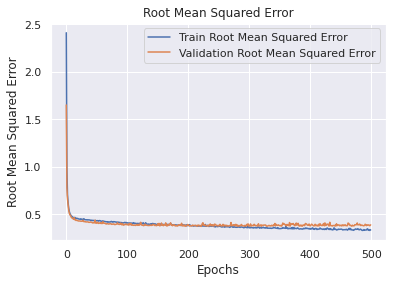

In [637]:
plt.figure(0)
plt.plot(history.history['root_mean_squared_error'], label = 'Train Root Mean Squared Error')
plt.plot(history.history['val_root_mean_squared_error'], label = 'Validation Root Mean Squared Error')
plt.title('Root Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show();

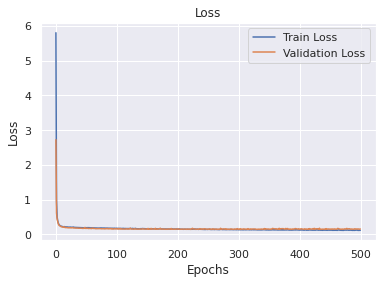

In [638]:
plt.figure(0)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

###### Evaluation

In [639]:
prediction_train = model_NN.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_NN.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.94311
Mean Squared Error: MSE = 0.12048
Root Mean Squared Error: RMSE = 0.34711
Mean Absolute Error: MAE = 0.22496
===============Test===============
R^2 score: r^2 = 0.9271
Mean Squared Error: MSE = 0.15184
Root Mean Squared Error: RMSE = 0.38967
Mean Absolute Error: MAE = 0.25396




```
===============Train===============
R^2 score: r^2 = 0.93397
Mean Squared Error: MSE = 0.13986
Root Mean Squared Error: RMSE = 0.37397
Mean Absolute Error: MAE = 0.24598
===============Test===============
R^2 score: r^2 = 0.91518
Mean Squared Error: MSE = 0.17667
Root Mean Squared Error: RMSE = 0.42033
Mean Absolute Error: MAE = 0.27128
```



#### Data áp dụng ANOVA đơn thuốc tính
loại bỏ thuộc tính PT08_S2_NMHC và AH

In [640]:
PATH = ''
data = pd.read_csv('/content/data_REMOVE.csv')
data.head()

,DATE_TIME,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,2004-10-03 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03 19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [641]:
X = data.iloc[:,[2,3,5,6,7,8,9,10,11]]
X.head()
Y = data.iloc[:,1]
Y[:5]

,PT08_S1_CO,C6H6_GT,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH
0,1360.0,11.9,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9
1,1292.0,9.4,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7
2,1402.0,9.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0
3,1376.0,9.2,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0
4,1272.0,6.5,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6


0    2.6
1    2.0
2    2.2
3    2.2
4    1.6
Name: CO_GT, dtype: float64

In [642]:
SScaler=StandardScaler()
X=SScaler.fit_transform(X)

In [643]:
from pandas.core.common import random_state
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [644]:
print('Training Data Size:',x_train.shape)
print('Test Data Size:',x_test.shape)

Training Data Size: (6139, 9)
Test Data Size: (1535, 9)


##### Linear Regression

###### Training

In [645]:
model_LR = LinearRegression()

In [646]:
model_LR.fit(x_train,y_train)

LinearRegression()

###### Evaluation

In [647]:
prediction_train = model_LR.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_LR.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.88628
Mean Squared Error: MSE = 0.24085
Root Mean Squared Error: RMSE = 0.49076
Mean Absolute Error: MAE = 0.30946
===============Test===============
R^2 score: r^2 = 0.88799
Mean Squared Error: MSE = 0.23331
Root Mean Squared Error: RMSE = 0.48302
Mean Absolute Error: MAE = 0.30905




```
===============Train===============
R^2 score: r^2 = 0.88628
Mean Squared Error: MSE = 0.24085
Root Mean Squared Error: RMSE = 0.49076
Mean Absolute Error: MAE = 0.30946
===============Test===============
R^2 score: r^2 = 0.88799
Mean Squared Error: MSE = 0.23331
Root Mean Squared Error: RMSE = 0.48302
Mean Absolute Error: MAE = 0.30905
```



##### Decision Tree Regression

###### Training

In [648]:
model_DT = DecisionTreeRegressor(max_depth=8)

In [649]:
model_DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8)

###### Evaluation

In [650]:
prediction_train = model_DT.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_DT.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.93542
Mean Squared Error: MSE = 0.13678
Root Mean Squared Error: RMSE = 0.36984
Mean Absolute Error: MAE = 0.24969
===============Test===============
R^2 score: r^2 = 0.89795
Mean Squared Error: MSE = 0.21256
Root Mean Squared Error: RMSE = 0.46104
Mean Absolute Error: MAE = 0.30169




```
===============Train===============
R^2 score: r^2 = 0.93542
Mean Squared Error: MSE = 0.13678
Root Mean Squared Error: RMSE = 0.36984
Mean Absolute Error: MAE = 0.24969
===============Test===============
R^2 score: r^2 = 0.89673
Mean Squared Error: MSE = 0.2151
Root Mean Squared Error: RMSE = 0.46379
Mean Absolute Error: MAE = 0.30298
```



##### Random Forest Regression

###### Training

In [651]:
model_RF = RandomForestRegressor(max_depth=20)

In [652]:
model_RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=20)

###### Evaluation

In [653]:
prediction_train = model_RF.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_RF.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.98721
Mean Squared Error: MSE = 0.02709
Root Mean Squared Error: RMSE = 0.1646
Mean Absolute Error: MAE = 0.10048
===============Test===============
R^2 score: r^2 = 0.92387
Mean Squared Error: MSE = 0.15858
Root Mean Squared Error: RMSE = 0.39822
Mean Absolute Error: MAE = 0.25035




```
===============Train===============
R^2 score: r^2 = 0.98736
Mean Squared Error: MSE = 0.02676
Root Mean Squared Error: RMSE = 0.16359
Mean Absolute Error: MAE = 0.10058
===============Test===============
R^2 score: r^2 = 0.92451
Mean Squared Error: MSE = 0.15723
Root Mean Squared Error: RMSE = 0.39652
Mean Absolute Error: MAE = 0.24848
```



##### Support Vector Machine

###### Training

In [654]:
model_SVM = SVR(gamma='auto', C=50.0)

In [655]:
model_SVM.fit(x_train,y_train)

SVR(C=50.0, gamma='auto')

###### Evaluation

In [656]:
prediction_train = model_SVM.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_SVM.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.94472
Mean Squared Error: MSE = 0.11707
Root Mean Squared Error: RMSE = 0.34216
Mean Absolute Error: MAE = 0.19684
===============Test===============
R^2 score: r^2 = 0.93109
Mean Squared Error: MSE = 0.14354
Root Mean Squared Error: RMSE = 0.37886
Mean Absolute Error: MAE = 0.22747




```
===============Train===============
R^2 score: r^2 = 0.94472
Mean Squared Error: MSE = 0.11707
Root Mean Squared Error: RMSE = 0.34216
Mean Absolute Error: MAE = 0.19684
===============Test===============
R^2 score: r^2 = 0.93109
Mean Squared Error: MSE = 0.14354
Root Mean Squared Error: RMSE = 0.37886
Mean Absolute Error: MAE = 0.22747
```



##### Neural Network

###### Training

In [657]:
input_shape = (9,)

In [658]:
from sklearn import metrics
model_NN = Sequential()
model_NN.add(Dense(128, input_shape=input_shape, kernel_initializer='normal', activation='relu'))
model_NN.add(Dense(64, kernel_initializer='normal', activation='relu'))
model_NN.add(Dense(8, kernel_initializer='normal', activation='relu'))
model_NN.add(Dense(1, kernel_initializer='normal', activation='linear'))

model_NN.summary()
model_NN.compile(loss='mean_squared_error', optimizer='adam', 
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 128)               1280      
                                                                 
 dense_85 (Dense)            (None, 64)                8256      
                                                                 
 dense_86 (Dense)            (None, 8)                 520       
                                                                 
 dense_87 (Dense)            (None, 1)                 9         
                                                                 
Total params: 10,065
Trainable params: 10,065
Non-trainable params: 0
_________________________________________________________________


In [659]:
history = model_NN.fit(x_train, y_train ,batch_size=128, 
                       epochs=500, validation_split=0.2)

Epoch 1/500
39/39 [==============================] - 1s 8ms/step - loss: 6.0737 - root_mean_squared_error: 2.4645 - val_loss: 3.6172 - val_root_mean_squared_error: 1.9019
Epoch 2/500
39/39 [==============================] - 0s 4ms/step - loss: 1.1991 - root_mean_squared_error: 1.0951 - val_loss: 0.6034 - val_root_mean_squared_error: 0.7768
Epoch 3/500
39/39 [==============================] - 0s 3ms/step - loss: 0.4848 - root_mean_squared_error: 0.6963 - val_loss: 0.4187 - val_root_mean_squared_error: 0.6471
Epoch 4/500
39/39 [==============================] - 0s 3ms/step - loss: 0.3786 - root_mean_squared_error: 0.6153 - val_loss: 0.3392 - val_root_mean_squared_error: 0.5824
Epoch 5/500
39/39 [==============================] - 0s 3ms/step - loss: 0.3197 - root_mean_squared_error: 0.5654 - val_loss: 0.2883 - val_root_mean_squared_error: 0.5370
Epoch 6/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2836 - root_mean_squared_error: 0.5325 - val_loss: 0.2577 - val_root_m

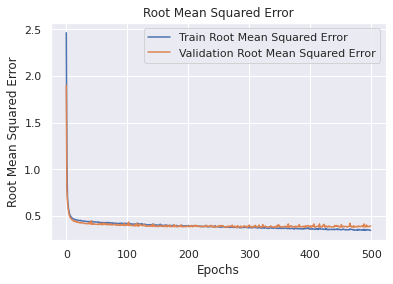

In [660]:
plt.figure(0)
plt.plot(history.history['root_mean_squared_error'], label = 'Train Root Mean Squared Error')
plt.plot(history.history['val_root_mean_squared_error'], label = 'Validation Root Mean Squared Error')
plt.title('Root Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show();

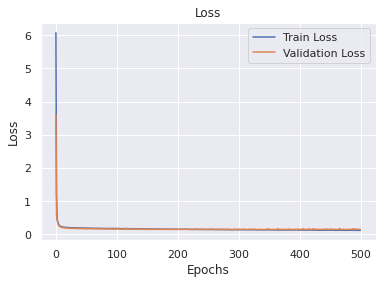

In [661]:
plt.figure(0)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

###### Evaluation

In [662]:
prediction_train = model_NN.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_NN.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.93858
Mean Squared Error: MSE = 0.13008
Root Mean Squared Error: RMSE = 0.36066
Mean Absolute Error: MAE = 0.23971
===============Test===============
R^2 score: r^2 = 0.9196
Mean Squared Error: MSE = 0.16747
Root Mean Squared Error: RMSE = 0.40923
Mean Absolute Error: MAE = 0.26951




```
===============Train===============
R^2 score: r^2 = 0.93577
Mean Squared Error: MSE = 0.13605
Root Mean Squared Error: RMSE = 0.36884
Mean Absolute Error: MAE = 0.24822
===============Test===============
R^2 score: r^2 = 0.92107
Mean Squared Error: MSE = 0.16441
Root Mean Squared Error: RMSE = 0.40547
Mean Absolute Error: MAE = 0.2682
```



#### Data áp dụng ANOVA tương tác 2 thuộc tính

```Call:
lm(formula = CO_GT ~ PT08_S1_CO + PT08_S2_NMHC + NO2_GT + PT08_S5_O3 + 
    I(PT08_S1_CO * C6H6_GT) + I(PT08_S1_CO * T) + I(C6H6_GT * 
    PT08_S2_NMHC) + I(C6H6_GT * NO2_GT) + I(C6H6_GT * PT08_S4_NO2) + 
    I(NOx_GT * PT08_S3_NOx) + I(NOx_GT * NO2_GT) + I(NOx_GT * 
    PT08_S5_O3) + I(PT08_S3_NOx * PT08_S5_O3) + I(NO2_GT * PT08_S4_NO2) + 
    I(NO2_GT * RH) + I(PT08_S4_NO2 * PT08_S5_O3), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9322 -0.1860  0.0164  0.1927  3.3733 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -8.659e-01  9.337e-02  -9.274  < 2e-16 ***
PT08_S1_CO                   1.086e-03  1.200e-04   9.052  < 2e-16 ***
PT08_S2_NMHC                 1.422e-03  9.773e-05  14.548  < 2e-16 ***
NO2_GT                      -1.044e-02  7.501e-04 -13.915  < 2e-16 ***
PT08_S5_O3                   1.219e-03  1.316e-04   9.258  < 2e-16 ***
I(PT08_S1_CO * C6H6_GT)      6.646e-05  7.413e-06   8.966  < 2e-16 ***
I(PT08_S1_CO * T)           -2.660e-05  1.321e-06 -20.141  < 2e-16 ***
I(C6H6_GT * PT08_S2_NMHC)   -6.240e-05  7.555e-06  -8.258  < 2e-16 ***
I(C6H6_GT * NO2_GT)         -2.301e-04  4.218e-05  -5.454 5.07e-08 ***
I(C6H6_GT * PT08_S4_NO2)     5.755e-05  5.374e-06  10.709  < 2e-16 ***
I(NOx_GT * PT08_S3_NOx)      2.138e-06  1.274e-07  16.790  < 2e-16 ***
I(NOx_GT * NO2_GT)           1.305e-05  6.845e-07  19.060  < 2e-16 ***
I(NOx_GT * PT08_S5_O3)      -8.011e-07  8.359e-08  -9.583  < 2e-16 ***
I(PT08_S3_NOx * PT08_S5_O3) -4.460e-07  5.941e-08  -7.507 6.75e-14 ***
I(NO2_GT * PT08_S4_NO2)      9.659e-06  7.074e-07  13.654  < 2e-16 ***
I(NO2_GT * RH)              -7.139e-05  4.708e-06 -15.163  < 2e-16 ***
I(PT08_S4_NO2 * PT08_S5_O3) -8.390e-07  8.095e-08 -10.364  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4592 on 7657 degrees of freedom
Multiple R-squared:  0.9004,	Adjusted R-squared:  0.9002 
F-statistic:  4325 on 16 and 7657 DF,  p-value: < 2.2e-16```




In [663]:
PATH = ''
data = pd.read_csv('/content/data_REMOVE.csv')
data.head()

,DATE_TIME,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,2004-10-03 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03 19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [664]:
X = data.iloc[:,[2,4,7,9]]
X['I(PT08_S1_CO * C6H6_GT)'] = data['PT08_S1_CO']*data['C6H6_GT']
X['I(PT08_S1_CO * T)'] = data['PT08_S1_CO']*data['T']
X['I(C6H6_GT * PT08_S2_NMHC)'] = data['C6H6_GT']*data['PT08_S2_NMHC']
X['I(C6H6_GT * NO2_GT)'] = data['C6H6_GT']*data['NO2_GT']
X['I(C6H6_GT * PT08_S4_NO2)'] = data['C6H6_GT']*data['PT08_S4_NO2']
X['I(NOx_GT * PT08_S3_NOx)'] = data['NOx_GT']*data['PT08_S3_NOx']
X['I(NOx_GT * NO2_GT)'] = data['NOx_GT']*data['NO2_GT']
X['I(NOx_GT * PT08_S5_O3)'] = data['NOx_GT']*data['PT08_S5_O3']
X['I(PT08_S3_NOx * PT08_S5_O3)'] = data['PT08_S3_NOx']*data['PT08_S5_O3']
X['I(NO2_GT * PT08_S4_NO2)'] = data['NO2_GT']*data['PT08_S4_NO2']
X['I(NO2_GT * RH)'] = data['NO2_GT']*data['RH']
X['I(PT08_S4_NO2 * PT08_S5_O3)'] = data['PT08_S4_NO2']*data['PT08_S5_O3']
X.head()
Y = data.iloc[:,1]
Y[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,PT08_S1_CO,PT08_S2_NMHC,NO2_GT,PT08_S5_O3,I(PT08_S1_CO * C6H6_GT),I(PT08_S1_CO * T),I(C6H6_GT * PT08_S2_NMHC),I(C6H6_GT * NO2_GT),I(C6H6_GT * PT08_S4_NO2),I(NOx_GT * PT08_S3_NOx),I(NOx_GT * NO2_GT),I(NOx_GT * PT08_S5_O3),I(PT08_S3_NOx * PT08_S5_O3),I(NO2_GT * PT08_S4_NO2),I(NO2_GT * RH),I(PT08_S4_NO2 * PT08_S5_O3)
0,1360.0,1046.0,113.0,1268.0,16184.0,18496.0,12447.4,1344.7,20134.8,175296.0,18758.0,210488.0,1339008.0,191196.0,5525.7,2145456.0
1,1292.0,955.0,92.0,972.0,12144.8,17183.6,8977.0,864.8,14654.6,120922.0,9476.0,100116.0,1141128.0,143428.0,4388.4,1515348.0
2,1402.0,939.0,114.0,1074.0,12618.0,16683.8,8451.0,1026.0,13995.0,149340.0,14934.0,140694.0,1224360.0,177270.0,6156.0,1670070.0
3,1376.0,948.0,122.0,1203.0,12659.2,15136.0,8721.6,1122.4,14572.8,187824.0,20984.0,206916.0,1313676.0,193248.0,7320.0,1905552.0
4,1272.0,836.0,116.0,1110.0,8268.0,14246.4,5434.0,754.0,9685.0,157855.0,15196.0,145410.0,1337550.0,172840.0,6913.6,1653900.0


0    2.6
1    2.0
2    2.2
3    2.2
4    1.6
Name: CO_GT, dtype: float64

In [665]:
SScaler=StandardScaler()
X=SScaler.fit_transform(X)

In [666]:
from pandas.core.common import random_state
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [667]:
print('Training Data Size:',x_train.shape)
print('Test Data Size:',x_test.shape)

Training Data Size: (6139, 16)
Test Data Size: (1535, 16)


##### Linear Regression

###### Training

In [668]:
model_LR = LinearRegression()

In [669]:
model_LR.fit(x_train,y_train)

LinearRegression()

###### Evaluation

In [670]:
prediction_train = model_LR.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_LR.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.89939
Mean Squared Error: MSE = 0.21309
Root Mean Squared Error: RMSE = 0.46161
Mean Absolute Error: MAE = 0.29717
===============Test===============
R^2 score: r^2 = 0.90357
Mean Squared Error: MSE = 0.20086
Root Mean Squared Error: RMSE = 0.44817
Mean Absolute Error: MAE = 0.29289




```
===============Train===============
R^2 score: r^2 = 0.89939
Mean Squared Error: MSE = 0.21309
Root Mean Squared Error: RMSE = 0.46161
Mean Absolute Error: MAE = 0.29717
===============Test===============
R^2 score: r^2 = 0.90357
Mean Squared Error: MSE = 0.20086
Root Mean Squared Error: RMSE = 0.44817
Mean Absolute Error: MAE = 0.29289
```



##### Decision Tree Regression

###### Training

In [671]:
model_DT = DecisionTreeRegressor(max_depth=8)

In [672]:
model_DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8)

###### Evaluation

In [673]:
prediction_train = model_DT.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_DT.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.9369
Mean Squared Error: MSE = 0.13364
Root Mean Squared Error: RMSE = 0.36557
Mean Absolute Error: MAE = 0.24832
===============Test===============
R^2 score: r^2 = 0.89566
Mean Squared Error: MSE = 0.21733
Root Mean Squared Error: RMSE = 0.46619
Mean Absolute Error: MAE = 0.30451




```
===============Train===============
R^2 score: r^2 = 0.9369
Mean Squared Error: MSE = 0.13364
Root Mean Squared Error: RMSE = 0.36557
Mean Absolute Error: MAE = 0.24832
===============Test===============
R^2 score: r^2 = 0.89556
Mean Squared Error: MSE = 0.21754
Root Mean Squared Error: RMSE = 0.46641
Mean Absolute Error: MAE = 0.30436
```



##### Random Forest Regression

###### Training

In [674]:
model_RF = RandomForestRegressor(max_depth=20)

In [675]:
model_RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=20)

###### Evaluation

In [676]:
prediction_train = model_RF.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_RF.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.98693
Mean Squared Error: MSE = 0.02769
Root Mean Squared Error: RMSE = 0.16639
Mean Absolute Error: MAE = 0.10224
===============Test===============
R^2 score: r^2 = 0.91913
Mean Squared Error: MSE = 0.16845
Root Mean Squared Error: RMSE = 0.41043
Mean Absolute Error: MAE = 0.25713




```
===============Train===============
R^2 score: r^2 = 0.98693
Mean Squared Error: MSE = 0.02768
Root Mean Squared Error: RMSE = 0.16637
Mean Absolute Error: MAE = 0.10264
===============Test===============
R^2 score: r^2 = 0.91926
Mean Squared Error: MSE = 0.16816
Root Mean Squared Error: RMSE = 0.41008
Mean Absolute Error: MAE = 0.25772
```



##### Support Vector Machine

###### Training

In [677]:
model_SVM = SVR(gamma='auto', C=50.0)

In [678]:
model_SVM.fit(x_train,y_train)

SVR(C=50.0, gamma='auto')

###### Evaluation

In [679]:
prediction_train = model_SVM.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_SVM.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.94531
Mean Squared Error: MSE = 0.11583
Root Mean Squared Error: RMSE = 0.34034
Mean Absolute Error: MAE = 0.20027
===============Test===============
R^2 score: r^2 = 0.92707
Mean Squared Error: MSE = 0.1519
Root Mean Squared Error: RMSE = 0.38974
Mean Absolute Error: MAE = 0.23788




```
===============Train===============
R^2 score: r^2 = 0.94531
Mean Squared Error: MSE = 0.11583
Root Mean Squared Error: RMSE = 0.34034
Mean Absolute Error: MAE = 0.20027
===============Test===============
R^2 score: r^2 = 0.92707
Mean Squared Error: MSE = 0.1519
Root Mean Squared Error: RMSE = 0.38974
Mean Absolute Error: MAE = 0.23788
```



##### Neural Network

###### Training

In [680]:
input_shape = (16,)

In [681]:
from sklearn import metrics
model_NN = Sequential()
model_NN.add(Dense(128, input_shape=input_shape, kernel_initializer='normal', activation='relu'))
model_NN.add(Dense(64, kernel_initializer='normal', activation='relu'))
model_NN.add(Dense(8, kernel_initializer='normal', activation='relu'))
model_NN.add(Dense(1, kernel_initializer='normal', activation='linear'))

model_NN.summary()
model_NN.compile(loss='mean_squared_error', optimizer='adam', 
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 128)               2176      
                                                                 
 dense_89 (Dense)            (None, 64)                8256      
                                                                 
 dense_90 (Dense)            (None, 8)                 520       
                                                                 
 dense_91 (Dense)            (None, 1)                 9         
                                                                 
Total params: 10,961
Trainable params: 10,961
Non-trainable params: 0
_________________________________________________________________


In [682]:
history = model_NN.fit(x_train, y_train ,batch_size=128, 
                       epochs=500, validation_split=0.2)

Epoch 1/500
39/39 [==============================] - 1s 7ms/step - loss: 5.7831 - root_mean_squared_error: 2.4048 - val_loss: 2.8344 - val_root_mean_squared_error: 1.6836
Epoch 2/500
39/39 [==============================] - 0s 4ms/step - loss: 1.3673 - root_mean_squared_error: 1.1693 - val_loss: 0.8572 - val_root_mean_squared_error: 0.9259
Epoch 3/500
39/39 [==============================] - 0s 4ms/step - loss: 0.6656 - root_mean_squared_error: 0.8158 - val_loss: 0.4686 - val_root_mean_squared_error: 0.6845
Epoch 4/500
39/39 [==============================] - 0s 4ms/step - loss: 0.4128 - root_mean_squared_error: 0.6425 - val_loss: 0.3103 - val_root_mean_squared_error: 0.5570
Epoch 5/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2986 - root_mean_squared_error: 0.5464 - val_loss: 0.2444 - val_root_mean_squared_error: 0.4944
Epoch 6/500
39/39 [==============================] - 0s 4ms/step - loss: 0.2496 - root_mean_squared_error: 0.4996 - val_loss: 0.2251 - val_root_m

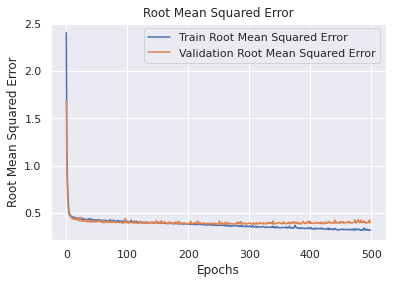

In [683]:
plt.figure(0)
plt.plot(history.history['root_mean_squared_error'], label = 'Train Root Mean Squared Error')
plt.plot(history.history['val_root_mean_squared_error'], label = 'Validation Root Mean Squared Error')
plt.title('Root Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show();

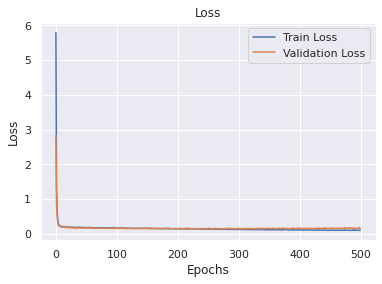

In [684]:
plt.figure(0)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

###### Evaluation

In [685]:
prediction_train = model_NN.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_NN.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.94932
Mean Squared Error: MSE = 0.10735
Root Mean Squared Error: RMSE = 0.32764
Mean Absolute Error: MAE = 0.2201
===============Test===============
R^2 score: r^2 = 0.92256
Mean Squared Error: MSE = 0.1613
Root Mean Squared Error: RMSE = 0.40163
Mean Absolute Error: MAE = 0.27024




```
===============Train===============
R^2 score: r^2 = 0.94801
Mean Squared Error: MSE = 0.11011
Root Mean Squared Error: RMSE = 0.33182
Mean Absolute Error: MAE = 0.22106
===============Test===============
R^2 score: r^2 = 0.9262
Mean Squared Error: MSE = 0.15372
Root Mean Squared Error: RMSE = 0.39207
Mean Absolute Error: MAE = 0.25817
```



### MEAN

#### Data chưa áp dụng ANOVA & Data áp dụng ANOVA đơn thuốc tính
Vì ANOVA đơn thuộc tính không loại bỏ được thuộc tính nào, nên giống hệt như data ban đầu.

In [686]:
PATH = ''
data = pd.read_csv('/content/data_MEAN.csv')
data.head()

,DATE_TIME,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,2004-10-03 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03 19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [687]:
X = data.iloc[:,2:]
X.head()
Y = data.iloc[:,1]
Y[:5]

,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


0    2.6
1    2.0
2    2.2
3    2.2
4    1.6
Name: CO_GT, dtype: float64

In [688]:
SScaler=StandardScaler()
X=SScaler.fit_transform(X)

In [689]:
from pandas.core.common import random_state
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [690]:
print('Training Data Size:',x_train.shape)
print('Test Data Size:',x_test.shape)

Training Data Size: (7485, 11)
Test Data Size: (1872, 11)


##### Linear Regression

###### Training

In [691]:
model_LR = LinearRegression()

In [692]:
model_LR.fit(x_train,y_train)

LinearRegression()

###### Evaluation

In [693]:
prediction_train = model_LR.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_LR.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.79211
Mean Squared Error: MSE = 0.35354
Root Mean Squared Error: RMSE = 0.59459
Mean Absolute Error: MAE = 0.40252
===============Test===============
R^2 score: r^2 = 0.81358
Mean Squared Error: MSE = 0.34611
Root Mean Squared Error: RMSE = 0.58831
Mean Absolute Error: MAE = 0.39639




```
===============Train===============
R^2 score: r^2 = 0.79211
Mean Squared Error: MSE = 0.35354
Root Mean Squared Error: RMSE = 0.59459
Mean Absolute Error: MAE = 0.40252
===============Test===============
R^2 score: r^2 = 0.81358
Mean Squared Error: MSE = 0.34611
Root Mean Squared Error: RMSE = 0.58831
Mean Absolute Error: MAE = 0.39639
```



##### Decision Tree Regression

###### Training

In [694]:
model_DT = DecisionTreeRegressor(max_depth=8)

In [695]:
model_DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8)

###### Evaluation

In [696]:
prediction_train = model_DT.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_DT.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.88505
Mean Squared Error: MSE = 0.19549
Root Mean Squared Error: RMSE = 0.44214
Mean Absolute Error: MAE = 0.30933
===============Test===============
R^2 score: r^2 = 0.81998
Mean Squared Error: MSE = 0.33422
Root Mean Squared Error: RMSE = 0.57812
Mean Absolute Error: MAE = 0.38084




```
===============Train===============
R^2 score: r^2 = 0.88505
Mean Squared Error: MSE = 0.19549
Root Mean Squared Error: RMSE = 0.44214
Mean Absolute Error: MAE = 0.30933
===============Test===============
R^2 score: r^2 = 0.81978
Mean Squared Error: MSE = 0.33459
Root Mean Squared Error: RMSE = 0.57844
Mean Absolute Error: MAE = 0.38119
```



##### Random Forest Regression

###### Training

In [697]:
model_RF = RandomForestRegressor(max_depth=20)

In [698]:
model_RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=20)

###### Evaluation

In [699]:
prediction_train = model_RF.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_RF.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.97721
Mean Squared Error: MSE = 0.03876
Root Mean Squared Error: RMSE = 0.19688
Mean Absolute Error: MAE = 0.12622
===============Test===============
R^2 score: r^2 = 0.87526
Mean Squared Error: MSE = 0.23159
Root Mean Squared Error: RMSE = 0.48124
Mean Absolute Error: MAE = 0.31239




```
===============Train===============
R^2 score: r^2 = 0.97752
Mean Squared Error: MSE = 0.03823
Root Mean Squared Error: RMSE = 0.19553
Mean Absolute Error: MAE = 0.12656
===============Test===============
R^2 score: r^2 = 0.87411
Mean Squared Error: MSE = 0.23373
Root Mean Squared Error: RMSE = 0.48346
Mean Absolute Error: MAE = 0.31484
```



##### Support Vector Machine

###### Training

In [700]:
model_SVM = SVR(gamma='auto', C=50.0)

In [701]:
model_SVM.fit(x_train,y_train)

SVR(C=50.0, gamma='auto')

###### Evaluation

In [702]:
prediction_train = model_SVM.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_SVM.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.88199
Mean Squared Error: MSE = 0.2007
Root Mean Squared Error: RMSE = 0.44799
Mean Absolute Error: MAE = 0.26236
===============Test===============
R^2 score: r^2 = 0.8641
Mean Squared Error: MSE = 0.25232
Root Mean Squared Error: RMSE = 0.50231
Mean Absolute Error: MAE = 0.29971




```
===============Train===============
R^2 score: r^2 = 0.88199
Mean Squared Error: MSE = 0.2007
Root Mean Squared Error: RMSE = 0.44799
Mean Absolute Error: MAE = 0.26236
===============Test===============
R^2 score: r^2 = 0.8641
Mean Squared Error: MSE = 0.25232
Root Mean Squared Error: RMSE = 0.50231
Mean Absolute Error: MAE = 0.29971
```



##### Neural Network

###### Training

In [703]:
input_shape = (11,)

In [704]:
from sklearn import metrics
model_NN = Sequential()
model_NN.add(Dense(128, input_shape=input_shape, kernel_initializer='normal', activation='relu'))
model_NN.add(Dense(64, kernel_initializer='normal', activation='relu'))
model_NN.add(Dense(8, kernel_initializer='normal', activation='relu'))
model_NN.add(Dense(1, kernel_initializer='normal', activation='linear'))

model_NN.summary()
model_NN.compile(loss='mean_squared_error', optimizer='adam', 
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 128)               1536      
                                                                 
 dense_93 (Dense)            (None, 64)                8256      
                                                                 
 dense_94 (Dense)            (None, 8)                 520       
                                                                 
 dense_95 (Dense)            (None, 1)                 9         
                                                                 
Total params: 10,321
Trainable params: 10,321
Non-trainable params: 0
_________________________________________________________________


In [705]:
history = model_NN.fit(x_train, y_train ,batch_size=128, 
                       epochs=500, validation_split=0.2)

Epoch 1/500
47/47 [==============================] - 1s 7ms/step - loss: 4.9607 - root_mean_squared_error: 2.2273 - val_loss: 0.9708 - val_root_mean_squared_error: 0.9853
Epoch 2/500
47/47 [==============================] - 0s 3ms/step - loss: 0.7967 - root_mean_squared_error: 0.8926 - val_loss: 0.5669 - val_root_mean_squared_error: 0.7529
Epoch 3/500
47/47 [==============================] - 0s 3ms/step - loss: 0.5408 - root_mean_squared_error: 0.7354 - val_loss: 0.4481 - val_root_mean_squared_error: 0.6694
Epoch 4/500
47/47 [==============================] - 0s 4ms/step - loss: 0.4380 - root_mean_squared_error: 0.6618 - val_loss: 0.3866 - val_root_mean_squared_error: 0.6218
Epoch 5/500
47/47 [==============================] - 0s 4ms/step - loss: 0.3863 - root_mean_squared_error: 0.6215 - val_loss: 0.3625 - val_root_mean_squared_error: 0.6021
Epoch 6/500
47/47 [==============================] - 0s 4ms/step - loss: 0.3658 - root_mean_squared_error: 0.6048 - val_loss: 0.3556 - val_root_m

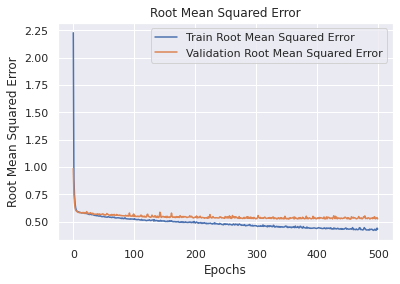

In [706]:
plt.figure(0)
plt.plot(history.history['root_mean_squared_error'], label = 'Train Root Mean Squared Error')
plt.plot(history.history['val_root_mean_squared_error'], label = 'Validation Root Mean Squared Error')
plt.title('Root Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show();

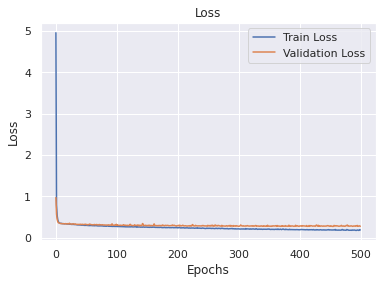

In [707]:
plt.figure(0)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

###### Evaluation

In [708]:
prediction_train = model_NN.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_NN.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.88991
Mean Squared Error: MSE = 0.18722
Root Mean Squared Error: RMSE = 0.43269
Mean Absolute Error: MAE = 0.2951
===============Test===============
R^2 score: r^2 = 0.86769
Mean Squared Error: MSE = 0.24564
Root Mean Squared Error: RMSE = 0.49563
Mean Absolute Error: MAE = 0.32893




```
===============Train===============
R^2 score: r^2 = 0.88933
Mean Squared Error: MSE = 0.18821
Root Mean Squared Error: RMSE = 0.43383
Mean Absolute Error: MAE = 0.29722
===============Test===============
R^2 score: r^2 = 0.87188
Mean Squared Error: MSE = 0.23786
Root Mean Squared Error: RMSE = 0.48771
Mean Absolute Error: MAE = 0.33146
```



#### Data áp dụng ANOVA tương tác 2 thuộc tính

```Call:
Call:
lm(formula = CO_GT ~ PT08_S1_CO + C6H6_GT + PT08_S2_NMHC + NOx_GT + 
    PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + RH + I(PT08_S1_CO * 
    C6H6_GT) + I(PT08_S1_CO * PT08_S2_NMHC) + I(PT08_S1_CO * 
    PT08_S3_NOx) + I(PT08_S1_CO * NO2_GT) + I(PT08_S1_CO * PT08_S4_NO2) + 
    I(PT08_S1_CO * RH) + I(PT08_S1_CO * AH) + I(C6H6_GT * PT08_S2_NMHC) + 
    I(C6H6_GT * NOx_GT) + I(C6H6_GT * NO2_GT) + I(C6H6_GT * RH) + 
    I(PT08_S2_NMHC * NOx_GT) + I(PT08_S2_NMHC * NO2_GT) + I(NOx_GT * 
    PT08_S4_NO2) + I(PT08_S3_NOx * RH) + I(PT08_S4_NO2 * AH) + 
    I(PT08_S5_O3 * T), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4324 -0.2553 -0.0186  0.2422  3.8854 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   9.623e+00  8.597e-01  11.194  < 2e-16 ***
PT08_S1_CO                   -7.288e-03  9.140e-04  -7.973 1.73e-15 ***
C6H6_GT                       3.752e-01  3.390e-02  11.070  < 2e-16 ***
PT08_S2_NMHC                 -8.954e-03  9.237e-04  -9.694  < 2e-16 ***
NOx_GT                        1.034e-02  8.881e-04  11.649  < 2e-16 ***
PT08_S3_NOx                  -2.574e-03  2.756e-04  -9.339  < 2e-16 ***
NO2_GT                       -2.486e-02  3.150e-03  -7.891 3.33e-15 ***
PT08_S4_NO2                  -6.689e-04  2.089e-04  -3.201 0.001372 ** 
PT08_S5_O3                    2.543e-04  6.751e-05   3.767 0.000166 ***
RH                           -3.138e-02  5.013e-03  -6.260 4.01e-10 ***
I(PT08_S1_CO * C6H6_GT)      -1.200e-04  2.935e-05  -4.088 4.38e-05 ***
I(PT08_S1_CO * PT08_S2_NMHC)  7.277e-06  9.870e-07   7.372 1.82e-13 ***
I(PT08_S1_CO * PT08_S3_NOx)   2.029e-06  2.517e-07   8.063 8.39e-16 ***
I(PT08_S1_CO * NO2_GT)       -1.216e-05  2.148e-06  -5.663 1.53e-08 ***
I(PT08_S1_CO * PT08_S4_NO2)   7.233e-07  2.299e-07   3.146 0.001663 ** 
I(PT08_S1_CO * RH)            2.166e-05  4.061e-06   5.334 9.81e-08 ***
I(PT08_S1_CO * AH)           -3.336e-04  1.542e-04  -2.163 0.030552 *  
I(C6H6_GT * PT08_S2_NMHC)    -1.243e-04  1.333e-05  -9.327  < 2e-16 ***
I(C6H6_GT * NOx_GT)           4.390e-04  3.670e-05  11.962  < 2e-16 ***
I(C6H6_GT * NO2_GT)          -8.913e-04  1.599e-04  -5.574 2.57e-08 ***
I(C6H6_GT * RH)              -9.316e-04  1.325e-04  -7.033 2.16e-12 ***
I(PT08_S2_NMHC * NOx_GT)     -1.836e-05  1.231e-06 -14.915  < 2e-16 ***
I(PT08_S2_NMHC * NO2_GT)      5.127e-05  4.890e-06  10.485  < 2e-16 ***
I(NOx_GT * PT08_S4_NO2)       4.343e-06  2.726e-07  15.930  < 2e-16 ***
I(PT08_S3_NOx * RH)           1.015e-05  2.294e-06   4.426 9.69e-06 ***
I(PT08_S4_NO2 * AH)           2.375e-04  9.172e-05   2.589 0.009645 ** 
I(PT08_S5_O3 * T)            -2.976e-05  2.936e-06 -10.138  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5607 on 9330 degrees of freedom
Multiple R-squared:  0.819,	Adjusted R-squared:  0.8185 
F-statistic:  1624 on 26 and 9330 DF,  p-value: < 2.2e-16```




In [709]:
PATH = ''
data = pd.read_csv('/content/data_MEAN.csv')
data.head()

,DATE_TIME,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,2004-10-03 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03 19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [710]:
X = data.iloc[:,[2,3,4,5,6,7,8,9,11]]
X['I(PT08_S1_CO * C6H6_GT)'] = data['PT08_S1_CO']*data['C6H6_GT']
X['I(PT08_S1_CO * PT08_S2_NMHC)'] = data['PT08_S1_CO']*data['PT08_S2_NMHC']
X['I(PT08_S1_CO * PT08_S3_NOx)'] = data['PT08_S1_CO']*data['PT08_S3_NOx']
X['I(PT08_S1_CO * NO2_GT)'] = data['PT08_S1_CO']*data['NO2_GT']
X['I(PT08_S1_CO * PT08_S4_NO2)'] = data['PT08_S1_CO']*data['PT08_S4_NO2']
X['I(PT08_S1_CO * RH)'] = data['PT08_S1_CO']*data['RH']
X['I(PT08_S1_CO * AH)'] = data['PT08_S1_CO']*data['AH']
X['I(C6H6_GT * PT08_S2_NMHC)'] = data['C6H6_GT']*data['PT08_S2_NMHC']
X['I(C6H6_GT * NOx_GT)'] = data['C6H6_GT']*data['NOx_GT']
X['I(C6H6_GT * NO2_GT)'] = data['C6H6_GT']*data['NO2_GT']
X['I(C6H6_GT * RH)'] = data['C6H6_GT']*data['RH']
X['I(PT08_S2_NMHC * NOx_GT)'] = data['PT08_S2_NMHC']*data['NOx_GT']
X['I(PT08_S2_NMHC * NO2_GT)'] = data['PT08_S2_NMHC']*data['NO2_GT']
X['I(NOx_GT * PT08_S4_NO2)'] = data['NOx_GT']*data['PT08_S4_NO2']
X['I(PT08_S3_NOx * RH)'] = data['PT08_S3_NOx']*data['RH']
X['I(PT08_S4_NO2 * AH)'] = data['PT08_S4_NO2']*data['AH']
X['I(PT08_S5_O3 * T)'] = data['PT08_S5_O3']*data['T']
X.head()
Y = data.iloc[:,1]
Y[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,RH,I(PT08_S1_CO * C6H6_GT),I(PT08_S1_CO * PT08_S2_NMHC),I(PT08_S1_CO * PT08_S3_NOx),I(PT08_S1_CO * NO2_GT),I(PT08_S1_CO * PT08_S4_NO2),I(PT08_S1_CO * RH),I(PT08_S1_CO * AH),I(C6H6_GT * PT08_S2_NMHC),I(C6H6_GT * NOx_GT),I(C6H6_GT * NO2_GT),I(C6H6_GT * RH),I(PT08_S2_NMHC * NOx_GT),I(PT08_S2_NMHC * NO2_GT),I(NOx_GT * PT08_S4_NO2),I(PT08_S3_NOx * RH),I(PT08_S4_NO2 * AH),I(PT08_S5_O3 * T)
0,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,16184.0,1422560.0,1436160.0,153680.0,2301120.0,66504.0,1030.6080,12447.4,1975.4,1344.7,581.91,173636.0,118198.0,280872.0,51638.4,1282.1976,17244.8
1,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,12144.8,1233860.0,1516808.0,118864.0,2014228.0,61628.4,937.3460,8977.0,968.2,864.8,448.38,98365.0,87860.0,160577.0,55999.8,1131.0545,12927.6
2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,12618.0,1316478.0,1598280.0,159828.0,2180110.0,75708.0,1051.7804,8451.0,1179.0,1026.0,486.00,123009.0,107046.0,203705.0,61560.0,1166.5610,12780.6
3,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,12659.2,1304448.0,1502592.0,167872.0,2179584.0,82560.0,1082.4992,8721.6,1582.4,1122.4,552.00,163056.0,115656.0,272448.0,65520.0,1246.1328,13233.0
4,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,8268.0,1063392.0,1532760.0,147552.0,1895280.0,75811.2,1003.3536,5434.0,851.5,754.0,387.40,109516.0,96976.0,195190.0,71818.0,1175.3120,12432.0


0    2.6
1    2.0
2    2.2
3    2.2
4    1.6
Name: CO_GT, dtype: float64

In [711]:
SScaler=StandardScaler()
X=SScaler.fit_transform(X)

In [712]:
from pandas.core.common import random_state
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [713]:
print('Training Data Size:',x_train.shape)
print('Test Data Size:',x_test.shape)

Training Data Size: (7485, 26)
Test Data Size: (1872, 26)


##### Linear Regression

###### Training

In [714]:
model_LR = LinearRegression()

In [715]:
model_LR.fit(x_train,y_train)

LinearRegression()

###### Evaluation

In [716]:
prediction_train = model_LR.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_LR.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.81387
Mean Squared Error: MSE = 0.31654
Root Mean Squared Error: RMSE = 0.56262
Mean Absolute Error: MAE = 0.38597
===============Test===============
R^2 score: r^2 = 0.83641
Mean Squared Error: MSE = 0.30371
Root Mean Squared Error: RMSE = 0.5511
Mean Absolute Error: MAE = 0.37745




```
===============Train===============
R^2 score: r^2 = 0.81387
Mean Squared Error: MSE = 0.31654
Root Mean Squared Error: RMSE = 0.56262
Mean Absolute Error: MAE = 0.38597
===============Test===============
R^2 score: r^2 = 0.83641
Mean Squared Error: MSE = 0.30371
Root Mean Squared Error: RMSE = 0.5511
Mean Absolute Error: MAE = 0.37745
```



##### Decision Tree Regression

###### Training

In [717]:
model_DT = DecisionTreeRegressor(max_depth=8)

In [718]:
model_DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8)

###### Evaluation

In [719]:
prediction_train = model_DT.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_DT.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.88438
Mean Squared Error: MSE = 0.19663
Root Mean Squared Error: RMSE = 0.44343
Mean Absolute Error: MAE = 0.30407
===============Test===============
R^2 score: r^2 = 0.80884
Mean Squared Error: MSE = 0.3549
Root Mean Squared Error: RMSE = 0.59573
Mean Absolute Error: MAE = 0.37899




```
===============Train===============
R^2 score: r^2 = 0.88438
Mean Squared Error: MSE = 0.19663
Root Mean Squared Error: RMSE = 0.44343
Mean Absolute Error: MAE = 0.30407
===============Test===============
R^2 score: r^2 = 0.80553
Mean Squared Error: MSE = 0.36105
Root Mean Squared Error: RMSE = 0.60088
Mean Absolute Error: MAE = 0.37911
```



##### Random Forest Regression

###### Training

In [720]:
model_RF = RandomForestRegressor(max_depth=20)

In [721]:
model_RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=20)

###### Evaluation

In [722]:
prediction_train = model_RF.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_RF.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.97669
Mean Squared Error: MSE = 0.03964
Root Mean Squared Error: RMSE = 0.19909
Mean Absolute Error: MAE = 0.1296
===============Test===============
R^2 score: r^2 = 0.87045
Mean Squared Error: MSE = 0.24052
Root Mean Squared Error: RMSE = 0.49043
Mean Absolute Error: MAE = 0.31807




```
===============Train===============
R^2 score: r^2 = 0.97652
Mean Squared Error: MSE = 0.03993
Root Mean Squared Error: RMSE = 0.19983
Mean Absolute Error: MAE = 0.13057
===============Test===============
R^2 score: r^2 = 0.86997
Mean Squared Error: MSE = 0.24142
Root Mean Squared Error: RMSE = 0.49134
Mean Absolute Error: MAE = 0.31751
```



##### Support Vector Machine

###### Training

In [723]:
model_SVM = SVR(gamma='auto', C=50.0)

In [724]:
model_SVM.fit(x_train,y_train)

SVR(C=50.0, gamma='auto')

###### Evaluation

In [725]:
prediction_train = model_SVM.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_SVM.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.88101
Mean Squared Error: MSE = 0.20235
Root Mean Squared Error: RMSE = 0.44984
Mean Absolute Error: MAE = 0.26608
===============Test===============
R^2 score: r^2 = 0.86035
Mean Squared Error: MSE = 0.25927
Root Mean Squared Error: RMSE = 0.50919
Mean Absolute Error: MAE = 0.30601




```
===============Train===============
R^2 score: r^2 = 0.88101
Mean Squared Error: MSE = 0.20235
Root Mean Squared Error: RMSE = 0.44984
Mean Absolute Error: MAE = 0.26608
===============Test===============
R^2 score: r^2 = 0.86035
Mean Squared Error: MSE = 0.25927
Root Mean Squared Error: RMSE = 0.50919
Mean Absolute Error: MAE = 0.30601
```



##### Neural Network

###### Training

In [726]:
input_shape = (26,)

In [727]:
from sklearn import metrics
model_NN = Sequential()
model_NN.add(Dense(128, input_shape=input_shape, kernel_initializer='normal', activation='relu'))
model_NN.add(Dense(64, kernel_initializer='normal', activation='relu'))
model_NN.add(Dense(8, kernel_initializer='normal', activation='relu'))
model_NN.add(Dense(1, kernel_initializer='normal', activation='linear'))

model_NN.summary()
model_NN.compile(loss='mean_squared_error', optimizer='adam', 
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 128)               3456      
                                                                 
 dense_97 (Dense)            (None, 64)                8256      
                                                                 
 dense_98 (Dense)            (None, 8)                 520       
                                                                 
 dense_99 (Dense)            (None, 1)                 9         
                                                                 
Total params: 12,241
Trainable params: 12,241
Non-trainable params: 0
_________________________________________________________________


In [728]:
history = model_NN.fit(x_train, y_train ,batch_size=128, 
                       epochs=500, validation_split=0.2)

Epoch 1/500
47/47 [==============================] - 1s 6ms/step - loss: 5.5340 - root_mean_squared_error: 2.3525 - val_loss: 2.4134 - val_root_mean_squared_error: 1.5535
Epoch 2/500
47/47 [==============================] - 0s 4ms/step - loss: 1.4139 - root_mean_squared_error: 1.1891 - val_loss: 0.8946 - val_root_mean_squared_error: 0.9458
Epoch 3/500
47/47 [==============================] - 0s 4ms/step - loss: 0.7180 - root_mean_squared_error: 0.8473 - val_loss: 0.5248 - val_root_mean_squared_error: 0.7244
Epoch 4/500
47/47 [==============================] - 0s 4ms/step - loss: 0.5099 - root_mean_squared_error: 0.7141 - val_loss: 0.4274 - val_root_mean_squared_error: 0.6538
Epoch 5/500
47/47 [==============================] - 0s 4ms/step - loss: 0.4149 - root_mean_squared_error: 0.6441 - val_loss: 0.3799 - val_root_mean_squared_error: 0.6164
Epoch 6/500
47/47 [==============================] - 0s 3ms/step - loss: 0.3683 - root_mean_squared_error: 0.6069 - val_loss: 0.3586 - val_root_m

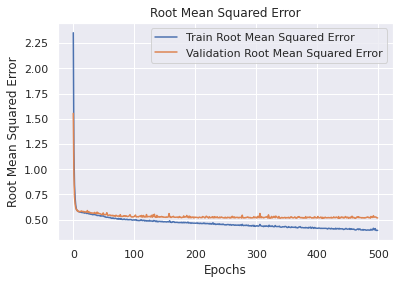

In [729]:
plt.figure(0)
plt.plot(history.history['root_mean_squared_error'], label = 'Train Root Mean Squared Error')
plt.plot(history.history['val_root_mean_squared_error'], label = 'Validation Root Mean Squared Error')
plt.title('Root Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show();

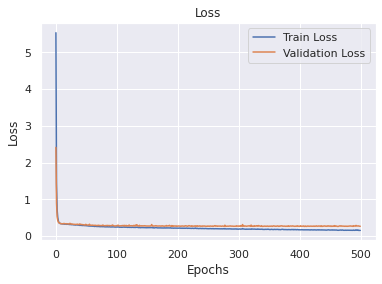

In [730]:
plt.figure(0)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

###### Evaluation

In [731]:
prediction_train = model_NN.predict(x_train)

r2 = round(r2_score(y_train, prediction_train),5)
MSE = round(mean_squared_error(y_train, prediction_train),5)
RMSE = round(mean_squared_error(y_train, prediction_train, squared=False),5)
MAE = round(mean_absolute_error(y_train, prediction_train),5)

print('='*15+'Train'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

prediction_test = model_NN.predict(x_test)

r2 = round(r2_score(y_test, prediction_test),5)
MSE = round(mean_squared_error(y_test, prediction_test),5)
RMSE = round(mean_squared_error(y_test, prediction_test, squared=False),5)
MAE = round(mean_absolute_error(y_test, prediction_test),5)

print('='*15+'Test'+'='*15)
print(f'R^2 score: r^2 = {r2}')
print(f'Mean Squared Error: MSE = {MSE}')
print(f'Root Mean Squared Error: RMSE = {RMSE}')
print(f'Mean Absolute Error: MAE = {MAE}')

===============Train===============
R^2 score: r^2 = 0.89705
Mean Squared Error: MSE = 0.17507
Root Mean Squared Error: RMSE = 0.41842
Mean Absolute Error: MAE = 0.28938
===============Test===============
R^2 score: r^2 = 0.87471
Mean Squared Error: MSE = 0.23261
Root Mean Squared Error: RMSE = 0.4823
Mean Absolute Error: MAE = 0.3301




```
===============Train===============
R^2 score: r^2 = 0.887
Mean Squared Error: MSE = 0.19217
Root Mean Squared Error: RMSE = 0.43838
Mean Absolute Error: MAE = 0.30178
===============Test===============
R^2 score: r^2 = 0.85979
Mean Squared Error: MSE = 0.26032
Root Mean Squared Error: RMSE = 0.51021
Mean Absolute Error: MAE = 0.34489
```

